Jira & Confluence培训视频: https://www.bilibili.com/video/BV1qh411J7VA?p=3

# 安装

## wsl1 升级 wsl2
参考：https://docs.microsoft.com/zh-cn/windows/wsl/install-manual  
https://blog.csdn.net/weixin_56578402/article/details/121540397

In [ ]:
# 查看wsl版本
wsl -l -v
# 关闭wsl
# wsl --shutdown
# 启用虚拟机（已管理员身份运行Terminal终端）
dism.exe /online /enable-feature /featurename:VirtualMachinePlatform /all /norestart

重新启动系统。

启动系统后，最好在检查一下虚拟机是否以启动。通过以下方式进行检查，

打开 控制面版，查看方式可选择大图标，在点击程序与功能—>启用或关闭Windows功能，检查下图中红框圈出内容是否均以打对勾；若没有，则需要打对勾并点击确定。
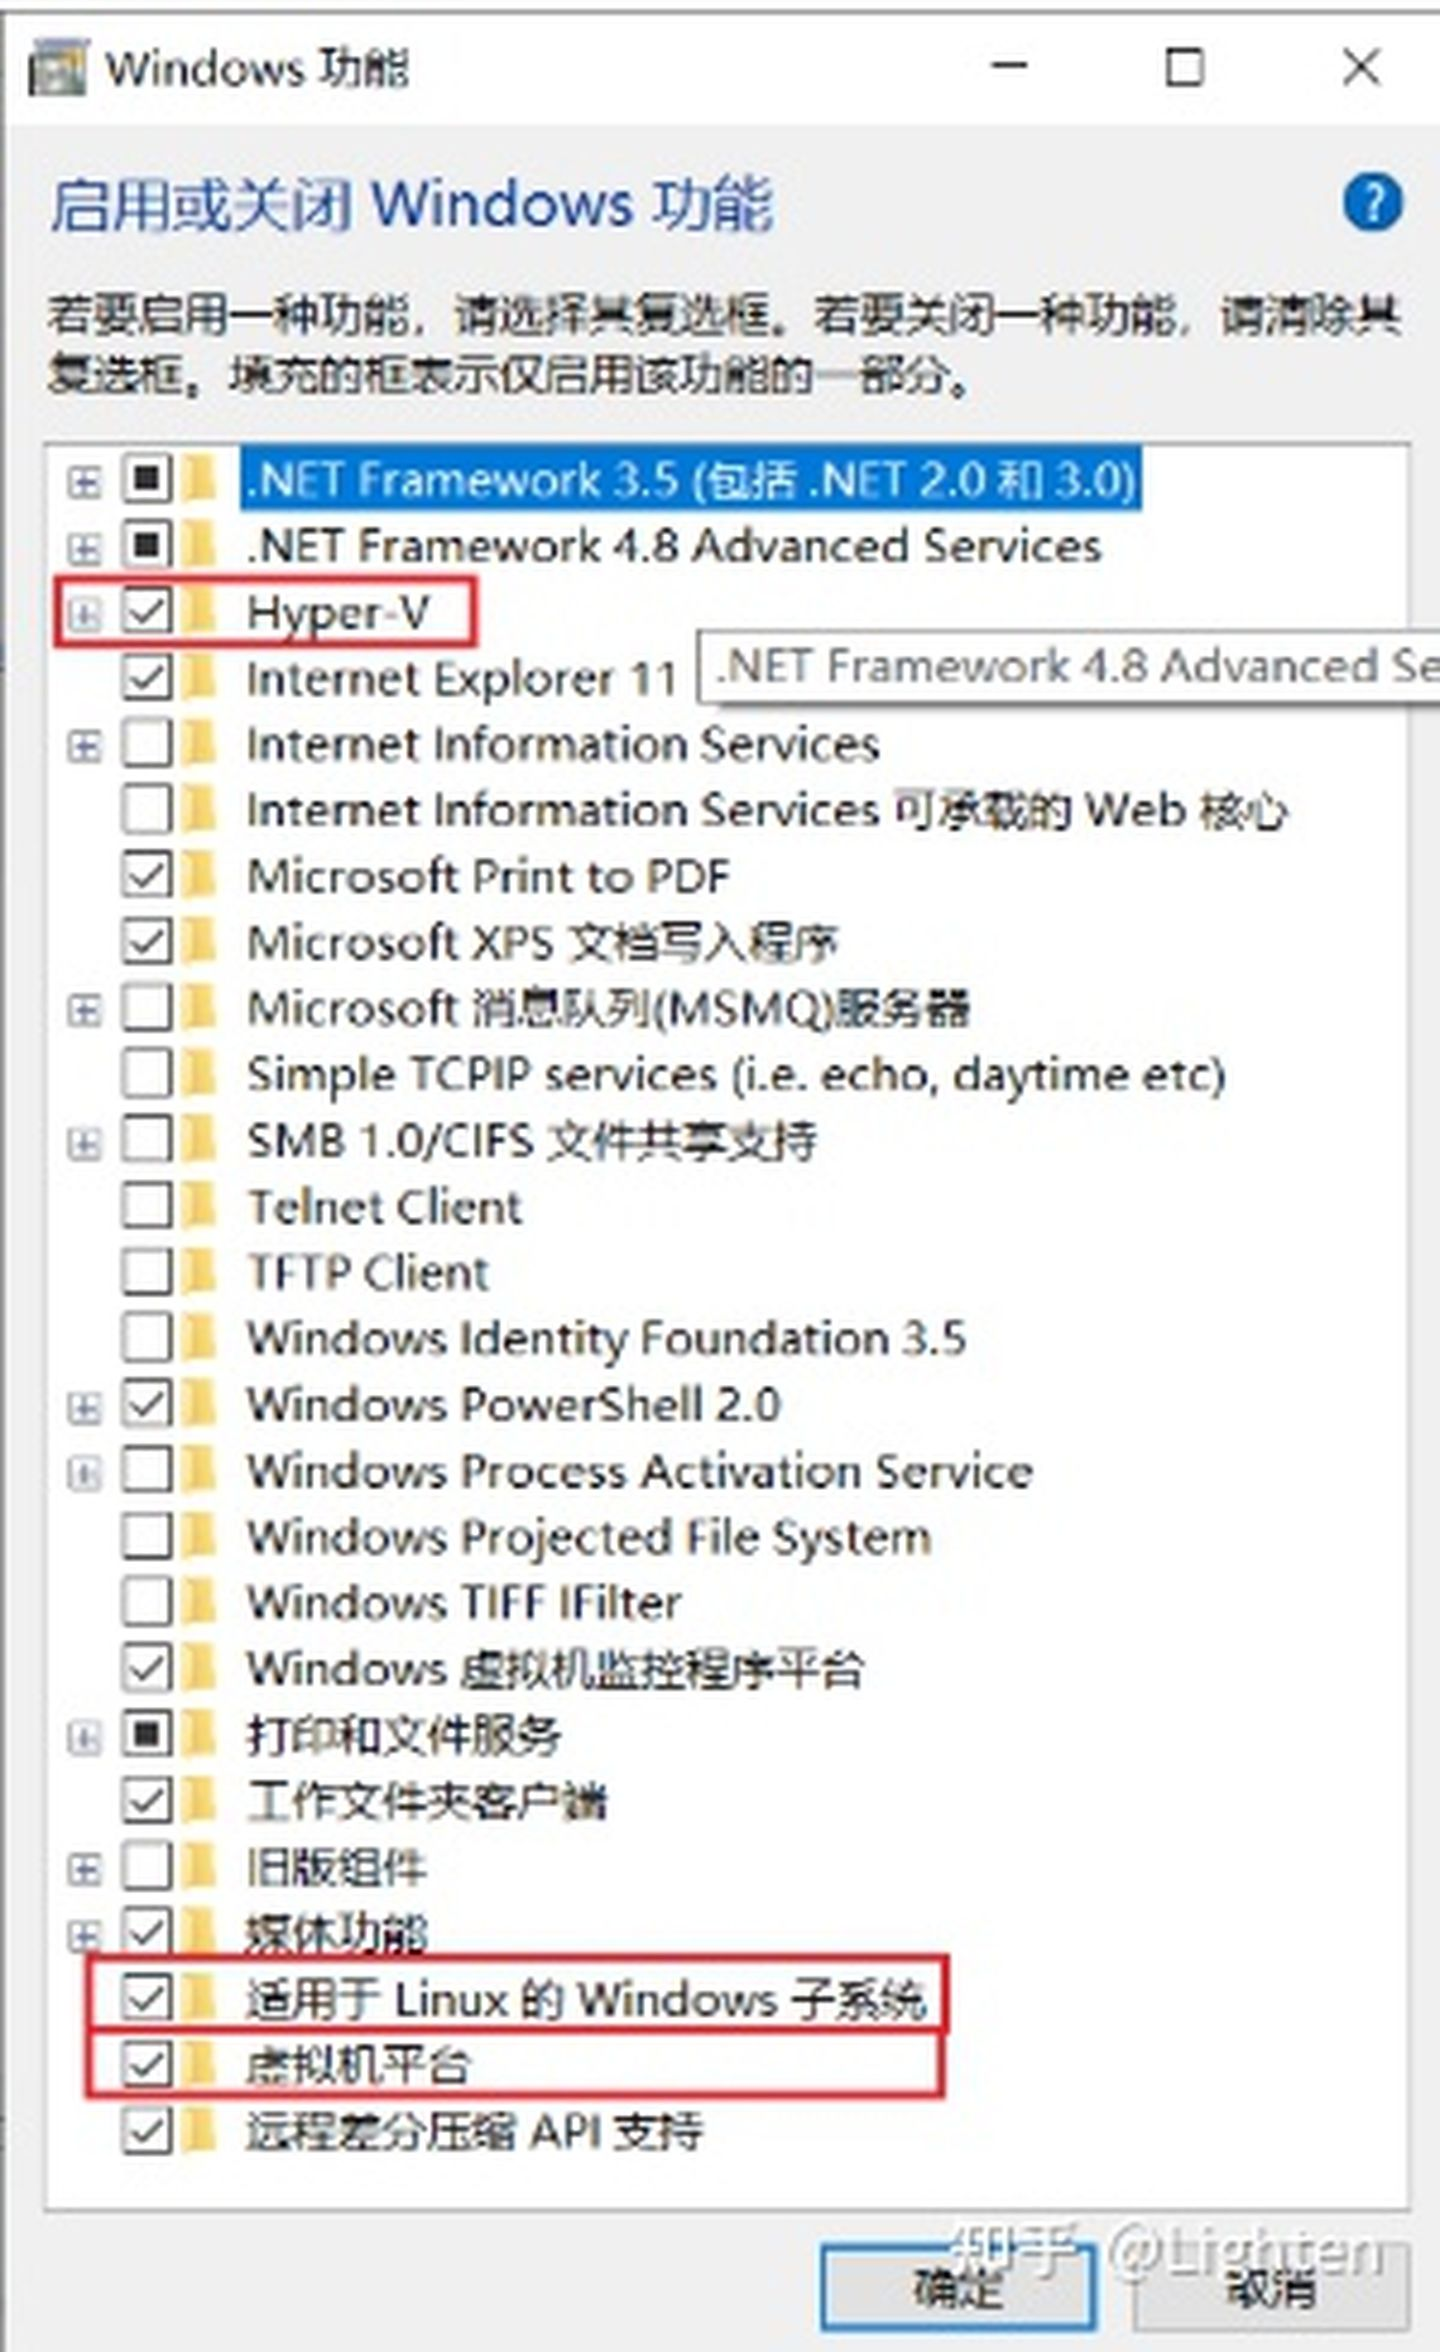

另外，在检查一下任务管理器中-性能-CPU中的虚拟化是否已开启，如果未开启，请参考文章在BIOS中打开虚拟机
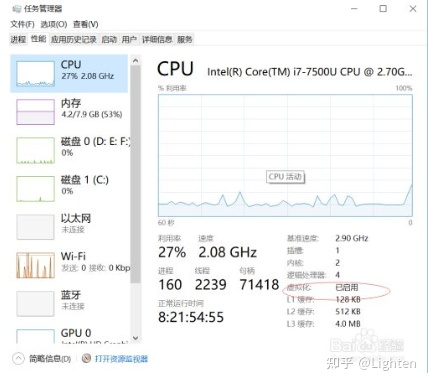

Thinkpad R14 BIOS 开启虚拟化  
开机一直按Fn->出现下面界面->Enter->F1->进入BIOS界面->Security->Virtualization->all on
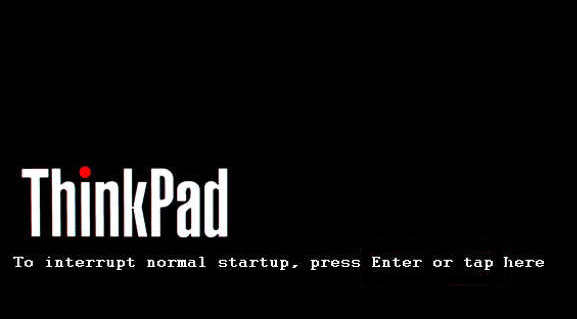

In [ ]:
#将 WSL 2 设置为默认版本
wsl --set-default-version 2
#将Ubuntu20.04 设置为WSL2
wsl --set-version Ubuntu-20.04 2

## 访问WSL2文件
在文件资源管理器输入
<code>
\\wsl$
</code>
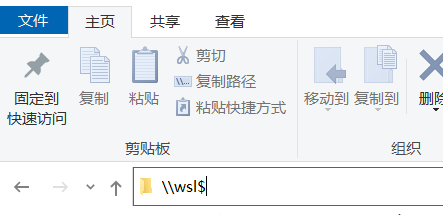

## wsl2 安装 Docker

安装Docker有两个途径，一个是在Win10中安装 Docker Desktop，并启用WSL引擎(refer to https://docs.microsoft.com/zh-cn/windows/wsl/tutorials/wsl-containers)。 
另一个是在WSL中安装Linux版的Docker。目前正式版本的Win10中WSL暂不支持GUI(Win10 Insider Preview build 21362和Win11可支持)，所以在WSL中安装完Apollo需要用Win10中的浏览器查看Dreamview。**<font color=red>如果安装Docker Desktop，难以在Win10浏览器中访问WSL Docker中的服务</font>**。所以此处一定要在WSL中安装Docker。安装方法如下（refer to https://www.jianshu.com/p/a20c2d58eaac）  

refer to https://blog.csdn.net/weixin_42359986/article/details/120378988  

In [ ]:
# 添加密钥和国内源
curl -fsSL https://download.docker.com/linux/ubuntu/gpg | sudo apt-key add -
sudo add-apt-repository \
   "deb [arch=amd64] https://mirrors.tuna.tsinghua.edu.cn/docker-ce/linux/ubuntu \
   $(lsb_release -cs) \
   stable"
# 更新
sudo apt update
# 安装Docker
sudo apt install -y docker-ce

### docker 卸载
https://www.cnblogs.com/shmily3929/p/12085163.html

## Download Apollo Sources
Github: https://github.com/ApolloAuto/apollo  
Gitee: https://gitee.com/ApolloAuto/apollo

In [ ]:
mkdir apollo && cd apollo

# Using SSH
git clone git@gitee.com:ApolloAuto/apollo.git

# Using HTTPS
git clone https://gitee.com/ApolloAuto/apollo.git

# checkout the latest branch
git checkout master

## 启动docker

In [ ]:
sudo service docker start

## Apollo Software Installation
参考：https://gitee.com/ApolloAuto/apollo/blob/master/docs/quickstart/apollo_software_installation_guide.md

### Start Apollo Development Docker Container


In [ ]:
bash docker/scripts/dev_start.sh

[ERROR] Failed to start docker container "apollo_dev_cfz" based on image: apolloauto/apollo:dev-x86_64-18.04-20210914_1336 + exit 1  
参考：https://blog.csdn.net/JeSuisDavid/article/details/120154997   
原因：电脑没有显卡，把NVidia显卡驱动卸载即可  
解决方案： 
<code>
sudo apt purge nvidia*
</code>

If successful, you will see the following messages at the bottom of your screen:
<code>
[ OK ] Congratulations! You have successfully finished setting up Apollo Dev Environment.
[ OK ] To login into the newly created apollo_dev_michael container, please run the following command:
[ OK ]   bash docker/scripts/dev_into.sh
[ OK ] Enjoy!
</code>

### Enter Apollo Development Docker Container


In [ ]:
bash docker/scripts/dev_into.sh

报错：unable to find user cfz: no matching entries in passwd file  
参考：https://www.kaishixue.com/apollo/
原因：在制作Docker镜像的过程中，完成软件安装等操作后，一般会切换为普通用户(e.g., cfz)启动相应的服务。因此，<font color=red>**1.3 Download Apollo Sources和1.4 Apollo Software Installation需要在普通用户下安装编译**</font>

### Build Apollo inside Container

In [ ]:
# Make sure you start up clean
# ./apollo.sh clean

# Build
# ./apollo.sh build --config=dbg --config=cpu

more information about Build refer to https://gitee.com/ApolloAuto/apollo/blob/master/docs/specs/apollo_build_and_test_explained.md  


--compilation_mode (fastbuild|opt|dbg) (-c)  
The --compilation_mode option (often shortened to -c, especially -c opt) takes an argument of fastbuild, dbg or opt, and affects various C/C++ code-generation options, such as the level of optimization and the completeness of debug tables. Bazel uses a different output directory for each different compilation mode, so you can switch between modes without needing to do a full rebuild every time.

* fastbuild  
means build as fast as possible: generate minimal debugging information (-gmlt -Wl,-S), and don't optimize. This is the default. Note: -DNDEBUG will not be set.
* dbg  
means build with debugging enabled (-g), so that you can use gdb (or another debugger).
* opt  
means build with optimization enabled and with assert() calls disabled (-O2 -DNDEBUG). Debugging information will not be generated in opt mode unless you also pass --copt -g.

refer to https://docs.bazel.build/versions/main/user-manual.html#semantics-options

If successful, you will see the following messages at the bottom of your screen:
<code>
(20:05:22) INFO: Elapsed time: 733.312s, Critical Path: 111.03s
(20:05:22) INFO: 17733 processes: 11080 internal, 6653 local.
(20:05:22) INFO: Build completed successfully, 17733 total actions
==============================================
[ OK ] Done building apollo. Enjoy!
==============================================
</code>

## Launch and Run Apollo
参考：https://gitee.com/ApolloAuto/apollo/blob/master/docs/howto/how_to_launch_and_run_apollo.md  

### Start Apollo


视频参考：https://www.bilibili.com/video/BV1vQ4y127gF?spm_id_from=333.999.0.0  
https://www.bilibili.com/video/BV1h44y1y7mf?spm_id_from=333.999.0.0

In [ ]:
# Startup modules monitor and dreamview
./scripts/bootstrap.sh start
./scripts/bootstrap.sh stop
./scripts/bootstrap.sh restart

### Access Dreamview Web UI
Open http://localhost:8888 in your favorite browser, e.g. Chrome, and you should see this screen. However, no module(s) except monitor is running in the background at this moment.



### Replay Demo Record

In [ ]:
# download the demo record using the following commands
cd docs/demo_guide/
# python3 record_helper.py demo_3.5.record

从github国外拉取慢  
github：https://github.com/ApolloAuto/apollo/releases/download/v3.5.0/demo_3.5.record  
apolloauto.club国内：http://apolloauto.club/mirror/demo_3.5.record  
**<font color=red>下载后放到和/docs/demo_guide/record_helper.py同目录下</code>**  
refer to https://zhuanlan.zhihu.com/p/379019627

In [ ]:
# replay this demo "record" in a loop with the '-l' flag
cyber_recorder play -f demo_3.5.record --loop

## tool使用
In Apollo 6.0 and master, Python scripts was managed by Bazel. (refer to: https://github.com/ApolloAuto/apollo/issues/13688)  

In [ ]:
# Setup PYTHONPATH properly
source /apollo/scripts/apollo_base.sh

# 测试工具1
./bazel-bin/modules/tools/mapshow/roadshow -m modules/map/data/borregas_ave/base_map.bin

# 测试工具2
./bazel-bin/modules/tools/realtime_plot/realtime_plot

# 测试工具3
./bazel-bin/modules/tools/navigator/viewer_raw path_20210711195048.record.00000.txt

1) 如果报错提示:
<code>
UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
</code>
则安装matplotlib的后端TkAgg:
<code>**<font color=red>
    sudo apt-get update
    sudo apt-get install tcl-dev tk-dev python3-tk
</font>**</code>
refer to: https://github.com/ApolloAuto/apollo/issues/13933

2) 如果报错提示:
<code>
Err:8 https://mirrors.tuna.tsinghua.edu.cn/ubuntu bionic-security Release  
  Certificate verification failed: The certificate is NOT trusted. The certificate chain uses expired certificate.  Could not  handshake: Error in the certificate verification. [IP: 101.6.15.130 443]  
Reading package lists... Done  
E: The repository 'https://mirrors.tuna.tsinghua.edu.cn/ubuntu bionic Release' does not have a Release file.  
N: Updating from such a repository can't be done securely, and is therefore disabled by default.  
</code>
则修改Ubuntu 镜像:
<code>**<font color=red>sudo vim /etc/apt/sources.list</font>**</code> -> 键入"a" 进入修改模式 -> 全删 -> 复制粘贴下面代码 -> Esc -> 键入 ":wq" 保存并退出
<code>
deb http://cz.archive.ubuntu.com/ubuntu trusty main universe

deb http://mirrors.aliyun.com/ubuntu/ focal main restricted universe multiverse
deb-src http://mirrors.aliyun.com/ubuntu/ focal main restricted universe multiverse

deb http://mirrors.aliyun.com/ubuntu/ focal-security main restricted universe multiverse
deb-src http://mirrors.aliyun.com/ubuntu/ focal-security main restricted universe multiverse

deb http://mirrors.aliyun.com/ubuntu/ focal-updates main restricted universe multiverse
deb-src http://mirrors.aliyun.com/ubuntu/ focal-updates main restricted universe multiverse

deb http://mirrors.aliyun.com/ubuntu/ focal-proposed main restricted universe multiverse
deb-src http://mirrors.aliyun.com/ubuntu/ focal-proposed main restricted universe multiverse

deb http://mirrors.aliyun.com/ubuntu/ focal-backports main restricted universe multiverse
deb-src http://mirrors.aliyun.com/ubuntu/ focal-backports main restricted universe multiverse
</code>
PS: 添加第一个镜像后，可将libeigen3-dev 从version (3.3.4-4)升级至version (3.3.7-2)  
refer to: https://developer.aliyun.com/mirror/ubuntu?spm=a2c6h.13651102.0.0.3e221b11JYTkbG
    
3) 如果报错提示:
<code>
NameError: name 'matplotlib' is not defined
</code>
则安装matplotlib:
<code>**<font color=red>
    sudo apt install python3-matplotlib
</font>**</code>

4) 如果报错提示:
<code>
  File "/apollo/bazel-bin/modules/tools/mapshow/roadshow.runfiles/com_google_protobuf/python/google/protobuf/descriptor.py", line 543, in __new__
    _message.Message._CheckCalledFromGeneratedFile()
TypeError: Descriptors should not be created directly, but only retrieved from their parent.
</code>
则安装protobuf:
<code>**<font color=red>
    sudo apt-get install pip
    pip install --upgrade protobuf -i https://pypi.mirrors.ustc.edu.cn/simple/ 
</font>**</code>
refer to: https://stackoverflow.com/questions/61922334/how-to-solve-attributeerror-module-google-protobuf-descriptor-has-no-attribu  

5) 如果报错提示:
<code>
  File "/usr/lib/python3.8/tkinter/__init__.py", line 2270, in __init__
    self.tk = _tkinter.create(screenName, baseName, className, interactive, wantobjects, useTk, sync, use)
_tkinter.TclError: couldn't connect to display ":0"
</code>
则安装并配置VcXsrv:
<code>**<font color=red>
    sudo vim ~/.bashrc
    # 在最后一行添加
    export DISPLAY=$(awk '/nameserver / {print $2; exit}' /etc/resolv.conf 2>/dev/null):0
    source ~/.bashrc
</font>**</code>
refer to: https://blog.csdn.net/Alisebeast/article/details/106680267

In [ ]:
# 测试配置是否成功

# 进入python
python3

#检查matplotlib后端
import matplotlib
#打印后端
print(matplotlib.get_backend())
#打印matplotlib配置文件路径
print(matplotlib.matplotlib_fname())

import matplotlib.pyplot as plt
plt.plot([1,2,3],[5,7,4])
plt.show()

# 退出python
exit() #或 quit()

待测试tool  
**How to run the Map Data Verification Tool**:https://github.com/ApolloAuto/apollo/blob/master/docs/howto/how_to_run_map_verification_tool.md  

apollo/modules/tools/map_gen https://zhuanlan.zhihu.com/p/358796415

# 总述
Apollo源码主要是c++实现的，也有少量python，主要程序在apollo/modules目录中，共18个包，功能包17个：

* apollo/modules/calibration  
校准模块，使用前必须对系统进行校准和标定，包括激光雷达与摄像头、毫米波雷达与摄像头等。所谓校准就是要对齐激光雷达、摄像头以及毫米波雷达获得的信息，我们知道激光雷达可以获得详细的3D信息，但是不能获得颜色信息，摄像头可以获得颜色信息，但是无法获得深度等3D信息，毫米波雷达不能获得颜色信息，但是可以获得3D信息，三者获得的信息对齐后，就可以同时获得实际环境中的3D信息和颜色信息。
* apollo/modules/canbus  
汽车can总线控制模块。接收控制指令，同时给控制模块control发送车身状态信息。
* apollo/modules/common  
公共源码模块。包括如日志，工厂模式的实现，日志系统，监控模块，数学算法等。
* apollo/modules/control  
控制模块。基于决策规划的输出路径及车身的状态使用不同的控制算法来输出控制命令，如转向刹车，控制等。
* apollo/modules/data  
数据模块。收集、存储、处理收集到的各种数据的。
* apollo/modules/dreamview  
可视化模块。查看规划的轨迹及实时的转向刹车油门信息
* apollo/modules/drivers  
驱动模块。各种传感器驱动。
* apollo/modules/e2e  
end to end，端到端强化学习。  
所谓e2e指的是由传感器的输入，直接决定车的行为，例如油门，刹车，方向等。也就是机器学习的算法直接学习人类司机的驾驶行为。这部分在代码中需要另外下载，学习的数据主要来源于传感器的原始数据，包括图像、激光雷达、雷达等。end-to-end输入以图像为主。 输出是车辆的控制决策指令，如方向盘角度、加速、刹车。 连接输入输出的是深度神经网络，即通过神经网络直接生成车辆控制指令对车辆进行横向控制和纵向控制，中间没有人工参与的逻辑程序。横向控制，主要是指通过方向盘控制车身横向移动，即方向盘角度。纵向控制，是指通过油门和刹车控制车身纵向的移动，即加速、刹车等。横向模型的输出没有采用方向盘角度，而是使用要行驶的曲率（即拐弯半径的倒数)。
* apollo/modules/elo  
利用高精地图的自定位模块。这部分的代码也是另外下载。前向的摄像头会采集车道数据以实现更精确的定位，输出的位置信息包括车辆的x y z坐标，还有就是在百度高精度地图中的ID。
* apollo/modules/localization  
定位模块。输入GPS和IMU信息输出自车定位信息
* apollo/modules/map  
高精地图模块。输出结构化地图信息，如车道线，十字路口等。
* apollo/modules/monitor  
监控模块。监控硬件状态，同时把状态发给交互界面。
* apollo/modules/perception  
感知模块。输入激光点云，高精地图，变换坐标，输出3D障碍物包括速度大小和方向。
* apollo/modules/planning  
局部决策规划模块。
* apollo/modules/prediction  
预测模块。输出感知的障碍物信息及自定位信息输出障碍物未来的轨迹。
* apollo/modules/routing  
全局规划模块。输入包括地图信息各起点终点地址，输出一个全局的导航信息。
* apollo/modules/third_party_perception  
第三方感知模块。
* apollo/modules/tools  
通用监控与可视化模块。


## 工作流程
自动驾驶系统先通过起点终点规划出全局路径（routing）；然后在行驶过程中感知（perception）当前环境（识别车辆行人路况标志等），并预测下一步发展；然后把已知信息都传入规划模块（planning），规划出之后的轨道；控制模块（control）将轨道数据转换成对车辆的控制信号，通过汽车交互模块（canbus）控制汽车．

流程图如下：
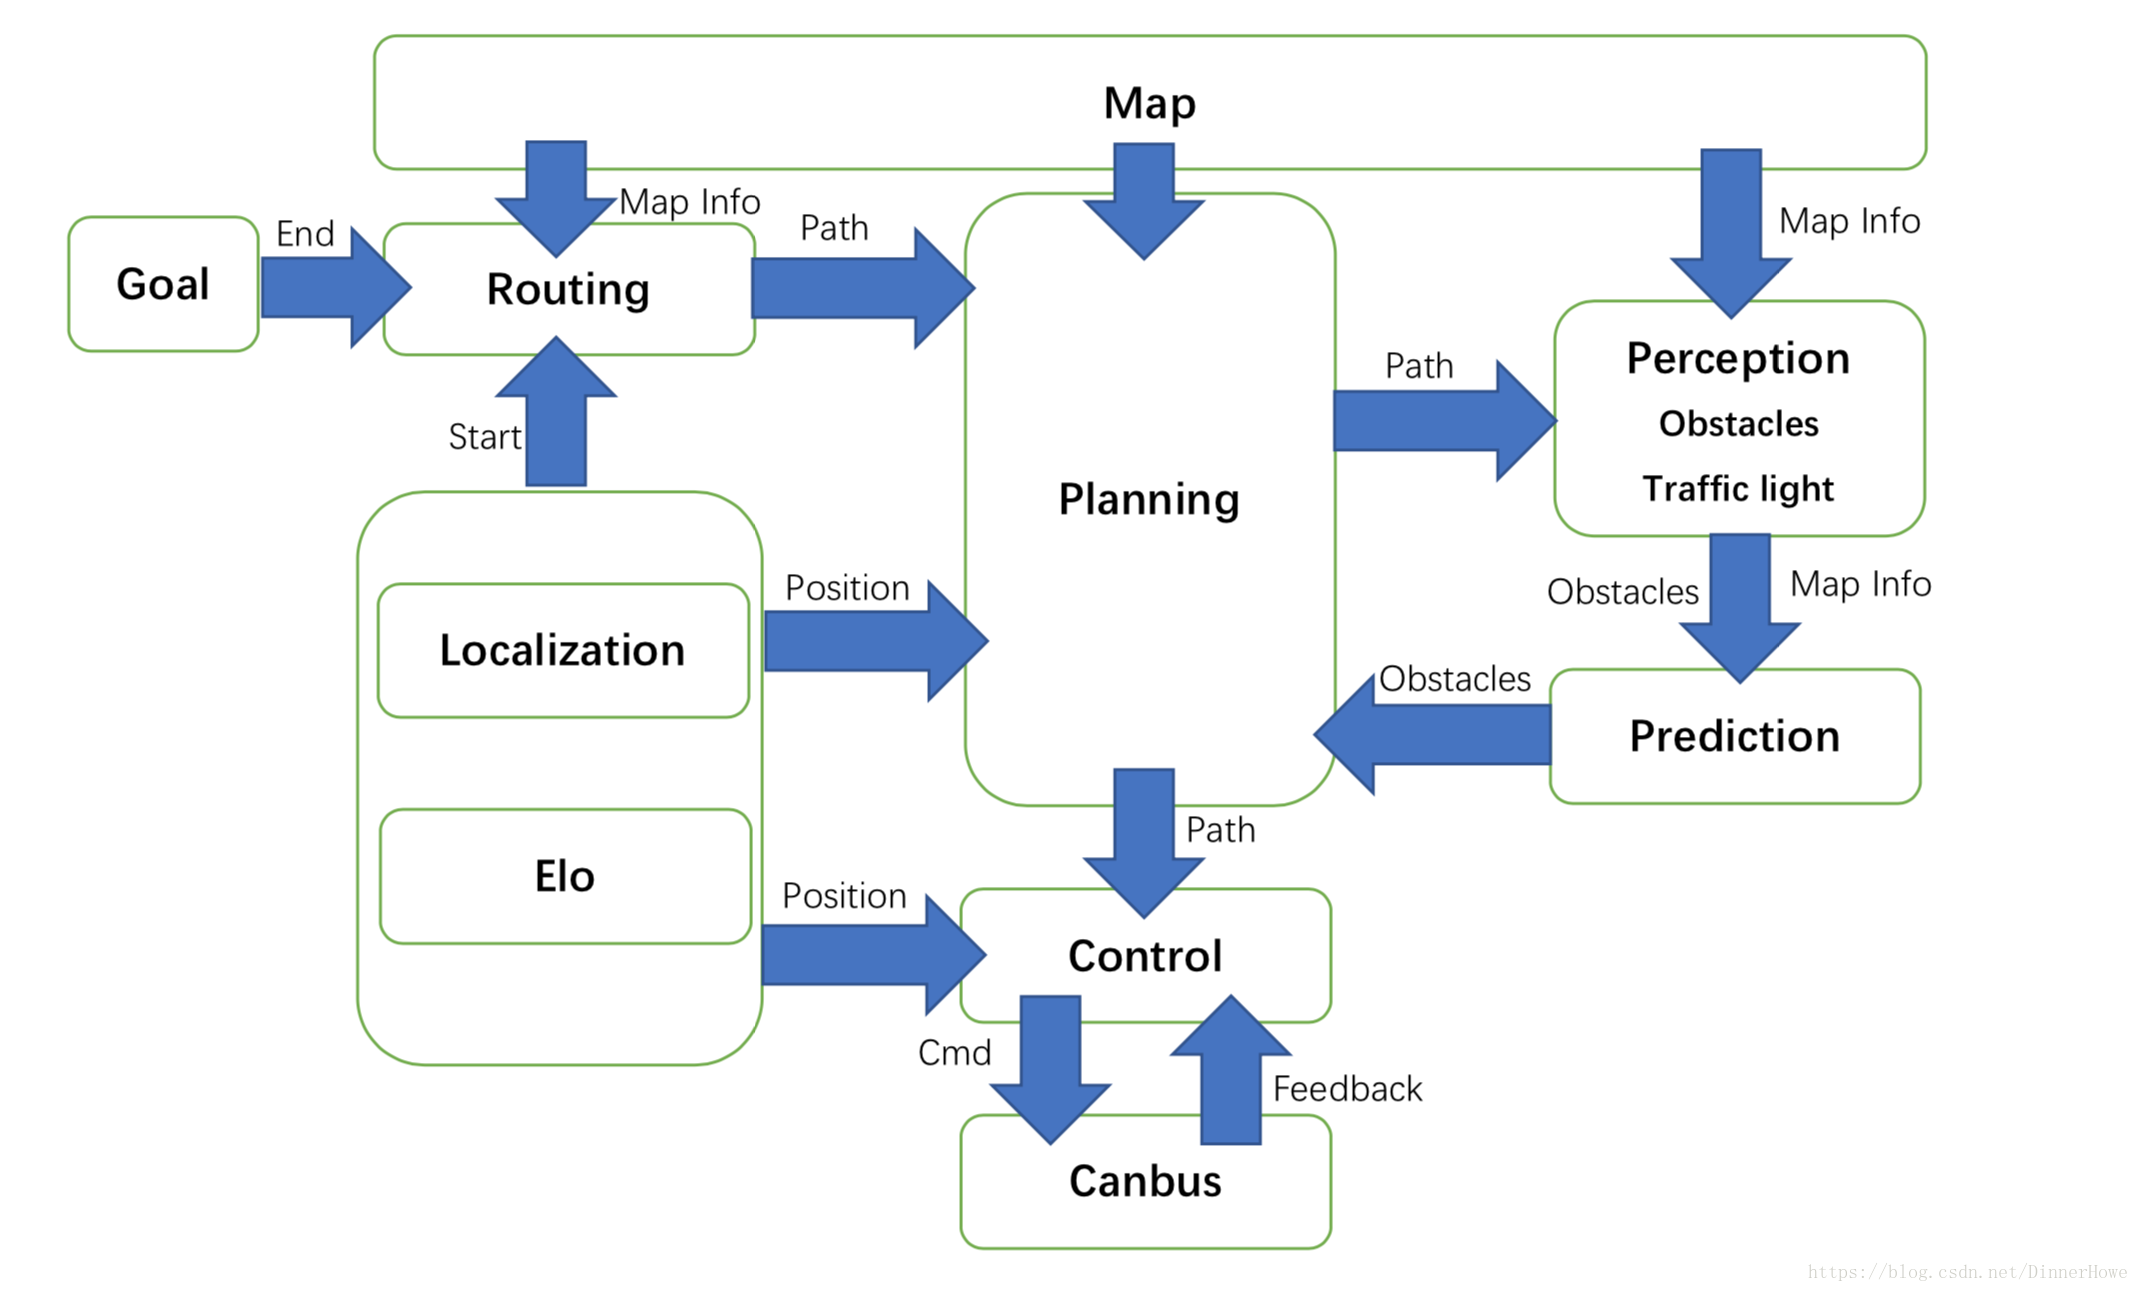

# Routing


## 小结

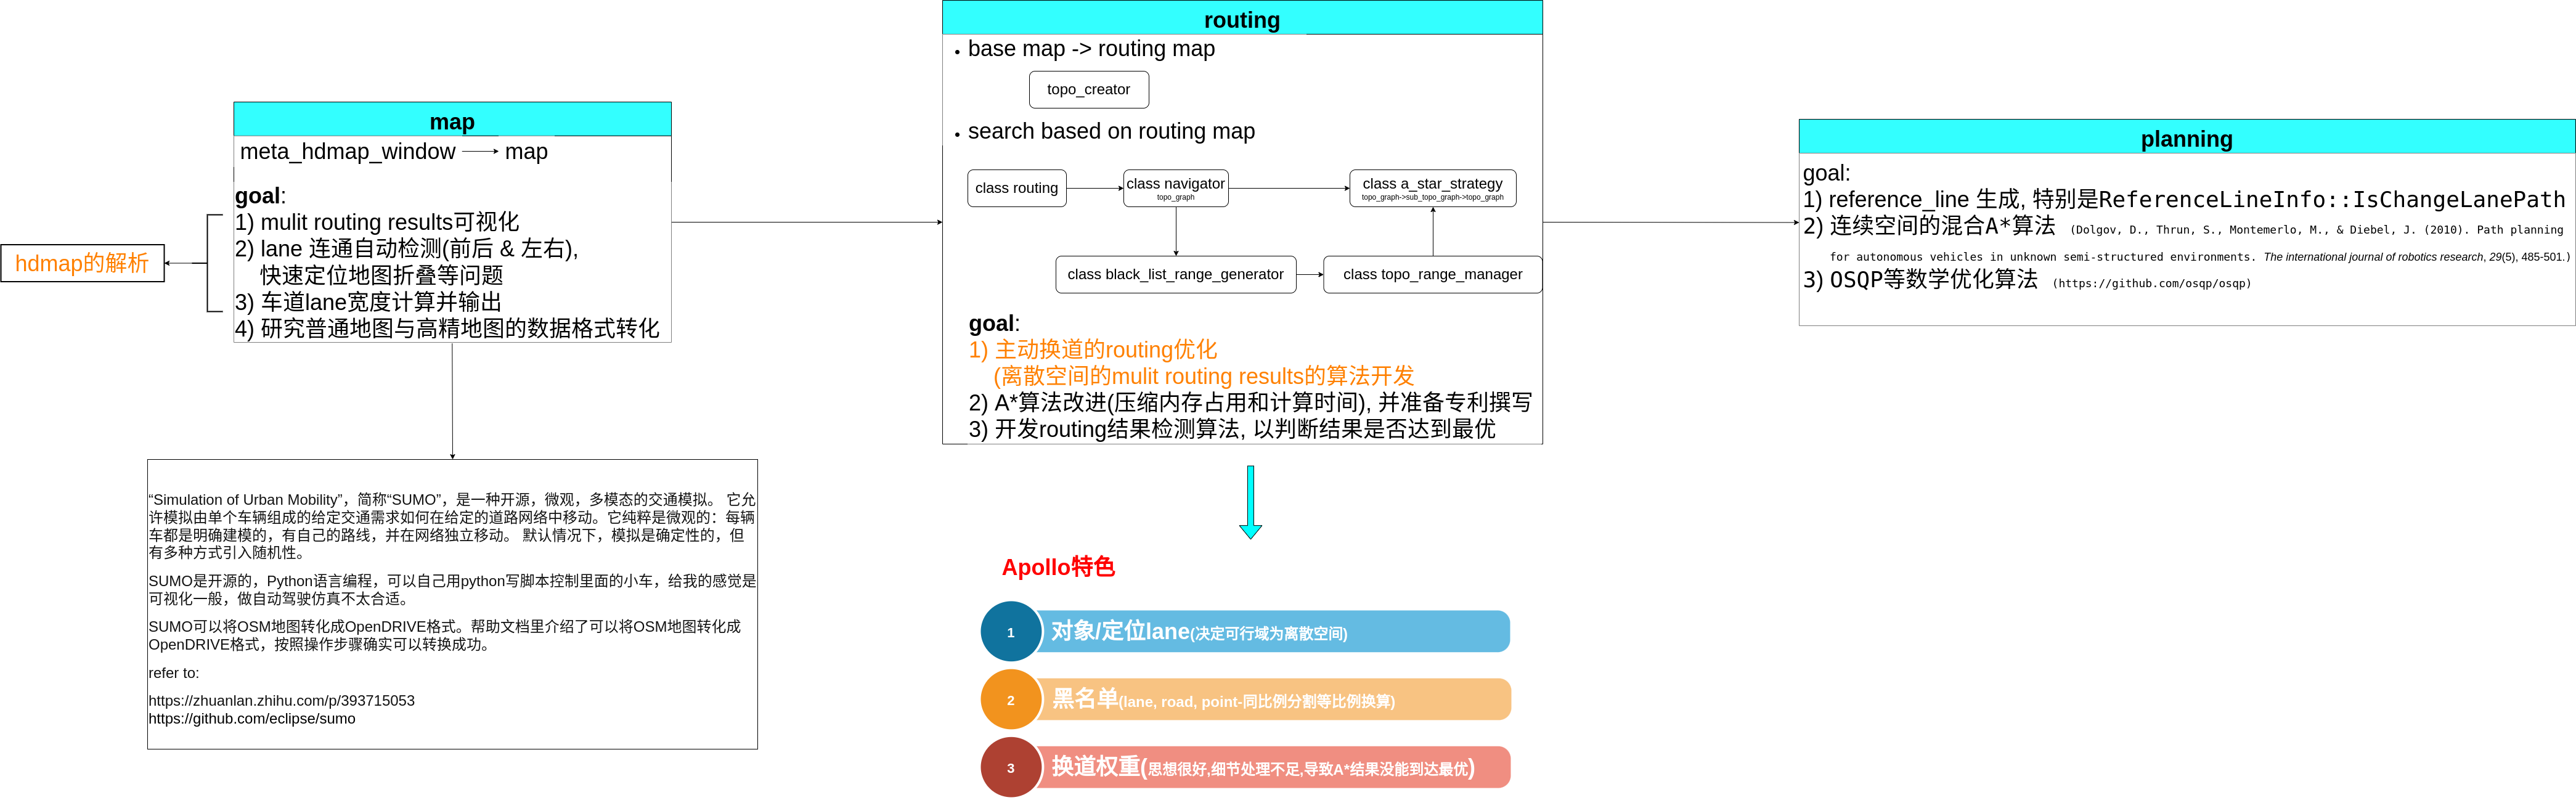

## 总览

已参考：https://blog.csdn.net/qq_23981335/article/details/122169797  

待读参考：https://blog.csdn.net/davidhopper/article/details/79183557 （Apollo Routing模块源代码分析）   
https://zhuanlan.zhihu.com/p/65533164  
http://www.cheung.site/apollo-routing/  


**howto**: https://github.com/ApolloAuto/apollo/tree/master/docs/howto  

视频资料：https://www.bilibili.com/video/BV1qh411n7Xq

主要作用：根据请求生成路由信息。告诉自动驾驶汽车通过全局路径到达目的地。

解决哪些问题：
* 如何从A点到B点？
* 如何规避某些点？ - 查找的时候发现是黑名单里的节点，则选择跳过
* 如何途径某些点？- 采用分段的形式，逐段导航（改进版的算法是不给定点的顺序，自动规划最优的线路）
* 如何设置固定线路，而且不会变？最后routing输出的结果是什么？

routing与planning

* Routing  
主要关注起点到终点的长期路径，根据起点到终点之间的道路，选择一条最优路径。  
该路径可以理解为一系列与时间无关 的点的集合s(x,y)，除非路网信息发生变化或者其他触发条件发生变化，否则相同起始点，规划的轨迹都是相同的，该路径是道路级别 的导航，不能直接用于自动驾驶。

* Planning  
主要关注几秒钟之内汽车的行驶路径，根据当前行驶过程中的交通规则，车辆行人等信息，规划一条短期路径。  
planning得到的是一系列与时间相关 的点的集合s(x,y,t)，不同的时刻到达同一地方，需要根据周围环境信息（前方是否有障碍物信息，是否需要换道行驶等），规划出当前时刻 安全行驶的一条轨迹。  

* 两者关系  
routing模块规划的路径是planning模块规划轨迹的输入信息 来源之一，能够协助planning规划出安全，可靠的行驶轨迹。  
planning模块通常根据传感器输入（激光雷达、视觉摄像头等）规划出车辆当前时刻需要的一条行驶轨迹，但是一些特殊场景下，如大雾天气、夜晚、匝道进出口等，由于输入信息缺失，不能规划出安全行驶轨迹，此时可以根据routing规划导航路径，结合高精地图信息，能够得到一条满足行驶的轨迹。  
（即：如果planning不能规划出轨迹，只靠routing得出轨迹应该也是不能用，因为routing得出的轨迹是道路级别，相当于一条参考线，不能直接用于车道级路径规划）  
Routing类似于现在开车时用到的导航模块，通常考虑的是起点到终点的最优路径（通常是最短路径），Routing考虑的是起点到终点的最短路径，而Planning则是行驶过程中，当前一小段时间如何行驶，需要考虑当前路况，是否有障碍物。Routing模块则不需要考虑这些信息，只需要做一个长期的规划路径即可  


refer to: https://zhuanlan.zhihu.com/p/486835272  

输入:  
* 地图数据routing_map，see routing.cc/apollo::common::Status Routing::Init()  
* 请求，包括：开始和结束位置  

模块输出:  
* 路由导航信息  

Routing模块的实现文件结构如下图所示： 
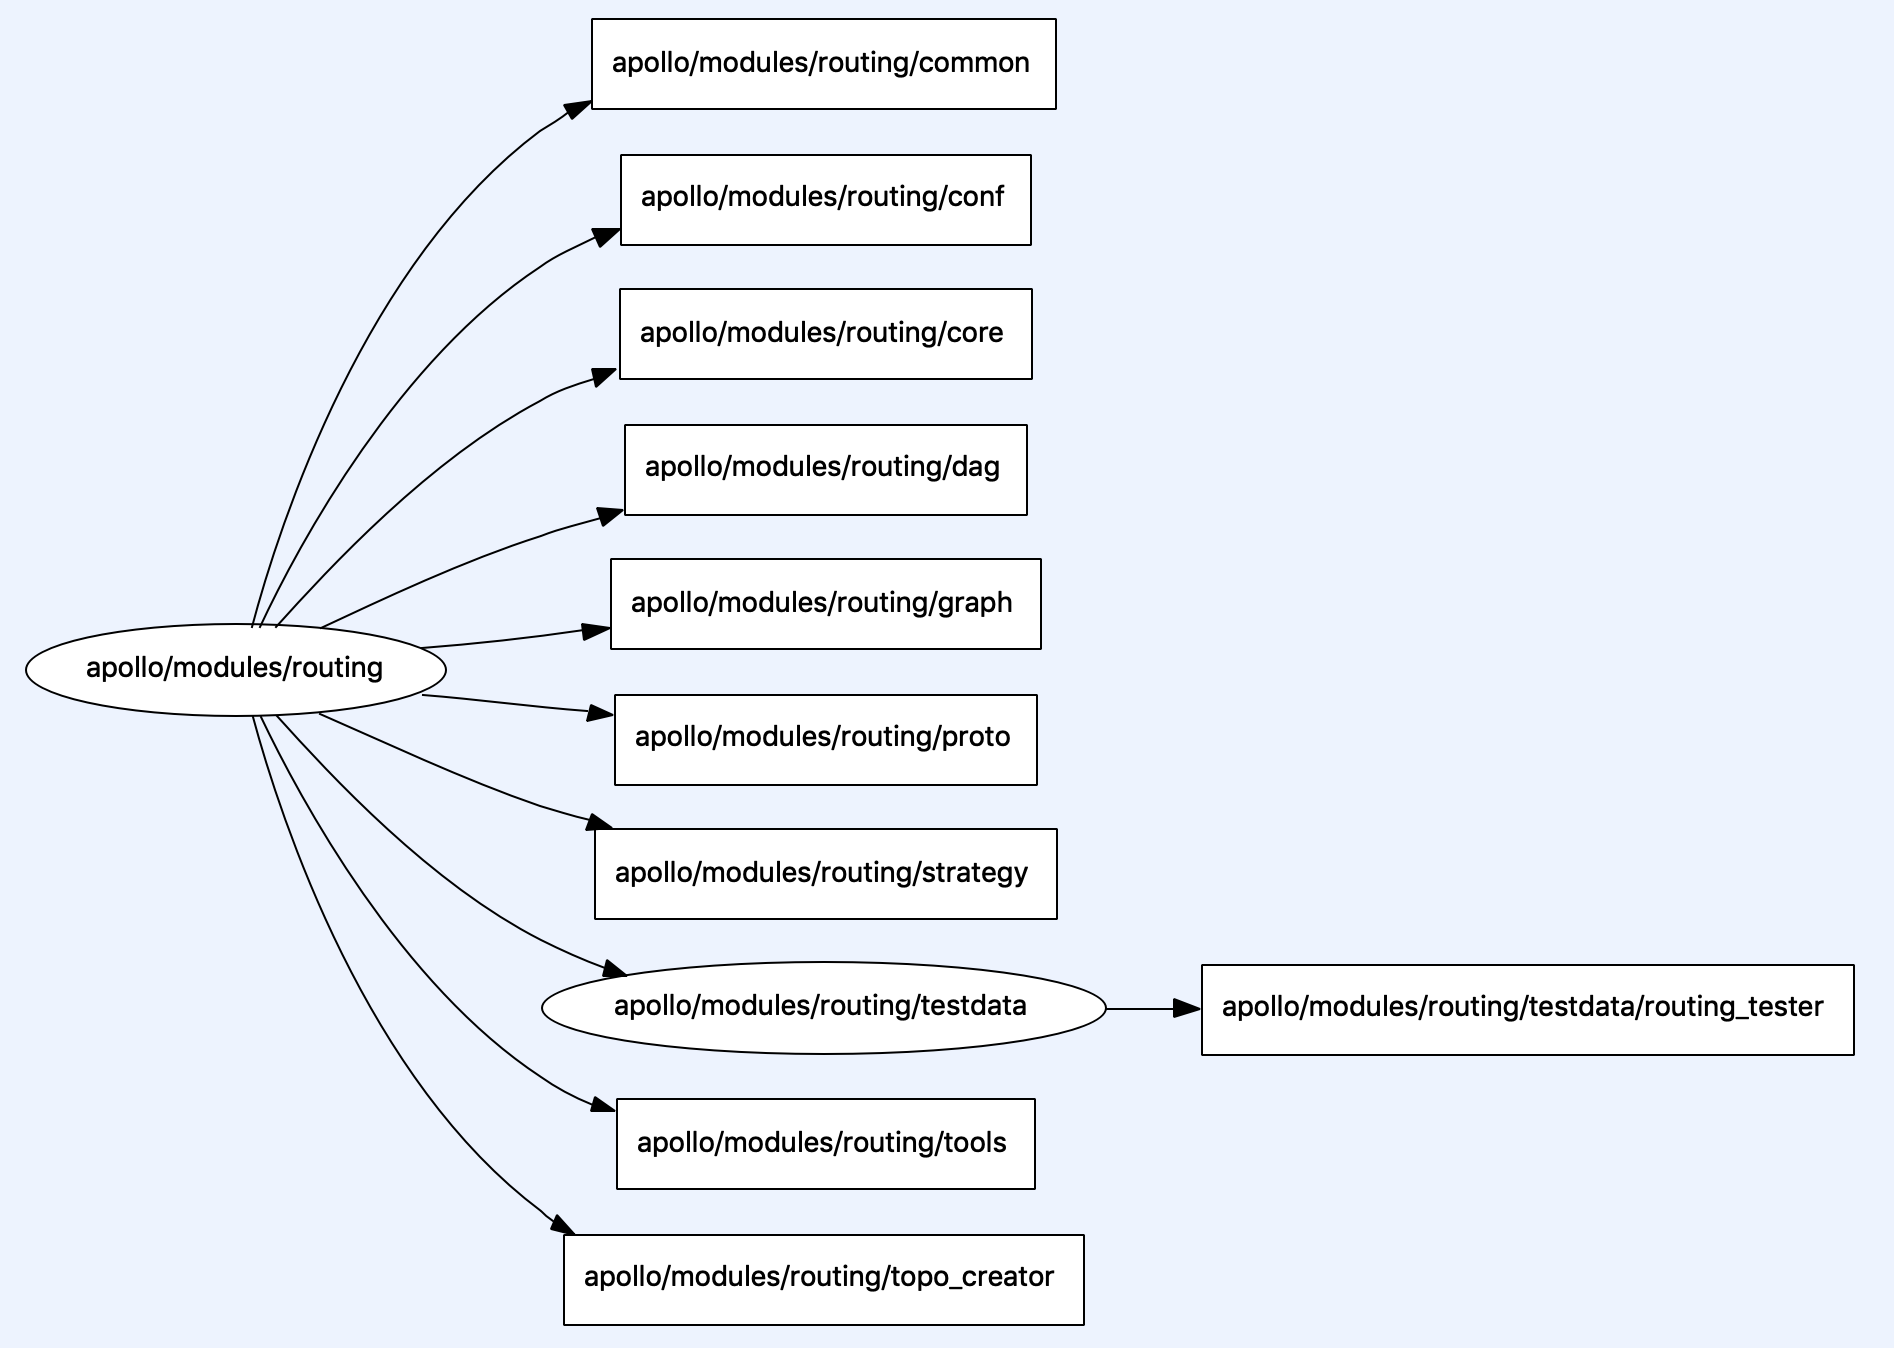

Routing模块中的主要组件以及它们的交互关系
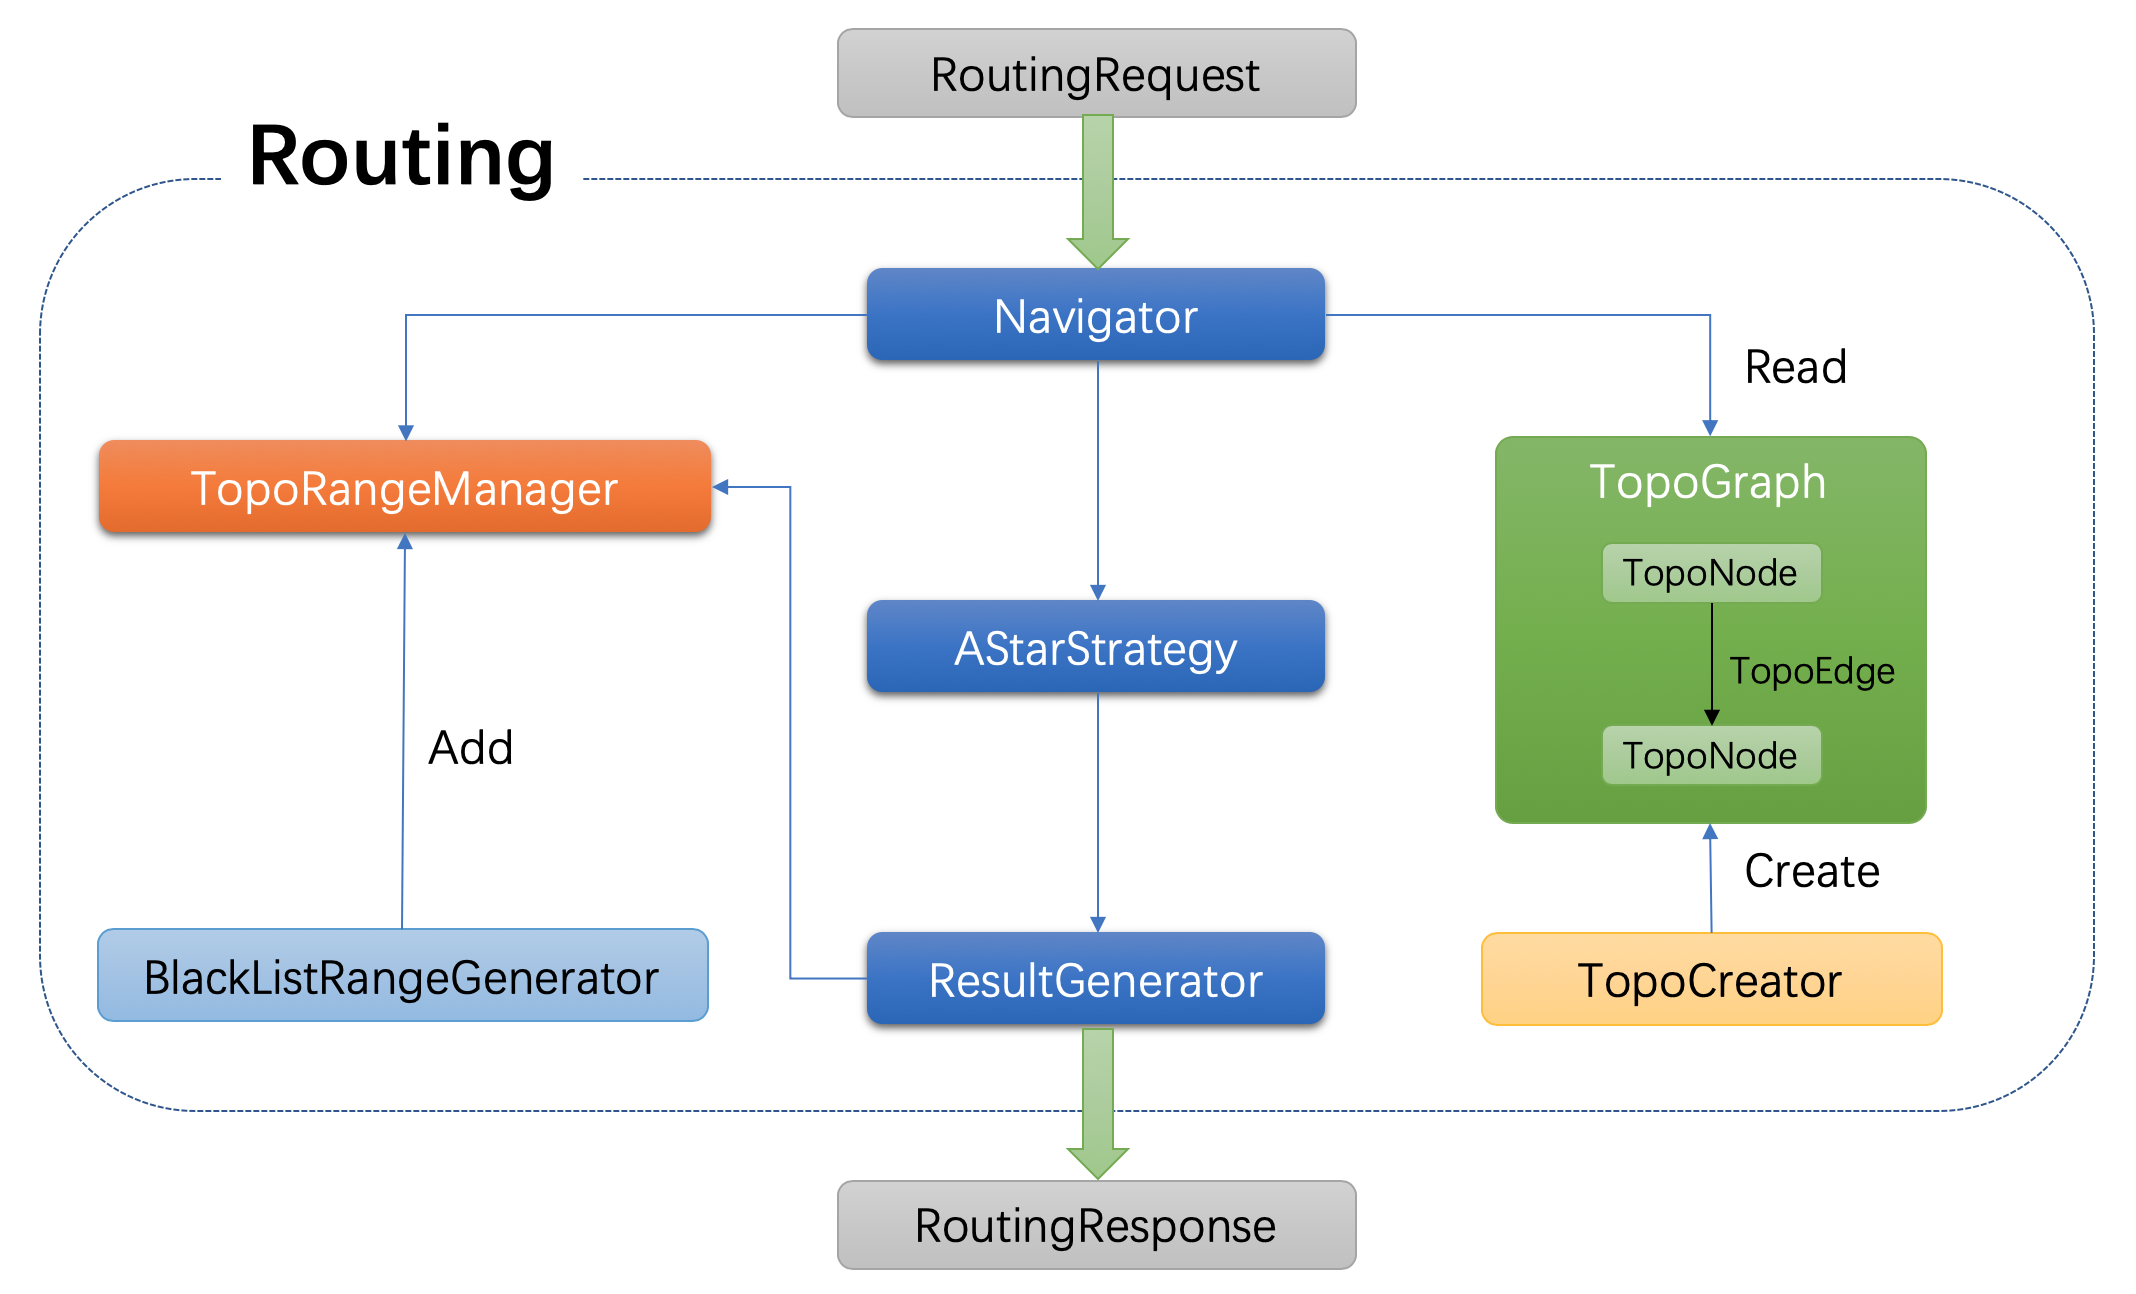

routing模块函数调用流程图：
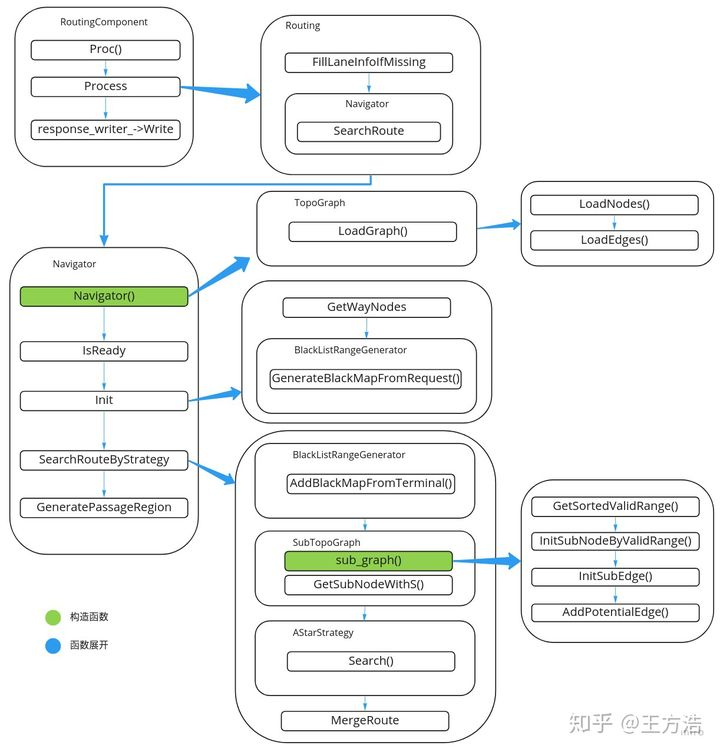
refer to https://www.zhihu.com/question/358869380 

## common
将模块常用的几个常量定义在一起可以方便修改，也方便模块里面使用

目录结构：  

In [ ]:
.
├── BUILD
├── routing_gflags.cc
└── routing_gflags.h

In [ ]:
#include "modules/routing/common/routing_gflags.h"

DEFINE_string(routing_conf_file,
              "/apollo/modules/routing/conf/routing_config.pb.txt",
              "default routing conf data file");                                  // Routing模块配置文件的路径

DEFINE_string(routing_node_name, "routing", "the name for this node");            // Routing模块的节点名称

DEFINE_double(min_length_for_lane_change, 1.0,
              "meters, which is 100 feet.  Minimum distance needs to travel on "
              "a lane before making a lane change. Recommended by "
              "https://www.oregonlaws.org/ors/811.375");                          // 在变道前，在当前车道上行驶的最短距离

DEFINE_bool(enable_change_lane_in_result, true,
            "contain change lane operator in result");                            // 导航结果是否允许变道

DEFINE_uint32(routing_response_history_interval_ms, 1000,
              "ms, emit routing resposne for this time interval");                // 路由请求的响应时长


## conf
目录结构：

In [ ]:
.
├── routing.conf
└── routing_config.pb.txt

具体配置参数，配置文件路径/apollo/modules/routing/conf/routing_config.pb.txt


In [ ]:
base_speed: 4.167
left_turn_penalty: 50.0
right_turn_penalty: 20.0
uturn_penalty: 100.0
change_penalty: 500.0
base_changing_length: 50.0
topic_config {
  routing_response_topic: "/apollo/routing_response"
  routing_response_history_topic: "/apollo/routing_response_history"
}

## proto

作用：  
proto是什么

Apollo项目中的很多数据结构都是通过Protocol Buffers定义的。所以你看不到这些类的C++文件，因为C++需要的相关文件是在编译时通过proto文件自动生成的。

Protocol Buffers是Google的开源项目。它具有语言无关，平台无关的特性，并且有很好的可扩展性。Protocol Buffers通常用于序列化结构化数据。

Apollo使用Protocol Buffers的一个很重要的作用是，用它来**<font color=red>将结构化数据导出到物理文件中，并且也可以很方便的从物理文件中读取信息</font>**。例如，Routing模块需要的Topo地图就是proto结构导出的。另外，如果导出的是文本形式的文件，也可以方便的进行人为的修改。例如，上面提到的routing_config.pb.txt。

定位：
proto文件都位于名称为proto的文件夹中，你可以通常下面这条命令在apollo源码的根目录下找到所有的proto文件夹：
<code>
apollo$ find . -name proto
</code>
这其中自然就包含了Routing模块的proto文件夹：modules/routing/proto 。

Routing模块以及其他模块都需要用的数据结构就定义在modules/common/proto/目录下

目录结果：

In [ ]:
.
├── BUILD
├── poi.proto
├── routing.proto
├── routing_config.proto
└── topo_graph.proto

### routing.proto*

In [ ]:
syntax = "proto2";

package apollo.routing;

import "modules/common/proto/header.proto";
import "modules/common/proto/geometry.proto";
import "modules/common/proto/error_code.proto";
import "modules/map/proto/map_parking_space.proto";
import "modules/map/proto/map_geometry.proto";

message LaneWaypoint {                        // 道路上的路径点，包含：
  optional string id = 1;                     // lane id
  optional double s = 2;                      // 距s-l坐标系原点的纵向距离
                                              // refer to: 1) https://zhuanlan.zhihu.com/p/109193953
                                              // 2) https://zhuanlan.zhihu.com/p/304474902
  optional apollo.common.PointENU pose = 3;   // 东北天坐标
  // When the developer selects a point on the dreamview route editing
  // the direction can be specified by dragging the mouse
  // dreamview calculates the heading based on this to support construct lane way point with heading
  optional double heading = 4;                 // 偏航，疑问点有heading?
}

message LaneSegment {            // 车道(LaneSegment)，道路中的一段，自动驾驶车辆会尽可能沿着车道的中心线行驶，包含：
  optional string id = 1;        // id
  optional double start_s = 2;   // (在s-l坐标系中的)起点 | 推测为0,待全部验证
  optional double end_s = 3;     // (在s-l坐标系中的)终点 | 推测为lane的长度,待全部验证
}

enum ParkingSpaceType {
  VERTICAL_PLOT = 0;
  PARALLEL_PARKING = 1;
}

enum DeadEndRoutingType {
  ROUTING_OTHER = 0;
  ROUTING_IN = 1;
  ROUTING_OUT = 2;
}

message ParkingInfo {
  optional string parking_space_id = 1;
  optional apollo.common.PointENU parking_point = 2;
  optional ParkingSpaceType parking_space_type = 3;
  // The four corner points are in order.
  optional apollo.hdmap.Polygon corner_point = 4;
}

message DeadEndInfo {
  // dead end in/out routing
  optional DeadEndRoutingType dead_end_routing_type = 1;
  // traget point from the out routing's start point
  optional apollo.common.PointENU target_point = 2;
}

message RoutingRequest {                               // 路由请求的信息
  optional apollo.common.Header header = 1;            // 消息头
  // at least two points. The first is start point, the end is final point.
  // The routing must go through each point in waypoint.
  repeated LaneWaypoint waypoint = 2;                  // 描述了一次路由请求的路径点，repeated表示这个数据可以出现多次
                                                       // 因此是Routing模块是支持一次搜索多个途经点的
  repeated LaneSegment blacklisted_lane = 3;           // 黑名单车道LaneSegment
  repeated string blacklisted_road = 4;                // 黑名单车道名？
  optional bool broadcast = 5 [default = true];
  optional apollo.hdmap.ParkingSpace parking_space = 6 [deprecated = true];
  optional ParkingInfo parking_info = 7;
  optional DeadEndInfo dead_end_info = 8;
}

message Measurement {                // 测量的距离
  optional double distance = 1;
}

enum ChangeLaneType {                // 道路的类型
  FORWARD = 0;
  LEFT = 1;
  RIGHT = 2;
};

message Passage {                      // 通路(Passage)，直连不含变道的可行驶区域，包含:
  repeated LaneSegment segment = 1;    // 前后连接的多个车道(LaneSegment)
  optional bool can_exit = 2;
  optional ChangeLaneType change_lane_type = 3 [default = FORWARD];  // ChangeLaneType
}

message RoadSegment {                 // 道路(RoadSegment)的一段，包含：
  optional string id = 1;             // 唯一id
  repeated Passage passage = 2;       // 并行的几条通路(Passage)
}

message RoutingResponse {                        // 路由请求的响应结果，包含
  optional apollo.common.Header header = 1;      // 消息头
  repeated RoadSegment road = 2;                 // 若干道路(RoadSegment)
  optional Measurement measurement = 3;          // 距离
  optional RoutingRequest routing_request = 4;   // 原始请求

  // the map version which is used to build road graph
  optional bytes map_version = 5;                // 地图版本
  optional apollo.common.StatusPb status = 6;    // 状态位
}

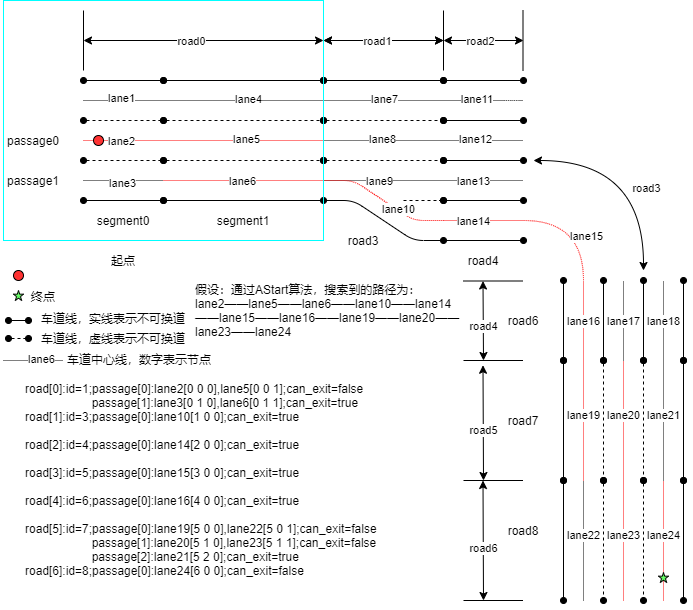

图中左上角蓝色方框为一个road的示例，包含road_index,passage_index,lane_index，左下角在生成的RoutingResponse上进行车道线编号。 参考：https://cloud.tencent.com/developer/article/1968719

待读资料：https://zhuanlan.zhihu.com/p/419350318

### topo_graph.proto

In [ ]:
syntax = "proto2";

package apollo.routing;

import "modules/map/proto/map_geometry.proto";

message CurvePoint {                                 // 曲线上的一个点
  optional double s = 1;
}

message CurveRange {                                 // 曲线上的一段
  optional CurvePoint start = 1;
  optional CurvePoint end = 2;
}

message Node {                                   // 车道上的一个节点 | 数据类型:Node | 对应:TopoNode object->PbNode()，包含：
  optional string lane_id = 1;                   // 车道id | 数据类型:std::string | 对应:opoNode object->LaneId(); Node object.lane_id()
  optional double length = 2;                    // 长度 | 数据类型:double | 对应:TopoNode object->Length(); Node object.length()
  repeated CurveRange left_out = 3;              // 左边出口(对应车道虚线的部分，或者自己定义的一段允许变道的路段)
  repeated CurveRange right_out = 4;             // 右边出口
  optional double cost = 5;                      // 路段代价(限速或者拐弯的路段会增加成本，代价系数在routing_config.pb.txt中定义) | 数据类型:double | 对应:TopoNode object->Cost(); Node object.cost()
  optional apollo.hdmap.Curve central_curve = 6; // 中心线(虚拟的，用于生成参考线) | 数据类型:hdmap::Curve | 对应:TopoNode object->CentralCurve(); Node object.central_curve()
  optional bool is_virtual = 7 [default = true]; // 是否可见 | 数据类型:bool | TopoNode object->IsVirtual(); Node object.is_virtual()
  optional string road_id = 8;                   // 车道所属的道路id | 数据类型:std::string | TopoNode object->RoadId(); Node object.road_id()
}

message Edge {                                   // 车道之间的连接关系 | 数据类型:Edge | 对应: TopoEdge object->PbEdge()，包含：
  enum DirectionType {
    FORWARD = 0;
    LEFT = 1;
    RIGHT = 2;
  }

  optional string from_lane_id = 1;              // ~ | 数据类型:std::string | 对应:TopoEdge object->FromLaneId(); Edge object.from_lane_id()
  optional string to_lane_id = 2;                // ~ | 数据类型:std::string | 对应:TopoEdge object->ToLaneId(); Edge object.to_lane_id()
  optional double cost = 3;                      // 成本 | 数据类型:double | 对应:TopoEdge object->Cost(); Edge object.cost()
  optional DirectionType direction_type = 4;     // 方向 | 数据类型:TopoEdgeType(defined in /apollo/modules/routing/graph/topo_node.h) | 对应:TopoEdge object->Type(); Edge object.direction_type()
}

message Graph {                          // 图的拓扑结构，包括
  optional string hdmap_version = 1;
  optional string hdmap_district = 2;
  repeated Node node = 3;                 // 若干Node
  repeated Edge edge = 4;                 // 若干Edge
}

### routing_config.proto

In [ ]:
syntax = "proto2";

package apollo.routing;

message TopicConfig {
  optional string routing_response_topic = 1;
  optional string routing_response_history_topic = 2;
}

message RoutingConfig {                     // Routing模块的配置信息，与/apollo/modules/routing/conf/routing_config.pb.txt结构一致
  optional double base_speed = 1;           // base speed for node creator [m/s]
  optional double left_turn_penalty = 2;    // left turn penalty for node creator [m]
  optional double right_turn_penalty = 3;   // right turn penalty for node creator [m]
  optional double uturn_penalty = 4;        // left turn penalty for node creator [m]
  optional double change_penalty = 5;       // change penalty for edge creator [m]
  optional double base_changing_length = 6; // base change length penalty for edge creator [m]
  optional TopicConfig topic_config = 7;
}

### poi.proto

In [ ]:
syntax = "proto2";

package apollo.routing;

import "modules/routing/proto/routing.proto";

message Landmark {                                             // 地图上的一个点，包含：
  optional string name = 1;                                    // 名称
  repeated LaneWaypoint waypoint = 2;                          // 位置信息
  optional string parking_space_id = 3 [deprecated = true]; 
  optional apollo.routing.ParkingInfo parking_info = 4;
}

message POI {
  repeated Landmark landmark = 1;
}

### 公用proto
proto文件不是孤立存在的，每个proto文件都可以通过import语法使用定义在其他文件中的结构

Routing模块以及其他模块都需要用的数据结构就定义在/apollo/apollo/modules/common/proto目录下:

In [ ]:
.
├── BUILD
├── direction.proto
├── drive_event.proto
├── drive_state.proto
├── error_code.proto
├── geometry.proto
├── header.proto
├── pnc_point.proto
└── vehicle_signal.proto

## graph(Topo地图)
为了计算路由路径，在Routing模块中包含一系列的类用来描述Topo地图的详细结构。
目录结构：

In [ ]:
.
├── BUILD
├── node_with_range.cc
├── node_with_range.h
├── range_utils.h
├── sub_topo_graph.cc
├── sub_topo_graph.h
├── sub_topo_graph_test.cc
├── topo_graph.cc
├── topo_graph.h
├── topo_graph_test.cc
├── topo_node.cc
├── topo_node.h
├── topo_node_test.cc
├── topo_range.cc
├── topo_range.h
├── topo_range_manager.cc
├── topo_range_manager.h
├── topo_range_test.cc
├── topo_test_utils.cc
└── topo_test_utils.h


类名|描述
:-|:-
TopoNode|Topo地图中的一个节点。包含了所属Lane和Road等信息。很显然，这是Topo地图中的核心数据结构。
TopoEdge|连接TopoNode之间的边，该结构中包含了起止TopoNode等信息。
NodeSRange|描述节点的某一段范围。一个TopoNode可以分为若干个NodeSRange。
NodeWithRange|描述节点及其范围，该类是NodeSRange的子类。
TopoRangeManager|NodeSRange的管理器。可以进行查找，添加，排序和合并操作。
SubTopoGraph|Topo子图，由搜索算法所用（目前是A*搜索算法）。
TopoGraph|对应了整个Topo地图。其构造函数需要一个Proto结构导出的地图文件，它将从地图文件中读取完整的Topo结构。

简单来说，Topo地图中最重要的就是节点和边，节点对应了道路，边对应了道路的连接关系。如下图所示
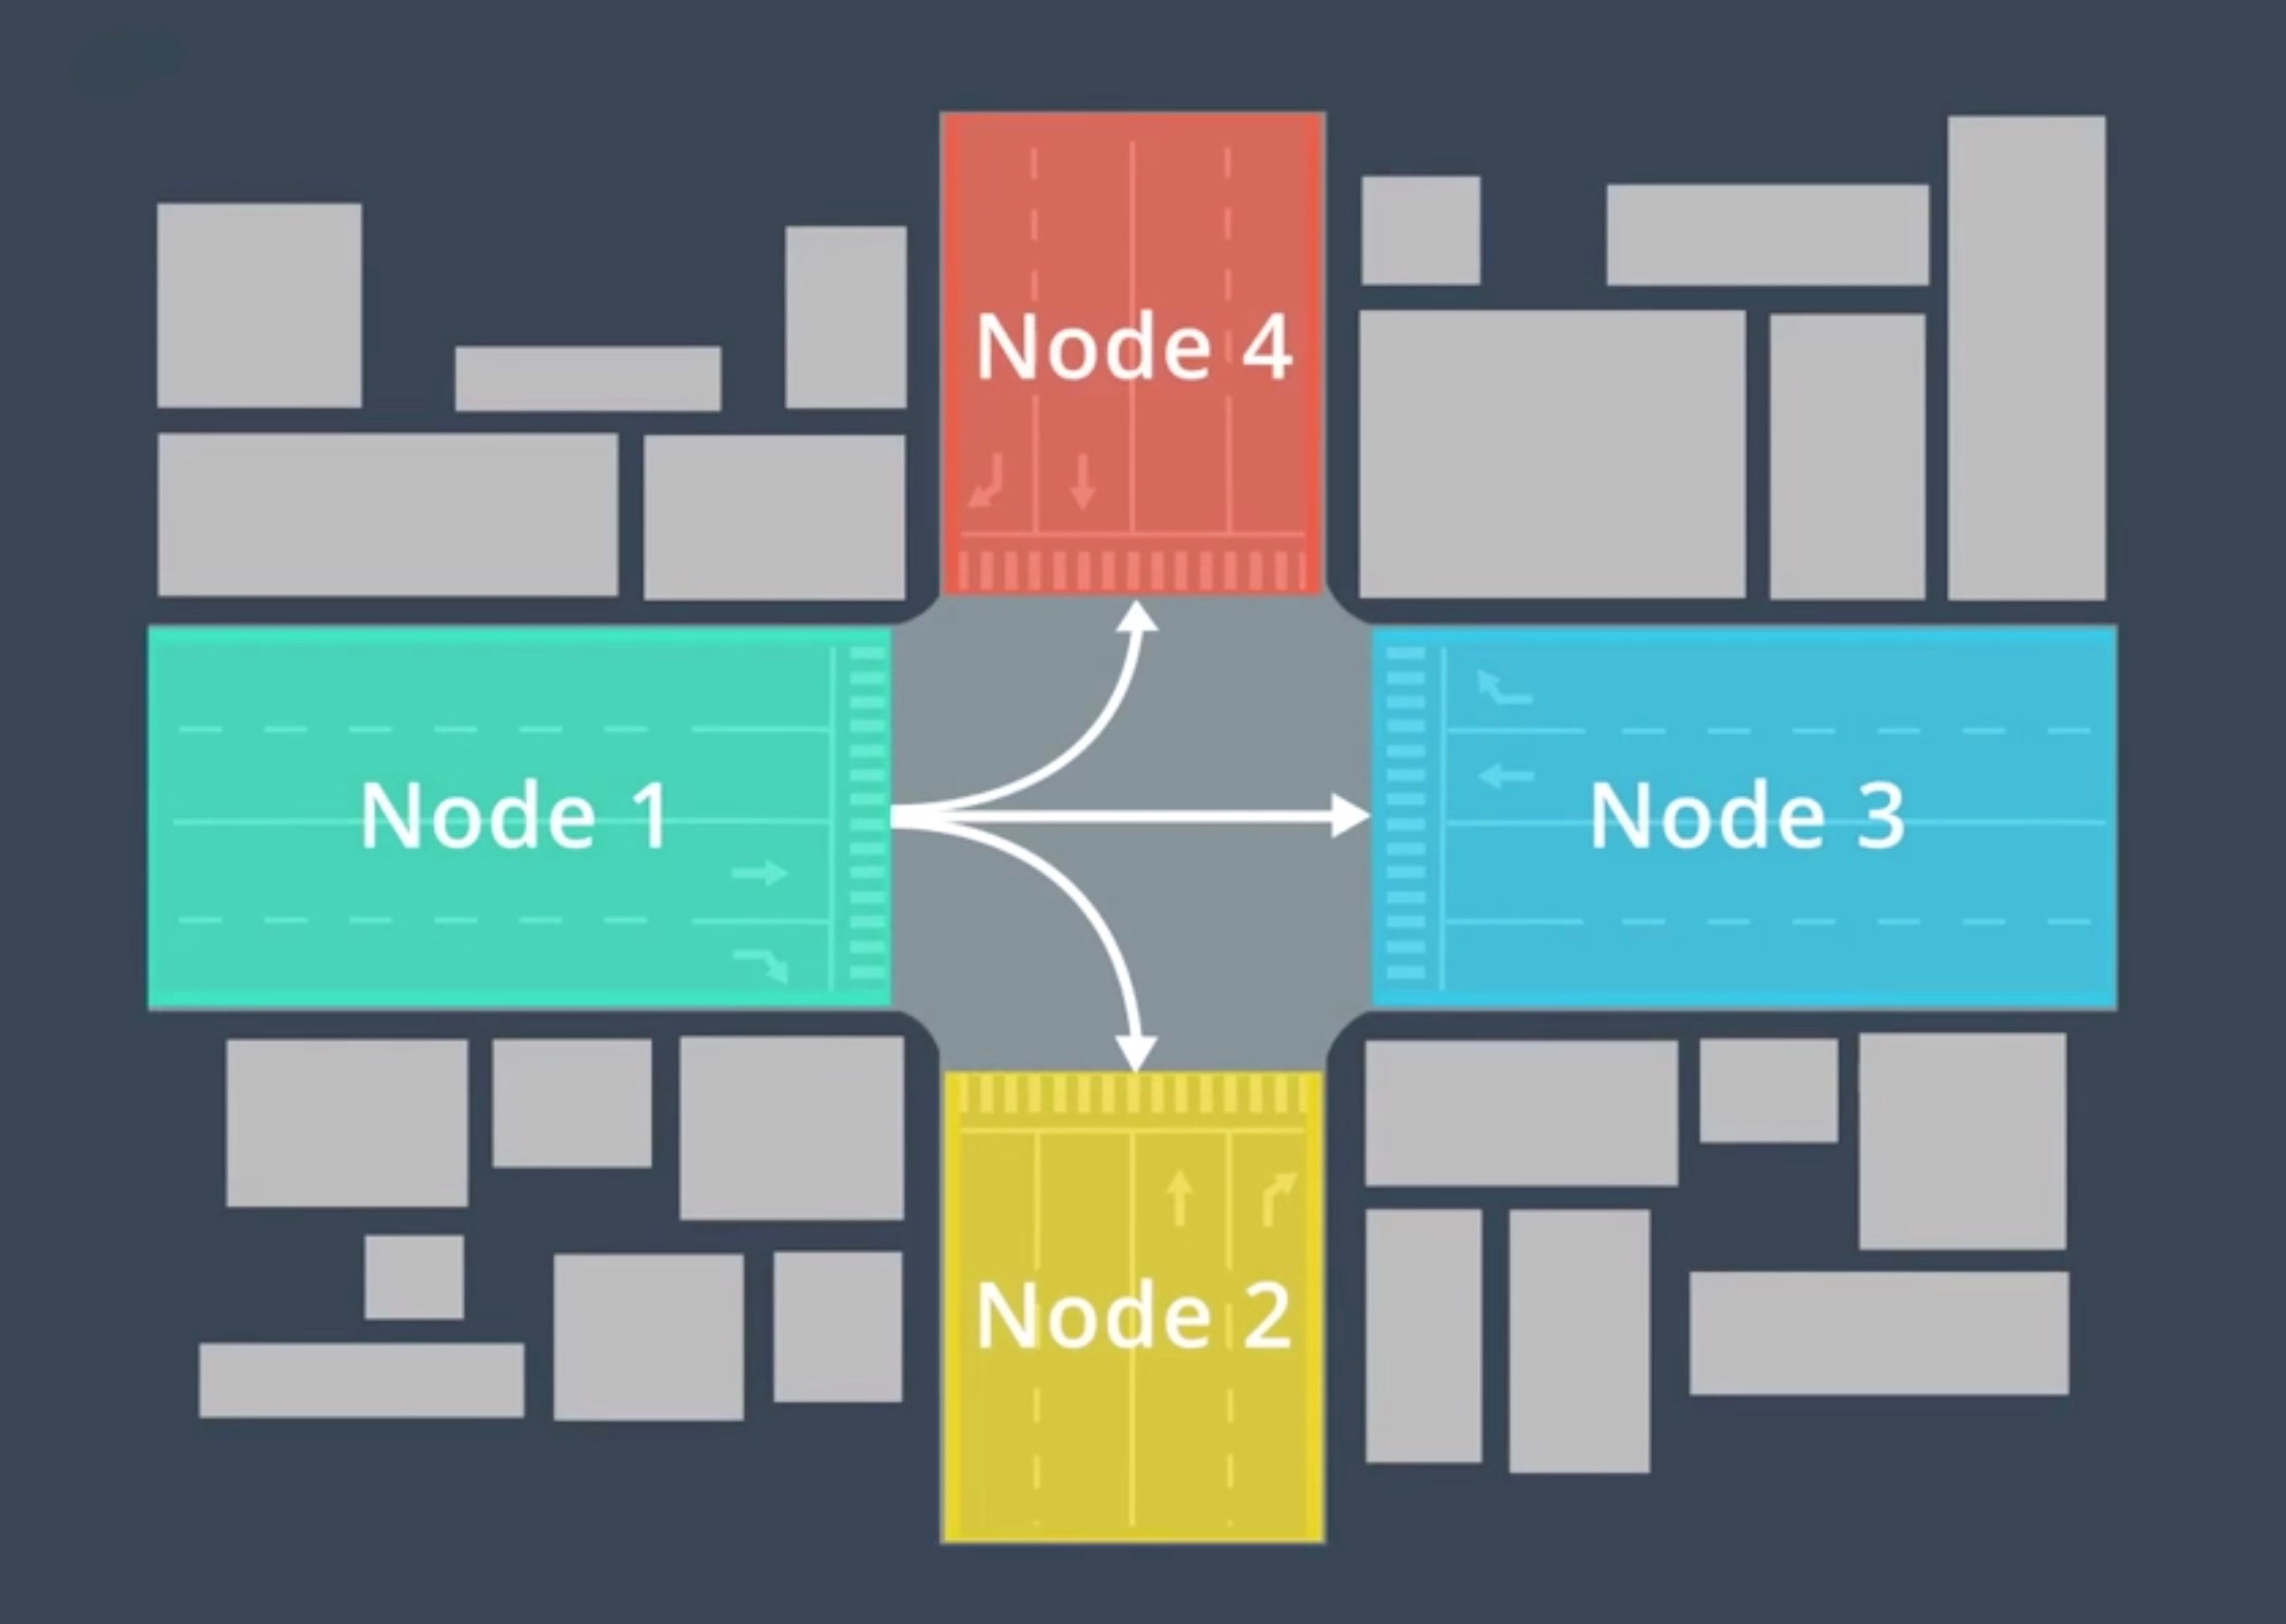

从源码中可以看到，Routing模块需要的地图结构通过TopoGraph来描述，而TopoGraph的初始化需要一个地图文件。但该地图文件与其他模块需要的地图文件并不一样，这里的地图文件是Proto结构导出的数据。之所以这样做是因为：Routing模块不仅需要地图的Topo结构，还需要知道每条路线的行驶代价。在Proto结构中包含了这些信息。在下面的内容中，我们将看到这个行驶代价是从哪里来的。

很显然，两个地点的导航路径结果通常会有多个。而计算导航路径的时候需要有一定的倾向，这个倾向就是行驶的代价越小越好。我们很自然的想到，影响行驶代价最大的因素就是行驶的距离。

但实际上，影响行驶代价的因素远不止距离这一个因素。距离只是宏观上的考虑，而从微观的角度来看，行驶过程中，需要进行多少次转弯，多少次掉头，多少变道，这些都是影响行驶代价的因素。所以，在计算行驶代价的时候，需要综合考虑这些因素。

再从另外一个角度来看，（在路线已经确定的情况下）行驶的距离是一个物理世界客观存在的结果，这是我们无法改变的。不过，对于行驶过程中，有多在意转弯，掉头和变道，每个人或者每个场景下的偏好就不一样了。而这，就是上文中提到的配置文件“/apollo/modules/routing/conf/routing_config.pb.txt“存在的意义了。这里面配置了上面提到的这些动作的惩罚基数，而这些基数会影响路线时的计算代价。

通过将这种偏好以配置文件的形式存储在代码之外，可以在不用重新编译代码的情况下，直接调整导航搜索的结果。并且可以方便的为不同的场景进行策略的配置（例如：高速环境和城市道路，这些参数的值很可能就是不一样的）。

Topo地图本质上是一系列的Topo节点以及它们的连接关系。因此TopoNode就要能够描述这些信息。在这个类中，包含了许多的属性来存储这些连接关系，如下所示：

<code>
  // in .../modules/routing/graph/topo_node.h  
  std::vector<NodeSRange> left_out_sorted_range_;
  std::vector<NodeSRange> right_out_sorted_range_;
  std::unordered_set<const TopoEdge*> in_from_all_edge_set_;
  std::unordered_set<const TopoEdge*> in_from_left_edge_set_;
  std::unordered_set<const TopoEdge*> in_from_right_edge_set_;
  std::unordered_set<const TopoEdge*> in_from_left_or_right_edge_set_;
  std::unordered_set<const TopoEdge*> in_from_pre_edge_set_;
  std::unordered_set<const TopoEdge*> out_to_all_edge_set_;
  std::unordered_set<const TopoEdge*> out_to_left_edge_set_;
  std::unordered_set<const TopoEdge*> out_to_right_edge_set_;
  std::unordered_set<const TopoEdge*> out_to_left_or_right_edge_set_;
  std::unordered_set<const TopoEdge*> out_to_suc_edge_set_;
  std::unordered_map<const TopoNode*, const TopoEdge*> out_edge_map_;
  std::unordered_map<const TopoNode*, const TopoEdge*> in_edge_map_;
</code>
    
有了这些信息之后，在进行路径搜索时，可以方便的查找线路。

### TopoNode类的构造函数 

In [ ]:
TopoNode::TopoNode(const Node & node) : pb_node_(node), start_s_(0.0), end_s_(pb_node_.length()) {
  ACHECK(pb_node_.length() > kLenghtEpsilon)
      << "Node length is invalid in pb: " << pb_node_.DebugString();
  Init();
  origin_node_ = this;
}

TopoNode::TopoNode(const TopoNode * topo_node, const NodeSRange & range)
    : TopoNode(topo_node->PbNode()) {
  origin_node_ = topo_node;
  start_s_ = range.StartS();
  end_s_ = range.EndS();
  Init();
}

In [ ]:
void TopoNode::Init() {
  if (!FindAnchorPoint()) {
    AWARN << "Be attention!!! Find anchor point failed for lane: " << LaneId();
  }
  ConvertOutRange( // 记录左侧边界的pb_node_.left_out() 转成 left_out_sorted_range_, 并返回最长线段索引 left_prefer_range_index_
      pb_node_.left_out(), start_s_, end_s_, &left_out_sorted_range_, &left_prefer_range_index_);

  is_left_range_enough_ = (left_prefer_range_index_ >= 0) &&
                          left_out_sorted_range_[left_prefer_range_index_].IsEnoughForChangeLane(); // 疑问??: ConvertOutRange函数仅对left_out_sorted_range_进行排序,暂未发现区间合并,仅通过最长(曲)线段判断是否有足够的距离进行换道,会不会忽略连续的区间?

  ConvertOutRange(
      pb_node_.right_out(), start_s_, end_s_, &right_out_sorted_range_, &right_prefer_range_index_);
  is_right_range_enough_ =
      (right_prefer_range_index_ >= 0) &&
      right_out_sorted_range_[right_prefer_range_index_].IsEnoughForChangeLane();
}

!!!待细推

In [ ]:
void ConvertOutRange(
    const RepeatedPtrField<CurveRange> & range_vec, // defined in /apollo/modules/routing/proto/topo_graph.proto
    double start_s,
    double end_s,
    std::vector<NodeSRange> * out_range,
    int * prefer_index) {
  // 记录左侧/右侧边界的(topo_graph类中的)RepeatedPtrField<CurveRange> 转成 vector<NodeSRange>, 并返回最长线段索引
  out_range->clear();
  for (const auto & c_range : range_vec) {
    // ---- c_range(CurveRange实例) -> s_range(NodeSRange实例) ----
    double s_s = c_range.start().s();
    double e_s = c_range.end().s();
    if (e_s < start_s || s_s > end_s || e_s < s_s) {
      continue;
    }
    s_s = std::max(start_s, s_s);
    e_s = std::min(end_s, e_s);
    NodeSRange s_range(s_s, e_s);
    // ---------
    out_range->push_back(std::move(s_range));
  }
  sort(out_range->begin(), out_range->end());
  int max_index = -1;
  double max_diff = 0.0;
  for (size_t i = 0; i < out_range->size(); ++i) {
    if (out_range->at(i).Length() > max_diff) {
      max_index = static_cast<int>(i);
      max_diff = out_range->at(i).Length();
    }
  }
  *prefer_index = max_index; // 左边/右边出口中最长(曲)线段的索引
}

## topo_creator
与人类开车时所使用的导航系统不一样，自动驾驶需要包含更加细致信息的高精地图，高精地图描述了整个行驶过程中物理世界的详细信息，例如：道路的方向，宽度，曲率，红绿灯的位置等等。而**<font color=red>物理世界的这些状态是很容易会发生改变的</font>**，例如，添加了一条新的道路，或者是新的红绿灯。这就要求高精地图也要频繁的更新。

那么Routing模块需要的地图文件也需要一起配套的跟着变化，这就很自然的需要有一个模块能够完成**<font color=red>从原先的高精地图生成Routing模块的Proto格式地图这一转换工作</font>**。而完成这一工作的，就是TopoCreator模块。

modules/routing/topo_creator/目录结构：

In [ ]:
.
├── BUILD
├── edge_creator.cc
├── edge_creator.h
├── graph_creator.cc
├── graph_creator.h
├── graph_creator_test.cc
├── node_creator.cc
├── node_creator.h
└── topo_creator.cc

TopoCreator的源码位于modules/routing/topo_creator/目录下，这是一个可执行程序。其main函数代码如下：

In [ ]:
int main(int argc, char **argv) {
  google::InitGoogleLogging(argv[0]);
  google::ParseCommandLineFlags(&argc, &argv, true);

  apollo::routing::RoutingConfig routing_conf;

  ACHECK(apollo::cyber::common::GetProtoFromFile(FLAGS_routing_conf_file,
                                                 &routing_conf))
      << "Unable to load routing conf file: " + FLAGS_routing_conf_file;

  AINFO << "Conf file: " << FLAGS_routing_conf_file << " is loaded.";

  const auto base_map = apollo::hdmap::BaseMapFile();
  const auto routing_map = apollo::hdmap::RoutingMapFile();

  apollo::routing::GraphCreator creator(base_map, routing_map, routing_conf);
  ACHECK(creator.Create()) << "Create routing topo failed!";

  AINFO << "Create routing topo successfully from " << base_map << " to "
        << routing_map;
  return 0;
}

这里的逻辑很简单，就是先读取配置文件中的信息到RoutingConfig中，然后通过GraphCreator根据高清地图文件生成Routing模块需要的Topo地图。

**<font color=red>配置文件（routing_config.pb.txt）中的值的调整将影响这里生成的Topo地图的计算代价，而在Routing模块真正执行路线搜索的时候，又会考虑这些代价，于是就会影响最终的导航计算结果<\font>**。整个流程如下图所示：
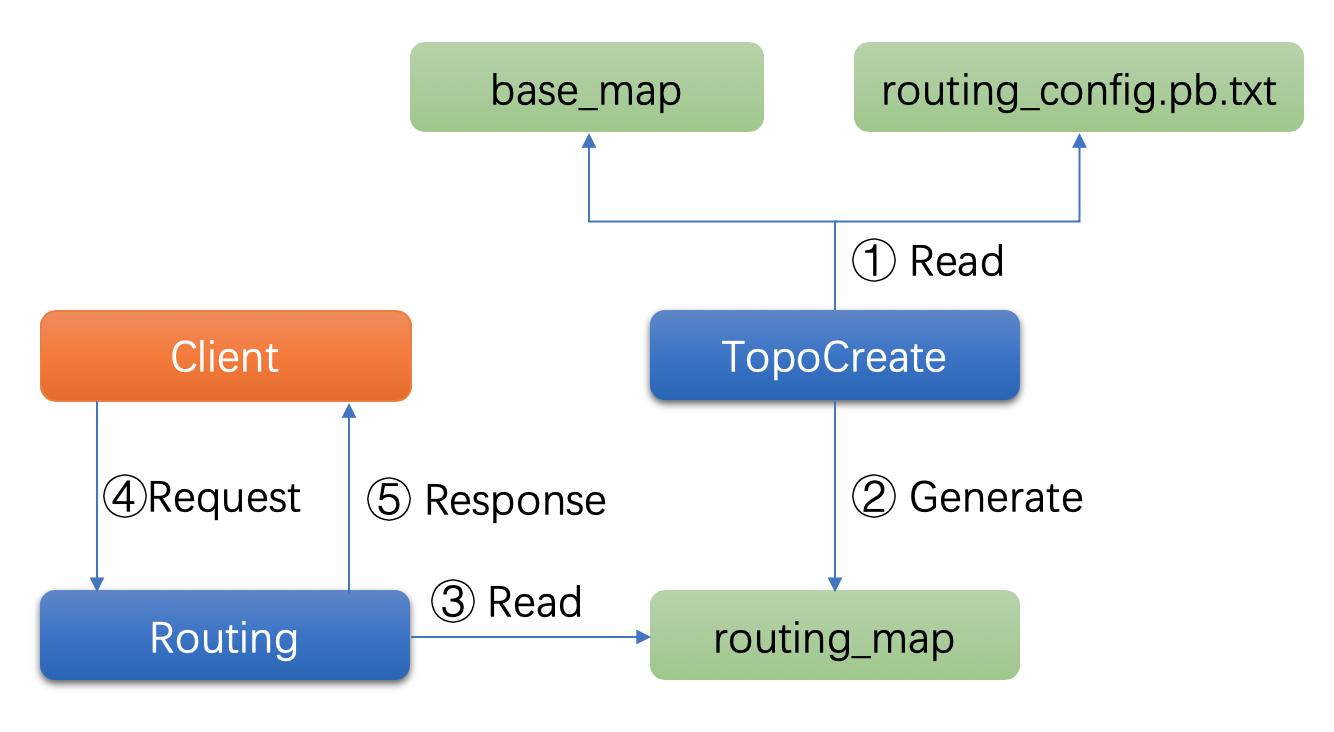

// topo_creator.cc -> 入口

#include "core/common/file.h"
#include "modules/map/hdmap/hdmap_util.h"
#include "modules/routing/common/routing_gflags.h"
#include "modules/routing/topo_creator/graph_creator.h"

int main(int argc, char **argv) {
  google::InitGoogleLogging(argv[0]);
  google::ParseCommandLineFlags(&argc, &argv, true);

  apollo::routing::RoutingConfig routing_conf;

  ACHECK(apollo::core::common::GetProtoFromFile(FLAGS_routing_conf_file,
                                                 &routing_conf))
      << "Unable to load routing conf file: " + FLAGS_routing_conf_file;

  AINFO << "Conf file: " << FLAGS_routing_conf_file << " is loaded.";

  const auto base_map = apollo::hdmap::BaseMapFile();       // base_map路径
  const auto routing_map = apollo::hdmap::RoutingMapFile(); // routing_map路径

  apollo::routing::GraphCreator creator(base_map, routing_map, routing_conf); // base_map -> routing_map
  ACHECK(creator.Create()) << "Create routing topo failed!";

  AINFO << "Create routing topo successfully from " << base_map << " to "
        << routing_map;
  return 0;
}


// graph_creator.h
#include <string>
#include <unordered_map>
#include <unordered_set>

#include "modules/map/proto/map.pb.h"
#include "modules/routing/proto/routing_config.pb.h"
#include "modules/routing/proto/topo_graph.pb.h"

namespace apollo {
namespace routing {

class GraphCreator {
 public:
  GraphCreator(const std::string& base_map_file_path,
               const std::string& dump_topo_file_path,
               const RoutingConfig& routing_conf);

  ~GraphCreator() = default;

  bool Create();

 private:
  void InitForbiddenLanes();
  std::string GetEdgeID(const std::string& from_id, const std::string& to_id);

  void AddEdge(
      const Node& from_node,
      const ::google::protobuf::RepeatedPtrField<hdmap::Id>& to_node_vec,
      const Edge::DirectionType& type);

  static bool IsValidUTurn(const hdmap::Lane& lane, const double radius);

 private:
  std::string base_map_file_path_;
  std::string dump_topo_file_path_;
  hdmap::Map pbmap_; // 对应base_map, defined in /apollo/modules/map/proto/map.proto
  Graph graph_;      // 对应routing_map, defined in /apollo/modules/routing/proto/topo_graph.proto
  std::unordered_map<std::string, int> node_index_map_;       // 记录 lane id -> graph_(routing_map)中node的索引index 的映射关系
  std::unordered_map<std::string, std::string> road_id_map_;  // 记录 将lane id 和 road id 映射关系
  std::unordered_set<std::string> showed_edge_id_set_;        // graph_(routing_map)的边id集合
  std::unordered_set<std::string> forbidden_lane_id_set_;

  const RoutingConfig& routing_conf_;
};

}  // namespace routing
}  // namespace apollo

// GraphCreator::Create in graph_creator.cc

bool GraphCreator::Create() {
  if (absl::EndsWith(base_map_file_path_, ".xml")) {
    if (!hdmap::adapter::OpendriveAdapter::LoadData(base_map_file_path_,
                                                    &pbmap_)) {
      AERROR << "Failed to load base map file from " << base_map_file_path_;
      return false;
    }
  } else {
    if (!core::common::GetProtoFromFile(base_map_file_path_, &pbmap_)) {
      AERROR << "Failed to load base map file from " << base_map_file_path_;
      return false;
    }
  }

  AINFO << "Number of lanes: " << pbmap_.lane_size();

  graph_.set_hdmap_version(pbmap_.header().version());  // graph_:最后保存的地图, defined in /apollo/modules/routing/proto/topo_graph.proto
  graph_.set_hdmap_district(pbmap_.header().district());

  node_index_map_.clear();
  road_id_map_.clear();                                 // std::unordered_map<std::string, std::string> road_id_map_;
  showed_edge_id_set_.clear();

  // 从pbmap_(base_map)中读取并保存 lane id 和 road id 映射关系
  for (const auto& road : pbmap_.road()) {              // pbmap_.road() is road集合, defined by "repeated Road road = 11;" in /apollo/modules/map/proto/map.proto
    for (const auto& section : road.section()) {        // road.section() is section集合, defined by "repeated RoadSection section = 2;;" in /apollo/modules/map/proto/map_road.proto
      for (const auto& lane_id : section.lane_id()) {   // section.lane_id() is lane_id集合, defined by "repeated Id lane_id = 2;" in /apollo/modules/map/proto/map_road.proto
        road_id_map_[lane_id.id()] = road.id().id();    // 将lane id 和 road id 映射关系保存至 std::unordered_map<std::string, std::string> road_id_map_
      }
    }
  }

  InitForbiddenLanes(); // 初始化禁止的车道线
  const double min_turn_radius =
      VehicleConfigHelper::GetConfig().vehicle_param().min_turn_radius(); // 从配置文件中读取最小掉头半径
  
  // 遍历pbmap_(base_map)中的lane, 创建节点; 并记录lane id -> road id 的映射关系, 存储在node_index_map_
  for (const auto& lane : pbmap_.lane()) { // lane的数据类型: hdmap::Lane | 对应base_map中的lane, 即Map类中的lane
    const auto& lane_id = lane.id().id();
    
    // 跳过不是城市道路(CITY_DRIVING)的车道
    if (forbidden_lane_id_set_.find(lane_id) != forbidden_lane_id_set_.end()) {
      ADEBUG << "Ignored lane id: " << lane_id
             << " because its type is NOT CITY_DRIVING.";
      continue;
    }
    
    // 跳过掉头曲率太小的车道
    if (lane.turn() == hdmap::Lane::U_TURN &&
        !IsValidUTurn(lane, min_turn_radius)) {
      ADEBUG << "The u-turn lane radius is too small for the vehicle to turn";
      continue;
    }
    
    AINFO << "Current lane id: " << lane_id;
    
    node_index_map_[lane_id] = graph_.node_size();  // 知乎:存储图中节点index和lane_id的关系，因为跳过node可以找到lane，而通过lane_id需要遍历节点才能找到节点index
                                                    // 推测为: 因为graph_(routing_map)只能通过索引index定位node元素, 无法根据lane id定位node元素, 
                                                    // 所以需要记录 lane id -> graph_中node的索引index 的映射关系
                                                    // 随着lane的增加, graph_.node_size()的数量也随之增加, 进而graph_.node_size()的累积量对应索引index
    
    // 如果从road_id_map_中找到lane_id，则把创建节点的时候指定道路id，如果没有找到那么road_id则为空
    const auto iter = road_id_map_.find(lane_id);
    if (iter != road_id_map_.end()) {               // 如果能在road_id_map_中找到lane id对应的road id
      node_creator::GetPbNode(lane,                 // GetPbNode推测为: 根据lane, 及其road id, 以及配置参数, 在graph_(routing_map)中添加一个新node
                              iter->second,         // road id
                              routing_conf_,
                              graph_.add_node());   // graph_.add_node() 返回的数据类型是Node
    } else {
      AWARN << "Failed to find road id of lane " << lane_id;
      node_creator::GetPbNode(lane, "", routing_conf_, graph_.add_node());
    }
  }

  // 遍历pbmap_(base_map)中的lane, 创建边
  for (const auto& lane : pbmap_.lane()) {
    const auto& lane_id = lane.id().id();
    if (forbidden_lane_id_set_.find(lane_id) != forbidden_lane_id_set_.end()) {
      ADEBUG << "Ignored lane id: " << lane_id
             << " because its type is NOT CITY_DRIVING.";
      continue;
    }
    
    const auto& from_node = graph_.node(node_index_map_[lane_id]);  // Graph::node(int index) 通过索引index定位graph_(routing_map)中的node
                                                                    // node_index_map_[lane_id] 根据lane id查找graph_中node的索引index

    AddEdge(from_node, lane.successor_id(), Edge::FORWARD);         // 添加一条从from_node到lane.successor_id()的边，注意这里没有换道，所以方向为前
    if (lane.length() < FLAGS_min_length_for_lane_change) {
      continue;
    }
    if (lane.has_left_boundary() && IsAllowedToCross(lane.left_boundary())) {   // 如果车道lane有左边出口，且允许变道
      AddEdge(from_node, lane.left_neighbor_forward_lane_id(), Edge::LEFT);     // 添加一条从from_node到lane.left_neighbor_forward_lane_id()的边
    }

    if (lane.has_right_boundary() && IsAllowedToCross(lane.right_boundary())) {
      AddEdge(from_node, lane.right_neighbor_forward_lane_id(), Edge::RIGHT);
    }
  }

  // 保存routing_map文件，有2种格式txt和bin
  if (!absl::EndsWith(dump_topo_file_path_, ".bin") &&
      !absl::EndsWith(dump_topo_file_path_, ".txt")) {
    AERROR << "Failed to dump topo data into file, incorrect file type "
           << dump_topo_file_path_;
    return false;
  }
  auto type_pos = dump_topo_file_path_.find_last_of(".") + 1;
  std::string bin_file = dump_topo_file_path_.replace(type_pos, 3, "bin");
  std::string txt_file = dump_topo_file_path_.replace(type_pos, 3, "txt");
  if (!core::common::SetProtoToASCIIFile(graph_, txt_file)) {
    AERROR << "Failed to dump topo data into file " << txt_file;
    return false;
  }
  AINFO << "Txt file is dumped successfully. Path: " << txt_file;
  if (!core::common::SetProtoToBinaryFile(graph_, bin_file)) {
    AERROR << "Failed to dump topo data into file " << bin_file;
    return false;
  }
  AINFO << "Bin file is dumped successfully. Path: " << bin_file;
  return true;
}

// GraphCreator::AddEdge in graph_creator.cc 被 GraphCreator::Create in graph_creator.cc 调用

std::string GraphCreator::GetEdgeID(const std::string& from_id,
                                    const std::string& to_id) {
  return from_id + "->" + to_id;
}

void GraphCreator::AddEdge(const Node& from_node,       // Node is defined in /apollo/modules/routing/proto/topo_graph.proto
                           const RepeatedPtrField<Id>& to_node_vec,
                           const Edge::DirectionType& type) {
  for (const auto& to_id : to_node_vec) {               // to_node_vec, 即lane.successor_id() 可能对应多个lane; to_id 对应其中一个lane
    if (forbidden_lane_id_set_.find(to_id.id()) !=
        forbidden_lane_id_set_.end()) {
      ADEBUG << "Ignored lane [id = " << to_id.id();
      continue;
    }
    const std::string edge_id = GetEdgeID(from_node.lane_id(), to_id.id());
    if (showed_edge_id_set_.count(edge_id) != 0) {      // 如果edge_id已在记录showed_edge_id_set_中,则跳过当前loop
      continue;
    }
    showed_edge_id_set_.insert(edge_id);
    const auto& iter = node_index_map_.find(to_id.id());// 记录 lane id -> graph_(routing_map)中node的索引index 的映射关系
    if (iter == node_index_map_.end()) {                // 如果邻接车道id(to_id)的lane id不在node_index_map_中,则跳过当前loop
      continue;
    }
    const auto& to_node = graph_.node(iter->second);    // to_node is 邻接车道在graph_(routing_map)中对应的Node
    edge_creator::GetPbEdge(from_node, to_node, type, routing_conf_,
                            graph_.add_edge());
  }
}

// edge_creator.cc 被 GraphCreator::AddEdge in graph_creator.cc 调用
#include "modules/routing/topo_creator/edge_creator.h"
#include <cmath>

namespace apollo {
namespace routing {
namespace edge_creator {

void GetPbEdge(const Node& node_from, const Node& node_to,
               const Edge::DirectionType& type,
               const RoutingConfig& routing_config, Edge* edge) {
  edge->set_from_lane_id(node_from.lane_id());
  edge->set_to_lane_id(node_to.lane_id());
  edge->set_direction_type(type);

  edge->set_cost(0.0); // 默认代价，即直行
  if (type == Edge::LEFT || type == Edge::RIGHT) {
    const auto& target_range =
        (type == Edge::LEFT) ? node_from.left_out() : node_from.right_out();
    double changing_area_length = 0.0; // changing_area_length is (左侧/右侧)出口累积长度
    for (const auto& range : target_range) {
      changing_area_length += range.end().s() - range.start().s();
    }
    double ratio = 1.0;
    if (changing_area_length < routing_config.base_changing_length()) { // base_changing_length = 50.0, defined in /apollo/modules/routing/conf/routing_config.pb.txt
      ratio = std::pow( // 如果 changing_area_length 小于 50.0 且 越来越小, ratio > 1 且越来越大
          changing_area_length / routing_config.base_changing_length(), -1.5);
    }
    edge->set_cost(routing_config.change_penalty() * ratio);            // change_penalty = 500.0, defined in /apollo/modules/routing/conf/routing_config.pb.txt
  }
}

}  // namespace edge_creator
}  // namespace routing
}  // namespace apollo

**<font color=red>node_creator.cc 待深入解析!!</font>**

## core
目录结构：

In [ ]:
.
├── BUILD
├── black_list_range_generator.cc
├── black_list_range_generator.h
├── navigator.cc
├── navigator.h
├── result_generator.cc
└── result_generator.h

### Navigator类构造


In [ ]:
Navigator::Navigator(const std::string& topo_file_path) { // 输入: topo_file_path, 即routing_map.bin存放路径
  // 在生成Navigator实例的同时, 加载地图数据routing_map.bin -> Graph graph -> TopoGraph graph_
  Graph graph;
  if (!core::common::GetProtoFromFile(topo_file_path, &graph)) {  // 尝试读取routing_map.bin, 并存储在graph, which is an instance of Class Graph, which is defined in /apollo/modules/routing/proto/topo_graph.proto
    AERROR << "Failed to read topology graph from " << topo_file_path;
    return;
  }

  graph_.reset(new TopoGraph());
  if (!graph_->LoadGraph(graph)) {                                // 尝试从 Graph graph 下载数据到 TopoGraph graph_
    AINFO << "Failed to init navigator graph failed! File path: "
          << topo_file_path;
    return;
  }
  black_list_generator_.reset(new BlackListRangeGenerator);
  result_generator_.reset(new ResultGenerator);
  is_ready_ = true;
  AINFO << "The navigator is ready.";
}

In [ ]:
// TopoGraph::LoadGraph 被 Navigator::Navigator 调用
// defined in /apollo/modules/routing/graph/topo_graph.cc

bool TopoGraph::LoadGraph(const Graph & graph) {
  Clear();

  map_version_ = graph.hdmap_version();
  map_district_ = graph.hdmap_district();

  if (!LoadNodes(graph)) {
    AERROR << "Failed to load nodes from topology graph.";
    return false;
  }
  if (!LoadEdges(graph)) {
    AERROR << "Failed to load edges from topology graph.";
    return false;
  }
  AINFO << "Load Topo data successful.";
  return true;
}

bool TopoGraph::LoadNodes(const Graph & graph) {
  // 将Graph类(defined in /apollo/modules/routing/proto/topo_graph.proto)中的Node
  // 加载到TopoGraph类(defined in /apollo/modules/routing/graph/topo_graph.h)中的topo_nodes_
  if (graph.node().empty()) {
    AERROR << "No nodes found in topology graph.";
    return false;
  }
  for (const auto & node : graph.node()) {
    node_index_map_[node.lane_id()] = static_cast<int>(topo_nodes_.size()); // std::unordered_map<std::string, int> node_index_map_ (defined in /apollo/modules/routing/graph/topo_graph.h) 存储:node的lane id -> topo_node在topo_nodes_中的索引index 映射关系
                                                                            // std::vector<std::shared_ptr<TopoNode>> topo_nodes_ (defined in /apollo/modules/routing/graph/topo_graph.h) 存储:TopoNode向量
    std::shared_ptr<TopoNode> topo_node;                                    
    topo_node.reset(new TopoNode(node));                                    // Node(defined in /apollo/modules/routing/proto/topo_graph.proto) -> TopoNode(defined in /apollo/modules/routing/graph/topo_node.h)
    road_node_map_[node.road_id()].insert(topo_node.get());                 // std::unordered_map<std::string, std::unordered_set<const TopoNode *> > road_node_map_ (defined in /apollo/modules/routing/graph/topo_graph.h) 存储:road id -> topo_node集合的映射关系
    topo_nodes_.push_back(std::move(topo_node));
  }
  return true;
}

// Need to execute load_nodes() firstly
bool TopoGraph::LoadEdges(const Graph & graph) {
  // 将Graph类(defined in /apollo/modules/routing/proto/topo_graph.proto)中的Edge
  // 加载到TopoGraph类(defined in /apollo/modules/routing/graph/topo_graph.h)中的topo_edges_
  if (graph.edge().empty()) {
    AINFO << "0 edges found in topology graph, but it's fine";
    return true;
  }
  for (const auto & edge : graph.edge()) {
    const std::string & from_lane_id = edge.from_lane_id();
    const std::string & to_lane_id = edge.to_lane_id();
    if (node_index_map_.count(from_lane_id) != 1 || node_index_map_.count(to_lane_id) != 1) {
      return false;
    }
    std::shared_ptr<TopoEdge> topo_edge;
    TopoNode * from_node = topo_nodes_[node_index_map_[from_lane_id]].get();  // 根据lane id(在topo_nodes_中)找对应的TopoNode from_node
    TopoNode * to_node = topo_nodes_[node_index_map_[to_lane_id]].get();
    topo_edge.reset(new TopoEdge(edge, from_node, to_node));                  // Edge+TopoNode+TopoNode -> TopoEdge(defined in /apollo/modules/routing/graph/topo_node.h)
    from_node->AddOutEdge(topo_edge.get());                         
    to_node->AddInEdge(topo_edge.get());
    topo_edges_.push_back(std::move(topo_edge));                              // std::vector<std::shared_ptr<TopoEdge>> topo_edges_ (defined in /apollo/modules/routing/graph/topo_graph.h) 存储:TopoEdge向量
  }
  return true;
}

In [ ]:
// TopoNode::AddInEdge + TopoNode::AddOutEdge 被 TopoGraph::LoadEdges 调用
// defined in /apollo/modules/routing/graph/topo_node.cc

void TopoNode::AddInEdge(const TopoEdge * edge) {
  if (edge->ToNode() != this) {
    return;
  }
  if (in_edge_map_.count(edge->FromNode()) != 0) {
    return;
  }
  switch (edge->Type()) {
    case TET_LEFT:
      in_from_right_edge_set_.insert(edge);
      in_from_left_or_right_edge_set_.insert(edge);
      break;
    case TET_RIGHT:
      in_from_left_edge_set_.insert(edge);
      in_from_left_or_right_edge_set_.insert(edge);
      break;
    default:
      in_from_pre_edge_set_.insert(edge);
      break;
  }
  in_from_all_edge_set_.insert(edge);
  in_edge_map_[edge->FromNode()] = edge;
}

void TopoNode::AddOutEdge(const TopoEdge * edge) {
  if (edge->FromNode() != this) {  // this 指代的是TopoNode本身
    return;
  }
  if (out_edge_map_.count(edge->ToNode()) != 0) {
    return;
  }
  switch (edge->Type()) {
    case TET_LEFT:
      out_to_left_edge_set_.insert(edge);
      out_to_left_or_right_edge_set_.insert(edge);
      break;
    case TET_RIGHT:
      out_to_right_edge_set_.insert(edge);
      out_to_left_or_right_edge_set_.insert(edge);
      break;
    default:
      out_to_suc_edge_set_.insert(edge);
      break;
  }
  out_to_all_edge_set_.insert(edge);
  out_edge_map_[edge->ToNode()] = edge; // out_edge_map_ is 当前TopoNode(edge->FromNode() or this)能到达的TopoNode(edge->ToNode()) -> 边(edge) 的映射关系
                                        // std::unordered_map<const TopoNode *, const TopoEdge *> out_edge_map_;
                                        // which is defined in /apollo/modules/routing/graph/topo_node.h
}

Graph类与TopoGraph类的区别:

routing_map是Graph类的实例, TopoGraph类的实例是加载routing_map生成的, 但TopoGraph实例比Graph实例的信息更多, 具体如下:

* 顶点(+ 进入/离开该顶点的各类边集合 & 邻接点->边的映射关系) <br>
<code>std::unordered_set<const TopoEdge *> in_from_all_edge_set_;
std::unordered_set<const TopoEdge *> in_from_pre_edge_set_;
std::unordered_set<const TopoEdge *> in_from_left_or_right_edge_set_;
std::unordered_set<const TopoEdge *> in_from_left_edge_set_;
std::unordered_set<const TopoEdge *> in_from_right_edge_set_;</code> <br>
// in_from_all_edge_set_ = in_from_pre_edge_set_ $\cup$ in_from_left_or_right_edge_set_ <br>
// in_from_left_or_right_edge_set_ = in_from_left_edge_set_ $\cup$ in_from_right_edge_set_ <br>
<code>std::unordered_map\<const TopoNode *, const TopoEdge *\> in_edge_map_;</code><br><br>
<code>std::unordered_set<const TopoEdge *> out_to_all_edge_set_;
std::unordered_set<const TopoEdge *> out_to_suc_edge_set_;
std::unordered_set<const TopoEdge *> out_to_left_or_right_edge_set_;
std::unordered_set<const TopoEdge *> out_to_left_edge_set_;
std::unordered_set<const TopoEdge *> out_to_right_edge_set_;</code> <br>
// out_to_all_edge_set_ = out_to_suc_edge_set_ $\cup$ out_to_left_or_right_edge_set_ <br>
// out_to_left_or_right_edge_set_ = out_to_left_edge_set_ $\cup$ out_to_right_edge_set_ <br>
<code>std::unordered_map\<const TopoNode *, const TopoEdge *\> out_edge_map_;</code> <br>
// out_edge_map_ is 当前TopoNode(edge->FromNode() or this)能到达的TopoNode(edge->ToNode()) -> 边(edge) 的映射关系
    
    
* 边(+ 返回边连接的两个TopoNode对象)<br>
<code>const TopoNode * FromNode() const; // 返回 const TopoNode * from_node
const TopoNode * ToNode() const; // 返回 const TopoNode * to_node</code> <br>
Edge类中只记录了from_lane_id和to_lane_id, 且Node类无法根据id进行定位, 故无法根据Edge的信息直接返回两端的Node信息, 因此定义了TopoEdge类的结构, 即TopoEdge(const Edge & edge, const TopoNode * from_node, const TopoNode * to_node);
    
    
* 映射关系<br>
<code>std::unordered_map<std::string, int> node_index_map_; // node的lane id -> topo_node在topo_nodes_中的索引index 映射关系
std::unordered_map\<std::string, std::unordered_set\<const TopoNode *\> \> road_node_map_; // road id -> topo_node集合的映射关系 </code><br>
因为routing_map中的node无法根据lane id进行查询, 因此在 TopoGraph 中增加 node_index_map_; 此外, 一条road包含若干个lane, 因此在 TopoGraph 中增加 road_node_map_

### Navigator::SearchRoute
Navigator本身并没有实现路径搜索的算法。它仅仅是借助其他类来完成路由路径的搜索过程。

相关逻辑在Navigator::SearchRoute方法中。Navigator::SearchRoute方法的第四步调用了类自身的SearchRouteByStrategy方法。在这个方法中，会借助AStarStrategy来完成路径的搜索。

Navigator::SearchRoute方法代码如下：

bool Navigator::SearchRoute(const RoutingRequest& request,
                            RoutingResponse* const response) {
  if (!ShowRequestInfo(request, graph_.get())) {                                // 1.检查请求中每个 waypoint(所对应的lane id) & blacklisted_lane 能否(在TopoGraph中)找到对应的TopoNode
                                                                                // graph_ is an instance of Class TopoGraph, 在Navigator类实例构造时已生成
    SetErrorCode(ErrorCode::ROUTING_ERROR_REQUEST,
                 "Error encountered when reading request point!",
                 response->mutable_status());
    return false;
  }

  if (!IsReady()) {                                                             // 2.判断Navigator实例的地图数据是否加载成功
    SetErrorCode(ErrorCode::ROUTING_ERROR_NOT_READY, "Navigator is not ready!",
                 response->mutable_status());
    return false;
  }
  std::vector<const TopoNode*> way_nodes;
  std::vector<double> way_s;
  if (!Init(request, graph_.get(), &way_nodes, &way_s)) {                       // 3.解析请求中每个waypoint 生成其对应的(TopoNode & 在frenet坐标系中的s)向量, 以及车道黑名单管理器
    SetErrorCode(ErrorCode::ROUTING_ERROR_NOT_READY,
                 "Failed to initialize navigator!", response->mutable_status());
    return false;
  }

  std::vector<NodeWithRange> result_nodes; // 存放routing的结果
  if (!SearchRouteByStrategy(graph_.get(), way_nodes, way_s, &result_nodes)) {  // 4.执行搜索算法
    SetErrorCode(ErrorCode::ROUTING_ERROR_RESPONSE,
                 "Failed to find route with request!",
                 response->mutable_status());
    return false;
  }
  if (result_nodes.empty()) {
    SetErrorCode(ErrorCode::ROUTING_ERROR_RESPONSE, "Failed to result nodes!",
                 response->mutable_status());
    return false;
  }

  result_nodes.front().SetStartS(request.waypoint().begin()->s());
  result_nodes.back().SetEndS(request.waypoint().rbegin()->s());
  if (!result_generator_->GeneratePassageRegion(                                // 5. 组装搜索结果
          graph_->MapVersion(), request, result_nodes, topo_range_manager_,
          response)) {
    SetErrorCode(ErrorCode::ROUTING_ERROR_RESPONSE,
                 "Failed to generate passage regions based on result lanes",
                 response->mutable_status());
    return false;
  }
  SetErrorCode(ErrorCode::OK, "Success!", response->mutable_status());

  PrintDebugData(result_nodes);
  return true;
}

#### ShowRequestInfo

In [ ]:
bool ShowRequestInfo(const RoutingRequest& request, const TopoGraph* graph) {
  // 检查请求中每个 waypoint 所对应的lane id 能否(在TopoGraph中)找到对应的TopoNode, 并打印 waypoint 的信息
  for (const auto& wp : request.waypoint()) {
    const auto* node = graph->GetNode(wp.id()); // 根据 lane id 返回 TopoGraph 中对应的 TopoNode
    if (node == nullptr) {
      AERROR << "Way node is not found in topo graph! ID: " << wp.id();
      return false;
    }
    AINFO << "Way point:\tlane id: " << wp.id()                 // lane id
          << " s: " << wp.s()                                   // frenet坐标系(i.e., s-l坐标系)中的s
          << " x: " << wp.pose().x() << " y: " << wp.pose().y() // 笛卡尔坐标系中的x,y
          << " length: " << node->Length();                     // lane长度
  }

  // 检查请求中每个 blacklisted_lane 能否(在TopoGraph中)找到对应的TopoNode, 并打印 blacklisted_lane 的信息
  for (const auto& bl : request.blacklisted_lane()) {
    const auto* node = graph->GetNode(bl.id());
    if (node == nullptr) {
      AERROR << "Black list node is not found in topo graph! ID: " << bl.id();
      return false;
    }
    AINFO << "Black point:\tlane id: " << bl.id()                     // bl is an instance of Class LaneSegment, which is defined in /apollo/modules/routing/proto/routing.proto
          << " start_s: " << bl.start_s() << " end_s: " << bl.end_s()
          << " length: " << node->Length();
  }

  return true;
}

In [ ]:
// 被 ShowRequestInfo 调用 第一次
// defined in /apollo/modules/routing/graph/topo_graph.cc

const TopoNode * TopoGraph::GetNode(const std::string & id) const {
  // 根据 lane id 在TopoGraph(中的node_index_map_)中查找对应的TopoNode
  const auto & iter = node_index_map_.find(id);
  if (iter == node_index_map_.end()) {
    return nullptr;
  }
  return topo_nodes_[iter->second].get();
}

#### Init

// 被 Navigator::SearchRoute 调用
// defined in /apollo/modules/routing/core/black_list_range_generator.cc

bool Navigator::Init(const RoutingRequest& request, const TopoGraph* graph,
                     std::vector<const TopoNode*>* const way_nodes,
                     std::vector<double>* const way_s) {
  Clear();
  if (!GetWayNodes(request, graph_.get(), way_nodes, way_s)) {              // X1.解析请求中每个waypoint 返回其对应的(TopoNode & 在s-l坐标系中的s)向量
    AERROR << "Failed to find search terminal point in graph!";
    return false;
  }
  black_list_generator_->GenerateBlackMapFromRequest(request, graph_.get(), // X2.根据请求生成车道黑名单管理器 | 其中, std::unique_ptr<BlackListRangeGenerator> black_list_generator_ (defined in /modules/routing/core/navigator.h)
                                                     &topo_range_manager_);
  return true;
}

##### GetWayNodes

bool GetWayNodes(const RoutingRequest& request, const TopoGraph* graph,
                 std::vector<const TopoNode*>* const way_nodes,
                 std::vector<double>* const way_s) {
  // input: request & graph
  // output: way_nodes(每个waypoint所对应的源TopoNode) & way_s (每个waypoint在s-l坐标系中的s)
  for (const auto& point : request.waypoint()) {
    const auto* cur_node = graph->GetNode(point.id());
    if (cur_node == nullptr) {
      AERROR << "Cannot find way point in graph! Id: " << point.id();
      return false;
    }
    way_nodes->push_back(cur_node);
    way_s->push_back(point.s());
  }
  return true;
}

// 被 GetWayNodes 调用 第二次
// defined in /apollo/modules/routing/graph/topo_graph.cc

const TopoNode * TopoGraph::GetNode(const std::string & id) const {
  // 根据 lane id 在TopoGraph(中的node_index_map_)中查找对应的TopoNode
  const auto & iter = node_index_map_.find(id);
  if (iter == node_index_map_.end()) {
    return nullptr;
  }
  return topo_nodes_[iter->second].get();
}

##### GenerateBlackMapFromRequest

In [ ]:
// 被 Navigator::Init 调用
// defined in /apollo/modules/routing/core/black_list_range_generator.cc

void BlackListRangeGenerator::GenerateBlackMapFromRequest(// 根据请求生成对应的黑名单lane
    const RoutingRequest& request, const TopoGraph* graph,
    TopoRangeManager* const range_manager) const {        // defined in /apollo/modules/routing/core/black_list_range_generator.cc
  AddBlackMapFromLane(request, graph, range_manager);     // 根据请求中的blacklisted_lane 往 TopoRangeManager 中添加黑名单lane
  AddBlackMapFromRoad(request, graph, range_manager);     // 根据请求中的blacklisted_road 往 TopoRangeManager 中添加黑名单lane
  range_manager->SortAndMerge();                          // 对每个TopoNode所对应的std::vector<NodeSRange>进行排序合并
}

In [ ]:
// 被 BlackListRangeGenerator::GenerateBlackMapFromRequest 调用
// defined in /apollo/modules/routing/core/black_list_range_generator.cc

// for new navigator
void AddBlackMapFromLane(const RoutingRequest& request, const TopoGraph* graph,
                         TopoRangeManager* const range_manager) {
  // 根据请求中的blacklisted_lane 往 TopoRangeManager 中添加黑名单lane
  for (const auto& lane : request.blacklisted_lane()) {     // lane is an instance of Class LaneSegment
    const auto* node = graph->GetNode(lane.id());           // node is an instance of Class TopoNode
    if (node) {
      range_manager->Add(node, lane.start_s(), lane.end_s());
    }
  }
}

In [ ]:
// 被 AddBlackMapFromLane 调用 第三次
// defined in /apollo/modules/routing/graph/topo_graph.cc

const TopoNode * TopoGraph::GetNode(const std::string & id) const {
  // 根据 lane id 在TopoGraph(中的node_index_map_)中查找对应的TopoNode
  const auto & iter = node_index_map_.find(id);
  if (iter == node_index_map_.end()) {
    return nullptr;
  }
  return topo_nodes_[iter->second].get();
}

In [ ]:
// 被 AddBlackMapFromLane 调用
// defined in /apollo/modules/routing/graph/topo_range_manager.cc

void TopoRangeManager::Add(const TopoNode * node, double start_s, double end_s) {
  NodeSRange range(start_s, end_s);
  range_map_[node].push_back(range);
}

In [ ]:
// 被 BlackListRangeGenerator::GenerateBlackMapFromRequest 调用
// defined in /apollo/modules/routing/core/black_list_range_generator.cc

// for new navigator
void AddBlackMapFromRoad(const RoutingRequest& request, const TopoGraph* graph,
                         TopoRangeManager* const range_manager) {
  // 根据请求中的blacklisted_road 往 TopoRangeManager 中添加黑名单lane
  for (const auto& road_id : request.blacklisted_road()) {  // std::string road_id
    std::unordered_set<const TopoNode*> road_nodes_set;
    graph->GetNodesByRoadId(road_id, &road_nodes_set);
    for (const auto& node : road_nodes_set) {               // node is an instance of Class TopoNode
      range_manager->Add(node, 0.0, node->Length());
    }
  }
}

In [ ]:
// 被 AddBlackMapFromRoad 调用
// defined in /apollo/modules/routing/graph/topo_graph.cc

void TopoGraph::GetNodesByRoadId(
    const std::string & road_id, std::unordered_set<const TopoNode *> * const node_in_road) const {
  // 根据 road id 在TopoGraph(中的road_node_map_)中查找对应的TopoNode集合
  const auto & iter = road_node_map_.find(road_id);
  if (iter != road_node_map_.end()) {
    node_in_road->insert(iter->second.begin(), iter->second.end());
  }
}

In [ ]:
class TopoRangeManager (defined in /apollo/modules/routing/graph/topo_range_manager.h) 管理每个TopoNode(即lane)的黑名单区间容器/向量
// 1) 被 BlackListRangeGenerator::GenerateBlackMapFromRequest 使用
// 2) TopoRangeManager中的数据最终会被ResultGenerator在组装搜索结果的时候用到。

// 核心:
std::unordered_map<const TopoNode *, std::vector<NodeSRange>> range_map_; // TopoNode -> NodeSRange(i.e., [start_s, end_s])向量

In [ ]:
// 重要函数1:
// 被 BlackListRangeGenerator::GenerateBlackMapFromRequest 调用
// defined in /apollo/modules/routing/graph/topo_range_manager.cc

void TopoRangeManager::SortAndMerge() {
  for (auto & iter : range_map_) {
    std::vector<NodeSRange> merged_range_vec;
    merge_block_range(iter.first, iter.second, &merged_range_vec);
    iter.second.assign(merged_range_vec.begin(), merged_range_vec.end()); // 将值赋给容器
  }
}

// 被 TopoRangeManager::SortAndMerge() 调用
void merge_block_range(
    const TopoNode * topo_node,
    const std::vector<NodeSRange> & origin_range, // 输入
    std::vector<NodeSRange> * block_range) {      // 输出(排序合并后)
  std::vector<NodeSRange> sorted_origin_range(origin_range);
  std::sort(sorted_origin_range.begin(), sorted_origin_range.end()); // 排序
  size_t cur_index = 0;
  auto total_size = sorted_origin_range.size();
  while (cur_index < total_size) {
    NodeSRange range(sorted_origin_range[cur_index]);
    ++cur_index;
    while (cur_index < total_size && range.MergeRangeOverlap(sorted_origin_range[cur_index])) {
      ++cur_index;
    }
    if (range.EndS() < topo_node->StartS() || range.StartS() > topo_node->EndS()) {
      continue;
    }
    range.SetStartS(std::max(topo_node->StartS(), range.StartS()));
    range.SetEndS(std::min(topo_node->EndS(), range.EndS()));
    block_range->push_back(std::move(range));
  }
}

In [ ]:
// 被 class TopoRangeManager 调用

class NodeSRange (defined in /apollo/modules/routing/graph/topo_range.h) s-l坐标系中的区间(区间合并)
// 核心:
NodeSRange::NodeSRange(double s1, double s2) : start_s_(s1), end_s_(s2) {}
// 重要函数:
bool NodeSRange::MergeRangeOverlap(const NodeSRange & other) {
  // 区间合并
  if (!IsValid() || !other.IsValid()) {
    return false;
  }
  if (other.StartS() > EndS() || other.EndS() < StartS()) {
    return false;
  }
  SetEndS(std::max(EndS(), other.EndS()));
  SetStartS(std::min(StartS(), other.StartS()));
  return true;
}

#### SearchRouteByStrategy

bool Navigator::SearchRouteByStrategy(
    const TopoGraph* graph, const std::vector<const TopoNode*>& way_nodes,
    const std::vector<double>& way_s,
    std::vector<NodeWithRange>* const result_nodes) const {
  std::unique_ptr<Strategy> strategy_ptr;
  strategy_ptr.reset(new AStarStrategy(FLAGS_enable_change_lane_in_result)); // 创建一个AStarStrategy类实例(指针)

  result_nodes->clear();
  std::vector<NodeWithRange> node_vec;

  for (size_t i = 1; i < way_nodes.size(); ++i) {
    const auto* way_start = way_nodes[i - 1]; // 取请求中的相邻两点作为P2P问题的起讫点
    const auto* way_end = way_nodes[i];
    double way_start_s = way_s[i - 1];
    double way_end_s = way_s[i];

    TopoRangeManager full_range_manager = topo_range_manager_;  // TopoRangeManager (defined in /modules/routing/graph/topo_range_manager.h) 管理每个TopoNode(即lane)的黑名单区间向量, 黑名单记录容器
    black_list_generator_->AddBlackMapFromTerminal(             // step X1. BlackListRangeGenerator (defined in /modules/routing/core/navigator.h) 黑名单解析/提取方法
        way_start, way_end, way_start_s, way_end_s, &full_range_manager); // 添加黑名单，这里主要是把车道根据起点和终点做分割

    SubTopoGraph sub_graph(full_range_manager.RangeMap());      // step X2. 因为对车道做了分割，这里会创建子图，比如一个车道分成若干节点, 这些节点会创建一张子图
    const auto* start = sub_graph.GetSubNodeWithS(way_start, way_start_s);// step X3. 寻找起点对应的子TopoNode
    if (start == nullptr) {
      AERROR << "Sub graph node is nullptr, origin node id: "
             << way_start->LaneId() << ", s:" << way_start_s;
      return false;
    }
    const auto* end = sub_grap h.GetSubNodeWithS(way_end, way_end_s);      // 寻找终点对应的子TopoNode
    if (end == nullptr) {
      AERROR << "Sub graph node is nullptr, origin node id: "
             << way_end->LaneId() << ", s:" << way_end_s;
      return false;
    }

    std::vector<NodeWithRange> cur_result_nodes;
    if (!strategy_ptr->Search(graph, &sub_graph, start, end, &cur_result_nodes)) { // A*, where start & end 是子TopoNode
      AERROR << "Failed to search route with waypoint from " << start->LaneId()
             << " to " << end->LaneId();
      return false;
    }

    node_vec.insert(node_vec.end(), cur_result_nodes.begin(), cur_result_nodes.end()); // 保存结果到node_vec
  }

  if (!MergeRoute(node_vec, result_nodes)) { // 合并Route
    AERROR << "Failed to merge route.";
    return false;
  }
  return true;
}

#####  AddBlackMapFromTerminal

In [ ]:
void BlackListRangeGenerator::AddBlackMapFromTerminal(
    const TopoNode* src_node, const TopoNode* dest_node, double start_s,
    double end_s, TopoRangeManager* const range_manager) const {
  // 根据起点&终点的TopoNode以及s-l坐标系中的s距离,往TopoRangeManager中添加 (起点&终点所在的)所有同向平行连通车道的间断点/黑名单区间
  double start_length = src_node->Length();
  double end_length = dest_node->Length();

  static constexpr double kEpsilon = 1e-2;
  const double start_s_adjusted =
      (start_s > start_length && start_s - start_length <= kEpsilon) ?
          start_length : start_s;                             // 推测为:避免浮点运算误差
  const double end_s_adjusted =
      (end_s > end_length && end_s - end_length <= kEpsilon) ?
          end_length : end_s;

  if (start_s_adjusted < 0.0 || start_s_adjusted > start_length) {
    AERROR << "Illegal start_s: " << start_s << ", length: " << start_length;
    return;
  }
  if (end_s_adjusted < 0.0 || end_s_adjusted > end_length) {
    AERROR << "Illegal end_s: " << end_s << ", length: " << end_length;
    return;
  }

  double start_cut_s = MoveSBackward(start_s_adjusted, 0.0);  // 在start_s_adjusted点往后(前进方向的反方向)移动微小距离, 为什么?
                                                              // refer to: https://github.com/ApolloAuto/apollo/pull/11512
                                                              // https://github.com/ApolloAuto/apollo/pull/11512/files/a381850d929dbf37d09eb0a51e0f54b9dce610cf
                                                              // MoveSBackward() 是解决浮点运算误差的遗留未修正问题,虽然不影响整体计算,但是会增加不必要的计算
  range_manager->Add(src_node, start_cut_s, start_cut_s);     // 往TopoRangeManager的src_node车道中插入一个间断点/黑名单区间(start_cut_s, start_cut_s)
  AddBlackMapFromOutParallel(src_node, start_cut_s / start_length, range_manager); // 往src_node的所有其他相邻同向平行连通车道中均插入等比例的间断点/黑名单区间
  // 待测试方案: 注释前两行: "double start_cut_s = MoveSBackward(start_s_adjusted, 0.0)" & "range_manager->Add(src_node, start_cut_s, start_cut_s)"
  //           注释AddBlackMapFromOutParallel函数中的"par_node_set.erase(node)"; 

  double end_cut_s = MoveSForward(end_s_adjusted, end_length); // 在start_s_adjusted点往前(前进方向)移动微小距离, 为什么?
  range_manager->Add(dest_node, end_cut_s, end_cut_s);
  AddBlackMapFromInParallel(dest_node, end_cut_s / end_length, range_manager);
  range_manager->SortAndMerge();
}

In [ ]:
void AddBlackMapFromOutParallel(const TopoNode* node, double cut_ratio,
                                TopoRangeManager* const range_manager) {
  // 往src_node的所有其他相邻同向平行连通车道中均插入等比例的间断点/黑名单区间
  std::unordered_set<const TopoNode*> par_node_set;
  GetOutParallelLane(node, &par_node_set); // 返回与输入车道(lane/TopoNode)同向平行(连通/可变道到达)的所有车道,即par_node_set,包含输入车道
  par_node_set.erase(node);                // 从同向平行连通车道集合(par_node_set)中移除出入车道
  for (const auto* par_node : par_node_set) {
    double par_cut_s = cut_ratio * par_node->Length();
    range_manager->Add(par_node, par_cut_s, par_cut_s); // 对所有其他同向平行连通车道插入等比例的间断点
  }
}

In [ ]:
void GetOutParallelLane(const TopoNode* node,
                        std::unordered_set<const TopoNode*>* const node_set) {
  // 返回与输入车道(lane/TopoNode)同向平行(连通/可变道到达)的所有车道,包含输入车道
  for (const auto* edge : node->OutToLeftOrRightEdge()) { // 从TopoNode出发的左转或右转的TopoEdge集合(即从当前车道到左右相邻车道的连通边关系(即TopoEdge)集合)
    const auto* to_node = edge->ToNode();
    if (node_set->count(to_node) == 0) {
      node_set->emplace(to_node);
      GetOutParallelLane(to_node, node_set); // 递归遍历所有的同向平行连通车道
    }
  }
}

##### SubTopoGraph
构造函数

In [ ]:
SubTopoGraph::SubTopoGraph(
    const std::unordered_map<const TopoNode *, std::vector<NodeSRange> > & black_map) {
  std::vector<NodeSRange> valid_range;
  for (const auto & map_iter : black_map) {                             // 遍历black_map中的每个TopoNode
    valid_range.clear();
    GetSortedValidRange(map_iter.first, map_iter.second, &valid_range); // map_iter.first -> TopoNode
                                                                        // map_iter.second -> std::vector<NodeSRange> 黑名单区间列表
                                                                        // valid_range -> std::vector<NodeSRange> 可行区间列表
                                                                        // 根据黑名单区间列表 构建升序的可行区间列表
    InitSubNodeByValidRange(map_iter.first, valid_range);               // 生成子TopoNode, 及子TopoNode之间的TopoEdge
  }

  for (const auto & map_iter : black_map) {
    InitSubEdge(map_iter.first);                                        // 为黑名单中每个TopoNode的子TopoNode 建立(进入/离开该子TopoNode的)TopoEdge
  }

  for (const auto & map_iter : black_map) {
    AddPotentialEdge(map_iter.first);
  }
}

数据存储

In [ ]:
  std::vector<std::shared_ptr<TopoNode>> topo_nodes_; // 所有子TopoNode向量
  std::vector<std::shared_ptr<TopoEdge>> topo_edges_; // 所有子TopoEdge向量
  std::unordered_map<const TopoNode*, std::vector<NodeWithRange>> sub_node_range_sorted_map_;   // TopoNode -> 升序的可行区间向量 的映射关系
  std::unordered_map<const TopoNode*, std::unordered_set<TopoNode*>> sub_node_map_;             // TopoNode -> 其子TopoNode集合 的映射关系

###### GetSortedValidRange

In [ ]:
void GetSortedValidRange(
    const TopoNode * topo_node,
    const std::vector<NodeSRange> & origin_range,
    std::vector<NodeSRange> * valid_range) {
  // 根据黑名单区间列表origin_range, 构建升序的可行区间列表valid_range
  std::vector<NodeSRange> block_range;
  MergeBlockRange(topo_node, origin_range, &block_range); // 对origin_range排序并区间合并,结果保存至block_range
  
  // 在黑名单区间两侧添加起点和终点,以构建可行区间
  double start_s = topo_node->StartS();
  double end_s = topo_node->EndS();
  std::vector<double> all_value;
  all_value.push_back(start_s);
  for (const auto & range : block_range) {
    all_value.push_back(range.StartS());
    all_value.push_back(range.EndS());
  }
  all_value.push_back(end_s);
  
  for (size_t i = 0; i < all_value.size(); i += 2) {
    NodeSRange new_range(all_value[i], all_value[i + 1]); // 构建可行区间, 并存储到std::vector<NodeSRange> * valid_range
    valid_range->push_back(std::move(new_range));
  }
}

In [ ]:
void MergeBlockRange(
    const TopoNode * topo_node,
    const std::vector<NodeSRange> & origin_range,
    std::vector<NodeSRange> * block_range) {
  // 与merge_block_range (defined in defined in /apollo/modules/routing/graph/topo_range_manager.cc) 相同
  std::vector<NodeSRange> sorted_origin_range;
  sorted_origin_range.insert(sorted_origin_range.end(), origin_range.begin(), origin_range.end()); // 复制origin_range
  sort(sorted_origin_range.begin(), sorted_origin_range.end());
  int cur_index = 0;
  int total_size = static_cast<int>(sorted_origin_range.size());
  while (cur_index < total_size) {
    NodeSRange range(sorted_origin_range[cur_index]);
    ++cur_index;
    while (cur_index < total_size && range.MergeRangeOverlap(sorted_origin_range[cur_index])) {
      ++cur_index;
    }
    if (range.EndS() < topo_node->StartS() || range.StartS() > topo_node->EndS()) {
      continue;
    }
    range.SetStartS(std::max(topo_node->StartS(), range.StartS()));
    range.SetEndS(std::min(topo_node->EndS(), range.EndS()));
    block_range->push_back(std::move(range));
  }
}

###### InitSubNodeByValidRange

In [ ]:
void SubTopoGraph::InitSubNodeByValidRange(
    const TopoNode * topo_node, const std::vector<NodeSRange> & valid_range) {
  // Attention: no matter topo node has valid_range or not,
  // create map value first;
  auto & sub_node_vec = sub_node_range_sorted_map_[topo_node];  // sub_node_vec 是一个空的std::vector<NodeWithRange>
  auto & sub_node_set = sub_node_map_[topo_node];               // sub_node_set 是一个空的std::unordered_set<TopoNode *>

  std::vector<TopoNode *> sub_node_sorted_vec;                  
  for (const auto & range : valid_range) {                      // 遍历每个可行区间
    if (range.Length() < MIN_INTERNAL_FOR_NODE) {
      continue;
    }
    std::shared_ptr<TopoNode> sub_topo_node_ptr;
    sub_topo_node_ptr.reset(new TopoNode(topo_node, range));    // 根据可行区间range重置 TopoNode 的start_s_和end_s_, 从而生成新的子TopoNode
    sub_node_vec.emplace_back(sub_topo_node_ptr.get(), range);  // 将子TopoNode添加到sub_node_range_sorted_map_[topo_node]  (defined in sub_topo_graph.h) TopoNode -> 升序的可行区间向量 的映射关系
    sub_node_set.insert(sub_topo_node_ptr.get());               // 将子TopoNode添加到sub_node_map_[topo_node]               (defined in sub_topo_graph.h) TopoNode -> 其子TopoNode集合 的映射关系
    sub_node_sorted_vec.push_back(sub_topo_node_ptr.get());     // 将子TopoNode添加到 sub_node_sorted_vec                   记录当前TopoNode生成的升序子TopoNode向量(因可行区间已做升序排列,此处无需再升序排列)
    topo_nodes_.push_back(std::move(sub_topo_node_ptr));        // 将子TopoNode添加到topo_nodes_                            (defined in sub_topo_graph.h) 所有子TopoNode向量
  }

  for (size_t i = 1; i < sub_node_sorted_vec.size(); ++i) {
    auto * pre_node = sub_node_sorted_vec[i - 1];
    auto * next_node = sub_node_sorted_vec[i];
    if (IsCloseEnough(pre_node->EndS(), next_node->StartS())) { // 如果前一个子TopoNode的终点与后一个子TopoNode的起点足够近, 则建立TopoEdge
      Edge edge;                                                // 构建Edge
      edge.set_from_lane_id(topo_node->LaneId());
      edge.set_to_lane_id(topo_node->LaneId());
      edge.set_direction_type(Edge::FORWARD);
      edge.set_cost(0.0);
      std::shared_ptr<TopoEdge> topo_edge_ptr;
      topo_edge_ptr.reset(new TopoEdge(edge, pre_node, next_node)); // 通过已构建的Edge,生成新的TopoEdge
      pre_node->AddOutEdge(topo_edge_ptr.get());                // 将TopoEdge添加到前一个子TopoNode的出边(此概念待确定)集合中
      next_node->AddInEdge(topo_edge_ptr.get());                // 将TopoEdge添加到后一个子TopoNode的入边(此概念待确定)集合中
      topo_edges_.push_back(std::move(topo_edge_ptr));          // 将TopoEdge添加到topo_edges_
    }
  }
}

###### InitSubEdge

In [ ]:
// 被 SubTopoGraph::SubTopoGraph 调用
// defined in /apollo/modules/routing/graph/sub_topo_graph.cc 

void SubTopoGraph::InitSubEdge(const TopoNode* topo_node) {
  std::unordered_set<TopoNode*> sub_nodes;
  if (!GetSubNodes(topo_node, &sub_nodes)) {// 根据sub_node_map_(TopoNode -> 其子TopoNode集合 的映射关系) 返回当前 topo_node 所生成的 子TopoNode 集合, 并保存至sub_nodes
    return;
  }

  for (auto* sub_node : sub_nodes) {        // 遍历(当前topo_node生成的)每个子TopoNode
    InitInSubNodeSubEdge(sub_node, topo_node->InFromAllEdge()); // 为sub_node(子TopoNode) 建立(进入该子TopoNode的)TopoEdge
    InitOutSubNodeSubEdge(sub_node, topo_node->OutToAllEdge()); // 为sub_node(子TopoNode) 建立(离开该子TopoNode的)TopoEdge
  }
}

In [ ]:
// 被 SubTopoGraph::InitSubEdge 调用
// defined in /apollo/modules/routing/graph/sub_topo_graph.cc 

void SubTopoGraph::InitInSubNodeSubEdge(
    TopoNode* const sub_node,
    const std::unordered_set<const TopoEdge*> origin_edge) {
  std::unordered_set<TopoNode*> other_sub_nodes;
  for (const auto* in_edge : origin_edge) {
    if (GetSubNodes(in_edge->FromNode(), &other_sub_nodes)) {  // 根据sub_node_map_(TopoNode -> 其子TopoNode集合 的映射关系) 判断in_edge->FromNode() 是否有子TopoNode
                                                               // where, in_edge->FromNode()(TopoNode A) --in_edge(TopoEdge)--> sub_node(子TopoNode)的源TopoNode B
                                                               // 如果存在子节点，则返回True, 并将所有子TopoNode 保存至sub_nodes
      for (auto* sub_from_node : other_sub_nodes) {            // 遍历in_edge->FromNode()(TopoNode A) 的每个子TopoNode
        if (!sub_from_node->IsOverlapEnough(sub_node, in_edge)) {
          continue;
        }

        // ---- 如果可以从sub_from_node(子TopoNode, belong to TopoNode A)到sub_node(子TopoNode, belong to TopoNode B), 则建立 topo_edge_ptr(子TopoEdge)指针
        std::shared_ptr<TopoEdge> topo_edge_ptr;
        topo_edge_ptr.reset(
            new TopoEdge(in_edge->PbEdge(), sub_from_node, sub_node));
        // ---- end ----
        sub_node->AddInEdge(topo_edge_ptr.get());
        sub_from_node->AddOutEdge(topo_edge_ptr.get());
        topo_edges_.push_back(std::move(topo_edge_ptr));                  // 将topo_edge_ptr(子TopoEdge)添加到所有子TopoEdge向量
      }
    }
    
    // 如果in_edge->FromNode()(TopoNode A) 无 子TopoNode
    else if (in_edge->FromNode()->IsOverlapEnough(sub_node, in_edge)) {   // 如果可以从in_edge->FromNode()(TopoNode A)到sub_node(子TopoNode, belong to TopoNode B)
      std::shared_ptr<TopoEdge> topo_edge_ptr;
      topo_edge_ptr.reset(
          new TopoEdge(in_edge->PbEdge(), in_edge->FromNode(), sub_node));// 则建立 topo_edge_ptr(子TopoEdge)指针
      sub_node->AddInEdge(topo_edge_ptr.get());
      topo_edges_.push_back(std::move(topo_edge_ptr));                    // 将topo_edge_ptr(子TopoEdge)添加到所有子TopoEdge向量
    }
  }
}

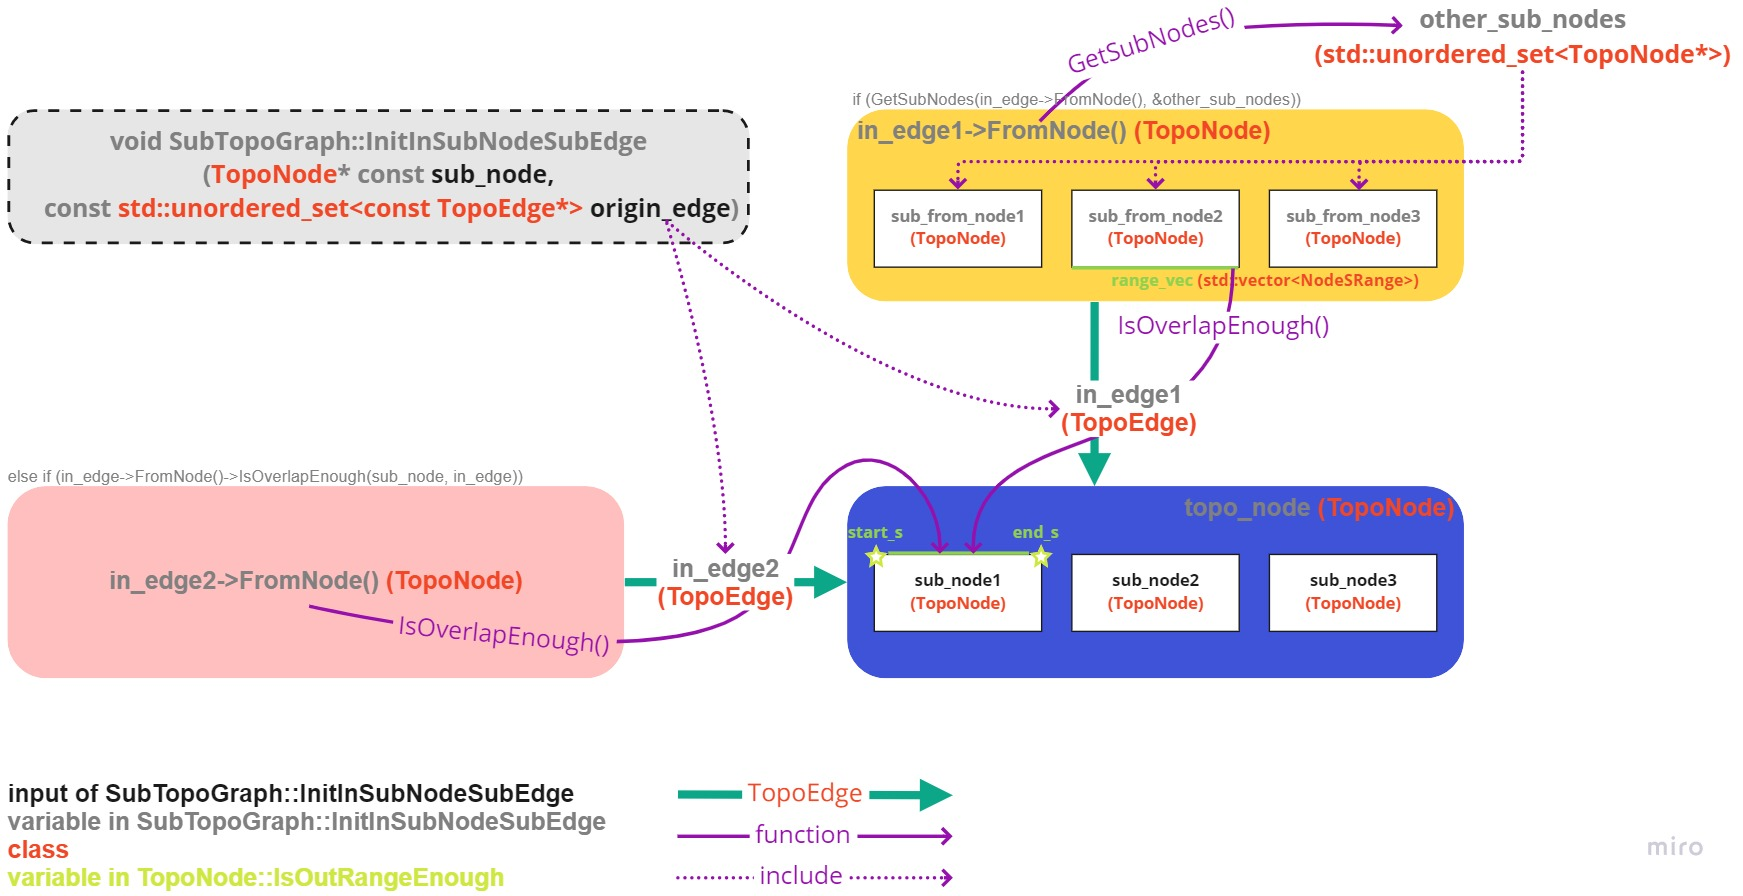

In [ ]:
// 被 SubTopoGraph::InitInSubNodeSubEdge 调用
// defined in /apollo/modules/routing/graph/topo_node.cc

bool TopoNode::IsOverlapEnough(const TopoNode* sub_node,
                               const TopoEdge* edge_for_type) const {
  // 判断可否从当前TopoNode实例出发到sub_node(子TopoNode)
  // 注意：子TopoNode->子TopoNode的转向类型 与 源TopoNode->源TopoNode的转向类型相同
  if (edge_for_type->Type() == TET_LEFT) {
    return (is_left_range_enough_ && // is_left_range_enough_ 在TopoNode::Init中生成，用于判断左边出口是否有足够的距离进行转向, 感觉仅下行判断条件足够，自处有点多余，待验证!!
            IsOutRangeEnough(left_out_sorted_range_, sub_node->StartS(), // 待结合地图深入推导!!
                             sub_node->EndS()));
  }
  if (edge_for_type->Type() == TET_RIGHT) {
    return (is_right_range_enough_ &&
            IsOutRangeEnough(right_out_sorted_range_, sub_node->StartS(),
                             sub_node->EndS()));
  }
  if (edge_for_type->Type() == TET_FORWARD) {
    return IsOutToSucEdgeValid() && sub_node->IsInFromPreEdgeValid(); // 如果当前TopoNode实例包含最后一段，且sub_node包含开头段，则可以构建当前TopoNode实例->sub_node的连通关系
  }
  return true;
}

In [ ]:
bool TopoNode::IsOutToSucEdgeValid() const {
  return std::fabs(EndS() - OriginNode()->EndS()) < MIN_INTERNAL_FOR_NODE;
  // EndS(): 当前TopoNode实例(可能是子TopoNode，也可能是TopoNode)(在s-l坐标系中)的终点
  // OriginNode()->EndS(): 当前TopoNode实例的源TopoNode(在s-l坐标系中)的终点
  //                       TopoNode的源TopoNode是其本身
  // 两者非常接近，说明该TopoNode实例包含最后一段
}

###### AddPotentialEdge
对InitSubEdge的补充，补充依据暂时没推理清楚

In [ ]:
void SubTopoGraph::AddPotentialEdge(const TopoNode* topo_node) {
  std::unordered_set<TopoNode*> sub_nodes;
  if (!GetSubNodes(topo_node, &sub_nodes)) {
    return;
  }
  for (auto* sub_node : sub_nodes) {
    AddPotentialInEdge(sub_node, topo_node->InFromLeftOrRightEdge());
    AddPotentialOutEdge(sub_node, topo_node->OutToLeftOrRightEdge());
  }
}

In [ ]:
void SubTopoGraph::AddPotentialInEdge(
    TopoNode* const sub_node,
    const std::unordered_set<const TopoEdge*> origin_edge) {      // origin_edge与(SubTopoGraph::InitInSubNodeSubEdge的输入)origin_edge的区别在于:
                                                                  // 此处仅包含Topograph的左转和右转, 即 topo_node->InFromLeftOrRightEdge()
  std::unordered_set<TopoNode*> other_sub_nodes;
  for (const auto* in_edge : origin_edge) {
    if (GetSubNodes(in_edge->FromNode(), &other_sub_nodes)) {
      for (auto* sub_from_node : other_sub_nodes) {
        if (sub_node->GetInEdgeFrom(sub_from_node) != nullptr) {  // 如果找到 sub_from_node -> sub_node 的TopoEdge,
                                                                  // 即在SubTopoGraph::InitInSubNodeSubEdge添加过, 则跳过
          continue;
        }
        if (!IsReachable(sub_from_node, sub_node)) {              // sub_from_node(子TopoNode) --左转/右转--> sub_node(子TopoNode) 需要再判断最小转弯距离
                                                                  // 判断函数为什么按比例折算起点和终点??
          continue;
        }
        std::shared_ptr<TopoEdge> topo_edge_ptr;
        topo_edge_ptr.reset(
            new TopoEdge(in_edge->PbEdge(), sub_from_node, sub_node));
        sub_node->AddInEdge(topo_edge_ptr.get());
        sub_from_node->AddOutEdge(topo_edge_ptr.get());
        topo_edges_.push_back(std::move(topo_edge_ptr));
      }
    } else {
      if (sub_node->GetInEdgeFrom(in_edge->FromNode()) != nullptr) {
        continue;
      }
        
      // 疑问: in_edge->FromNode()(TopoNode) --左转/右转--> sub_node(子TopoNode) 不需要再判断转弯距离?? 直接添加TopoEdge?? 
      std::shared_ptr<TopoEdge> topo_edge_ptr;
      topo_edge_ptr.reset(
          new TopoEdge(in_edge->PbEdge(), in_edge->FromNode(), sub_node));
      sub_node->AddInEdge(topo_edge_ptr.get());
      topo_edges_.push_back(std::move(topo_edge_ptr));
    }
  }
}

In [ ]:
bool IsReachable(const TopoNode* from_node, const TopoNode* to_node) {
  double start_s = to_node->StartS() / to_node->Length() * from_node->Length(); // 疑问: 为什么按长度比例折算起点位置??
  start_s = std::max(start_s, from_node->StartS());
  double end_s = to_node->EndS() / to_node->Length() * from_node->Length();
  end_s = std::min(end_s, from_node->EndS());
  return (end_s - start_s > MIN_POTENTIAL_LANE_CHANGE_LEN);
}

##### GetSubNodeWithS

const TopoNode* SubTopoGraph::GetSubNodeWithS(const TopoNode* topo_node,
                                              double s) const {
  const auto& map_iter = sub_node_range_sorted_map_.find(topo_node);
  if (map_iter == sub_node_range_sorted_map_.end()) { // 如果 sub_node_range_sorted_map_(TopoNode -> 升序的可行区间向量 的映射关系) 不被黑名单分割
    return topo_node;                                 // 返回 topo_node(TopoNode, input) 本身
  }
  const auto& sorted_vec = map_iter->second;
  // sorted vec can't be empty!
  int index = BinarySearchForStartS(sorted_vec, s);   // 二分法查到s(input)所在的区间索引
  if (index < 0) {
    return nullptr;
  }
  return sorted_vec[index].GetTopoNode();             // 返回所在区间对应的子TopoNode
}

#### MergeRoute
搜索结果的组装就是通过ResultGenerator借助搜索的结果std::vector<NodeWithRange>以及TopoRangeManager来进行组装的。


### black_list_range_generator
隐藏地图生成器  
地图可能会有信息缺失。在这种情况下，Routing模块支持动态的添加一些信息。这个逻辑主要是通过BlackListRangeGenerator和TopoRangeManager两个类完成的。这其中，前者提供了添加数据的接口，而后者则负责存储这些数据。  
BlackListRangeGenerator类的定义如下：

In [ ]:
class BlackListRangeGenerator {
 public:
  BlackListRangeGenerator() = default;
  ~BlackListRangeGenerator() = default;

  void GenerateBlackMapFromRequest(const RoutingRequest& request,
                                   const TopoGraph* graph,
                                   TopoRangeManager* const range_manager) const;  // 从RoutingRequest包含的数据中添加黑名单lane

  void AddBlackMapFromTerminal(const TopoNode* src_node,
                               const TopoNode* dest_node, double start_s,
                               double end_s,
                               TopoRangeManager* const range_manager) const;      // 从终端添加黑名单lane
};

### result_generator
当搜索完成之后，这个对象用来生成搜索结果

## strategy
目录结构：

In [ ]:
.
├── BUILD
├── a_star_strategy.cc
├── a_star_strategy.h
└── strategy.h

### a_star_strategy
已读参考：https://blog.csdn.net/zhouyy858/article/details/111517494  
https://www.guyuehome.com/33754  

在读参考：https://blog.csdn.net/davidhopper/article/details/87438774   
https://www.itdaan.com/blog/2018/04/23/56ff3ed00d80c6b7b380a3a0d3dcd4f4.html  
https://zhuanlan.zhihu.com/p/459954010  

后续改进参考：https://paul.pub/a-star-algorithm/#id-block-a

AStarStrategy类是抽象类Strategy子类，这两个类的结构如下图所示：

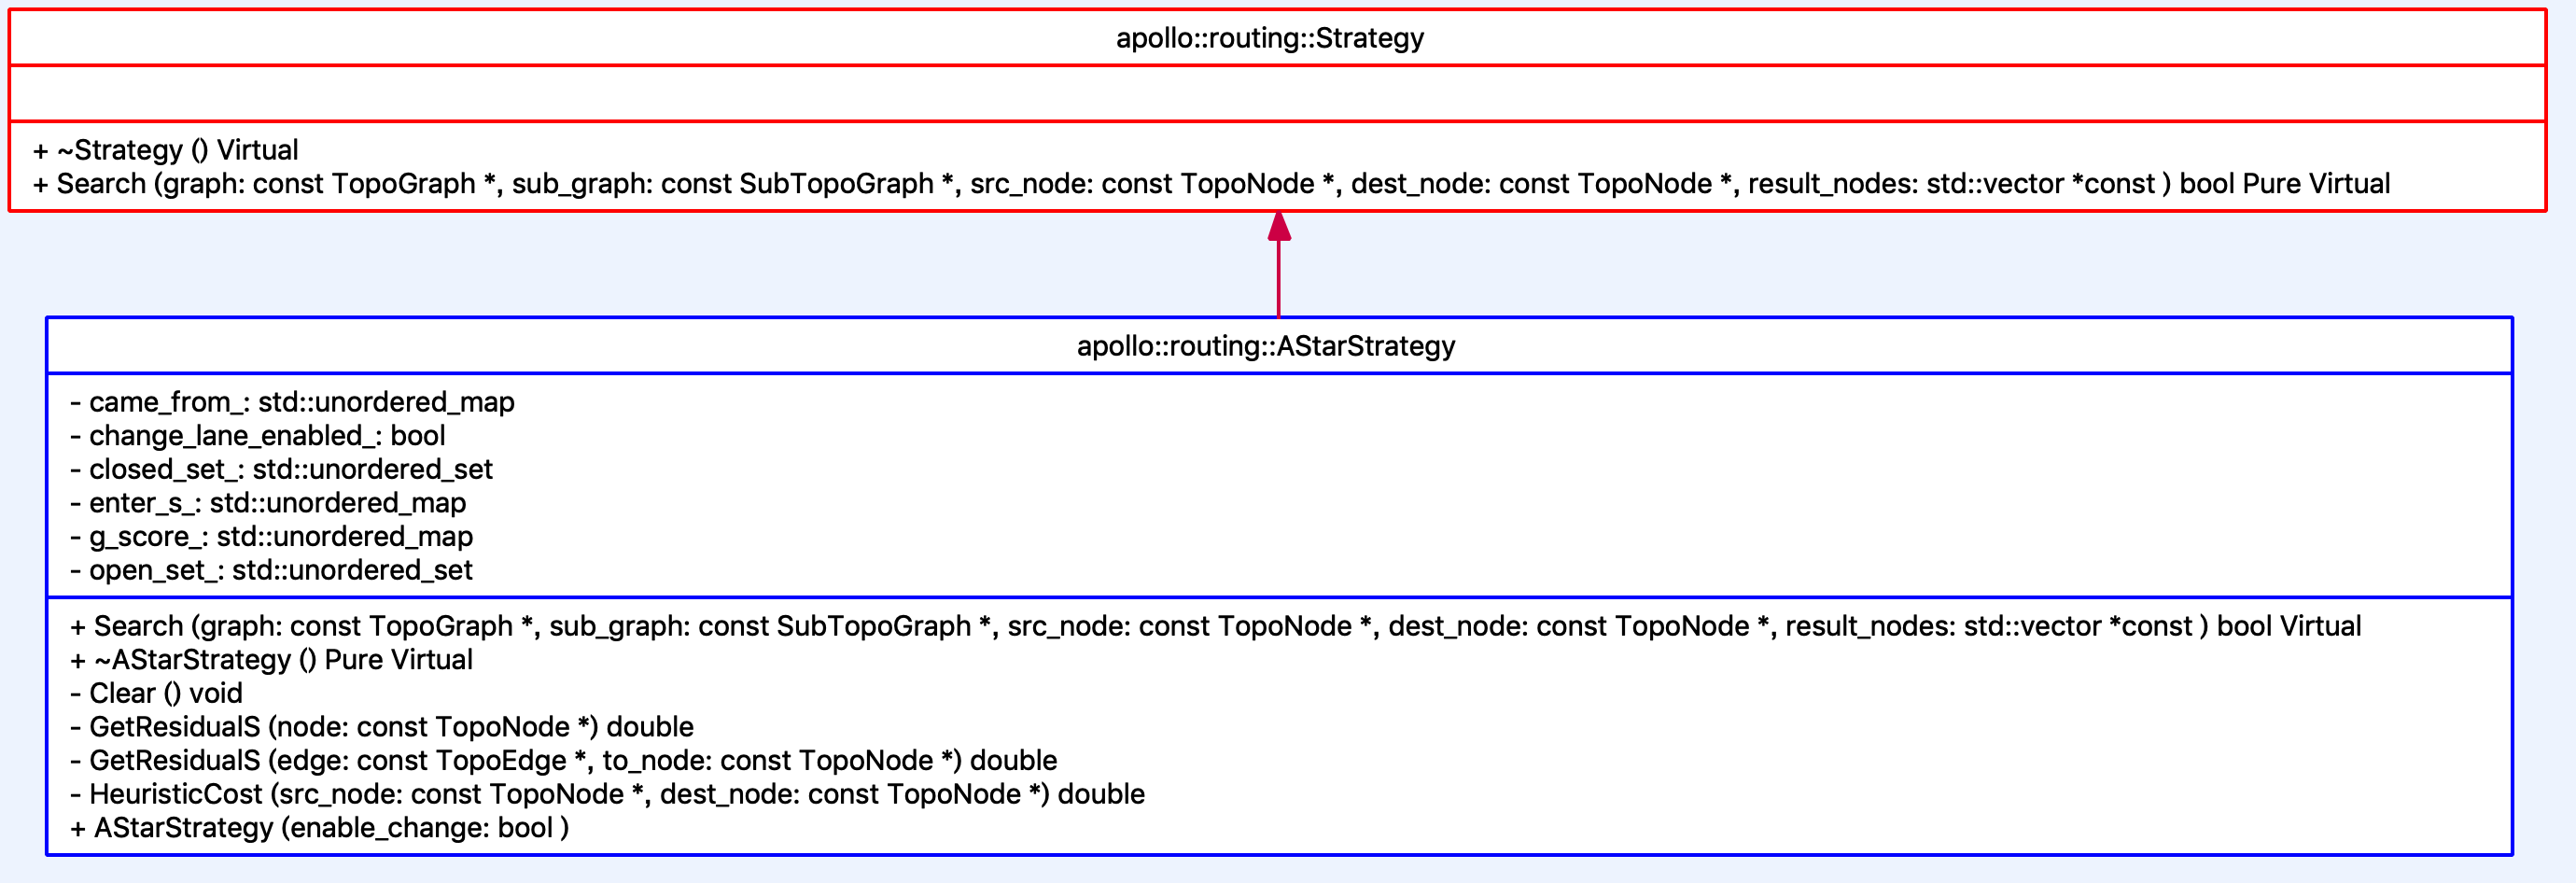

很显然，这里是Strategy设计模式的应用。定义了Strategy基类的作用是：今后可以很容易的实现另外一种算法将原先的A*算法替换掉。

A*算法实现最关键的就是计算Cost，因为Cost会影响最终的搜索结果。而影响Cost的一个关键因素就是启发函数的选取。


#### Cost
Proto格式的Topo地图中存有节点之间的cost（Topo地图由TopoCreator生成，在生成的时候会根据配置文件设置cost值），因此在这里直接读取即可。下面这个函数就是读取了节点之间的cost：

In [ ]:
double GetCostToNeighbor(const TopoEdge* edge) {
  // 每个节点的cost都可以由相邻节点的cost加上连接至自身的边的cost之和来计算
  return (edge->Cost() + edge->ToNode()->Cost());
}

#### 启发函数
Routing模块中的A*算法使用TopoNode锚点的坐标差值做作为启发函数，相关代码如下：

In [ ]:
double AStarStrategy::HeuristicCost(const TopoNode* src_node,
                                    const TopoNode* dest_node) {
  const auto& src_point = src_node->AnchorPoint();
  const auto& dest_point = dest_node->AnchorPoint();
  double distance = fabs(src_point.x() - dest_point.x()) +
                    fabs(src_point.y() - dest_point.y());
  return distance;
}

#### AStarStrategy::Search(算法主体)

In [ ]:
bool AStarStrategy::Search(const TopoGraph* graph,
                           const SubTopoGraph* sub_graph,
                           const TopoNode* src_node, const TopoNode* dest_node,
                           std::vector<NodeWithRange>* const result_nodes) {
  Clear();
  AINFO << "Start A* search algorithm.";

  std::priority_queue<SearchNode> open_set_detail;                    // open_set_detail优先队列，其作用类似python A*的小顶堆
                                                                      // 存储的是SearchNode类型的元素，主要包括TopoNode节点和该节点的f函数值
  //优先级队列,用priority_queue实现.std::priority_queue是一种容器适配器，
  //提供常数时间的最大元素查找功能，即栈顶元素top永远输出队列中的最大元素。
  //但SearchNode内部重载了<运算符，对小于操作作了相反的定义
  //因此std::priority_queue<SearchNode>的栈顶元素永远输出队列中的最小元素,即小顶堆

  SearchNode src_search_node(src_node);                                // 声明SearchNode, 并设置起点
  src_search_node.f = HeuristicCost(src_node, dest_node);              // 计算起点的权重(0+启发式成本/欧式距离)
  open_set_detail.push(src_search_node);                               // 将起点添加到小顶堆open_set_detail中

  open_set_.insert(src_node);                                          // 将起点添加到待访问顶点集合open_set_
  g_score_[src_node] = 0.0;                                            // 记录当前访问点到起点的距离
  enter_s_[src_node] = src_node->StartS();                             // StartS() 返回src_node(在s-l坐标系中的)起点

  SearchNode current_node;
  std::unordered_set<const TopoEdge*> next_edge_set;
  std::unordered_set<const TopoEdge*> sub_edge_set;
  while (!open_set_detail.empty()) {                                   // 如果小顶堆open_set_detail不为空
    current_node = open_set_detail.top();                              // 将小顶堆的首元素作为当前访问点(current_node)
    const auto* from_node = current_node.topo_node;                    // from_node(TopoNode)：当前访问点
    if (current_node.topo_node == dest_node) {                         // 如果当前访问点等于终点，算法终止
      if (!Reconstruct(came_from_, from_node, result_nodes)) {
        AERROR << "Failed to reconstruct route.";
        return false;
      }
      return true;
    }

    open_set_.erase(from_node);                                         // 从待访问顶点集合open_set_中移除当前访问点  
    open_set_detail.pop();                                              // 从小顶堆open_set_detail中移除首元素(最小的元素)
    if (closed_set_.count(from_node) != 0) {                            // 如果当前访问点在已访问顶点集合closed_set_，则跳过当前loop
      // if showed before, just skip...
      continue;
    }
    closed_set_.emplace(from_node);                                     // 将当前访问点加入到已访问集合to_node

    const auto& neighbor_edges =
        (GetResidualS(from_node) > FLAGS_min_length_for_lane_change && // GetResidualS(from_node): from_node车道的剩余可换道距离
         change_lane_enabled_)                                                
            ? from_node->OutToAllEdge() // 如果from_node车道的剩余可换道距离>最低阈值, 待松弛的边为从from_node出发的所有TopoEdge
            : from_node->OutToSucEdge();// 如果from_node车道的剩余可换道距离<=最低阈值, 待松弛的边为从from_node出发的所有拓扑直行的TopoEdge
    
    double tentative_g_score = 0.0;
    next_edge_set.clear();              // 记录所有待松弛的TopoEdge
    for (const auto* edge : neighbor_edges) {
      sub_edge_set.clear();
      // ---- start ----
      sub_graph->GetSubInEdgesIntoSubGraph(edge, &sub_edge_set);
      // from_node -OutToAllEdge()/OutToSucEdge()-> neighbor_edges -include-> edge
      // 因为from_node可能是子TopoNode,也可能是源TopoNode, 因此edge可能是在SubTopoGraph中生成的, 也可能在TopoGraph中生成的
      // from_node -> edge(输入) -> to_node
      // 如果from_node or to_node是子TopoNode, (该edge是在SubTopoGraph中生成的), 仅返回输入edge
      // 如果from_node and to_node都是源TopoNode, 且to_node无子TopoNode,(该edge是在TopoGraph中生成的), 仅返回输入edge
      // 如果from_node and to_node都是源TopoNode, 且to_node有子TopoNode,(该edge是在TopoGraph中生成的), 返回from_node -> to_node所有子TopoNode 的所有TopoEdge
      // ---- end ----
      next_edge_set.insert(sub_edge_set.begin(), sub_edge_set.end());
    }
    
    // 对相邻顶点逐一松弛检查，寻找总代价最小的顶点，即下次待访问点
    for (const auto* edge : next_edge_set) {
      const auto* to_node = edge->ToNode();                             // to_node：与当前访问点相连的下个顶点, 即待松弛判断的TopoNode
      if (closed_set_.count(to_node) == 1) {                            // 如果to_node在已访问集合closed_set_中，则跳过当前loop
        continue;
      }
      if (GetResidualS(edge, to_node) < FLAGS_min_length_for_lane_change) { // GetResidualS(edge, to_node): to_node车道的剩余可换道距离
                                                                            // 如果能通过变道到达相邻的下个顶点，则跳过当前loop
        continue;
      }

      // ---- 松弛判断(不满足跳过当前loop) ----
      tentative_g_score =
          g_score_[current_node.topo_node] + GetCostToNeighbor(edge);   // 当前访问点到起点的记录最优距离+到达相连的下个顶点的成本(边成本+下个节点cost)
      if (edge->Type() != TopoEdgeType::TET_FORWARD) {
        tentative_g_score -=
            (edge->FromNode()->Cost() + edge->ToNode()->Cost()) / 2;    // 如果TopoEdgeType为左转或右转, 因上前一步已累加两车道的长度, 现减去两车道的平均长度
      }
      double f = tentative_g_score + HeuristicCost(to_node, dest_node); // 计算当前访问点的f = g + h
      if (open_set_.count(to_node) != 0 && f >= g_score_[to_node]) {    // 如果相邻的下个顶点在待访问集合中, 且f比到起点的距离记录大, 则跳过当前loop
                                                                        // 待测试方案 open_set_.count(to_node) 修改为 g_score_.count(to_node), 待验证
        continue;
      }
      // ---- end ----

      if (edge->Type() == TopoEdgeType::TET_FORWARD) {
        enter_s_[to_node] = to_node->StartS();
      }
      else {
        // 如果拓扑图左转或右转, enter_s_[to_node] = (enter_s_[from_node] + FLAGS_min_length_for_lane_change) * 长度折算比例
        double to_node_enter_s =
            (enter_s_[from_node] + FLAGS_min_length_for_lane_change) /
            from_node->Length() * to_node->Length(); // 长度折算比例 = 1/from_node长度*to_node长度, 该方法的前提是from_node和to_node是等比例的同向并行车道
        
        // enter s could be larger than end_s but should be less than length
        to_node_enter_s = std::min(to_node_enter_s, to_node->Length());
        // if enter_s is larger than end_s and to_node is dest_node
        if (to_node_enter_s > to_node->EndS() && to_node == dest_node) {
          continue;
        }
        enter_s_[to_node] = to_node_enter_s;
      }

      g_score_[to_node] = f;                            // 更新到起点的累积距离
      SearchNode next_node(to_node);                    
      next_node.f = f;
      open_set_detail.push(next_node);                  // 将松弛成功后的to_node加到小顶堆open_set_detail
      came_from_[to_node] = from_node;                  // 记录松弛成功后的to_node的父节点，用于反向构建路径
      if (open_set_.count(to_node) == 0) {              // 如果to_node不在待访问顶点集合open_set_中，则将其添加进去。
                                                        // 这种情况是下个待访问顶点(to_node)已访问过，用待测试方案可跳过此步骤
        open_set_.insert(to_node);
      }
    }
  }
  AERROR << "Failed to find goal lane with id: " << dest_node->LaneId();  //整个循环结束后仍未正确返回,则表明搜索失败
  return false;
}

In [ ]:
bool Reconstruct(
    const std::unordered_map<const TopoNode*, const TopoNode*>& came_from,
    const TopoNode* dest_node, std::vector<NodeWithRange>* result_nodes) {
  std::vector<const TopoNode*> result_node_vec;
  result_node_vec.push_back(dest_node);                         // 将终点作为第一个反向搜索点

  auto iter = came_from.find(dest_node);
  while (iter != came_from.end()) {
    result_node_vec.push_back(iter->second);                    // iter->second 对应value
    iter = came_from.find(iter->second);
  }
  std::reverse(result_node_vec.begin(), result_node_vec.end()); // 反转result_node_vec记录
  if (!AdjustLaneChange(&result_node_vec)) {
    AERROR << "Failed to adjust lane change";
    return false;
  }
  result_nodes->clear();
  for (const auto* node : result_node_vec) {
    result_nodes->emplace_back(node->OriginNode(),       // 子TopoNode -> 源TopoNode | 返回 TopoNode* origin_node_, defined in class TopoNode in topo_node.h
                               node->StartS(),           // 返回 double start_s_
                               node->EndS());            // 返回 double end_s_
                               // NodeWithRange(const TopoNode* node, double start_s, double end_s) defined in node_with_range.h 
  }
  return true;
}

In [ ]:
double AStarStrategy::HeuristicCost(const TopoNode* src_node,
                                    const TopoNode* dest_node) {
  // src_node 到 dest_node 的曼哈顿距离，及d(i,j)=|xi-xj|+|yi-yj|
  const auto& src_point = src_node->AnchorPoint();              // AnchorPoint()获取TopoNode*类定义的顶点坐标
  const auto& dest_point = dest_node->AnchorPoint();
  double distance = std::fabs(src_point.x() - dest_point.x()) +
                    std::fabs(src_point.y() - dest_point.y());
  return distance;
}

In [ ]:
double GetCostToNeighbor(const TopoEdge* edge) {
  // = 边的成本+下个邻接点的成本
  return (edge->Cost() + edge->ToNode()->Cost());
  // edge->Cost() 返回 private: Edge pb_edge_.cost()          defined in class TopoEdge in topo_node.h | Edge is defined in modules/routing/proto/topo_graph.proto
  // edge->ToNode() 返回 private: TopoNode* to_node_          defined in class TopoEdge in topo_node.h
  // edge->ToNode()->Cost() 返回private: Node pb_node_.cost() defined in class TopoNode in topo_node.h | Node in defined in modules/routing/proto/topo_graph.proto
}

const TopoNode* GetLargestNode(const std::vector<const TopoNode*>& nodes) { // 获取首尾最大距离的TopoNode节点
  double max_range = 0.0;
  const TopoNode* largest = nullptr;
  for (const auto* node : nodes) {
    const double temp_range = node->EndS() - node->StartS();
    if (temp_range > max_range) {
      max_range = temp_range;
      largest = node;
    }
  }
  return largest;
}

In [ ]:

bool AdjustLaneChangeBackward( // 评判由前往后时考虑左右转，如果需要转弯，选择最大的可行并且不属于i-1节点车道，最后返回是否可行
    std::vector<const TopoNode*>* const result_node_vec) {
  for (int i = static_cast<int>(result_node_vec->size()) - 2; i > 0; --i) {
    const auto* from_node = result_node_vec->at(i);
    const auto* to_node = result_node_vec->at(i + 1);
    const auto* base_node = result_node_vec->at(i - 1);
    
    // 找from_node->to_node的连接边
    const auto* from_to_edge = from_node->GetOutEdgeTo(to_node);
    if (from_to_edge == nullptr) {
      // may need to recalculate edge,
      // because only edge from origin node to subnode is saved
      from_to_edge = to_node->GetInEdgeFrom(from_node);
    }
    
    if (from_to_edge == nullptr) {
      AERROR << "Get null ptr to edge:" << from_node->LaneId() << " ("
             << from_node->StartS() << ", " << from_node->EndS() << ")"
             << " --> " << to_node->LaneId() << " (" << to_node->StartS()
             << ", " << to_node->EndS() << ")";
      return false;
    }
    if (from_to_edge->Type() != TopoEdgeType::TET_FORWARD) {
      if (base_node->EndS() - base_node->StartS() <
          from_node->EndS() - from_node->StartS()) {
        continue;
      }
      std::vector<const TopoNode*> candidate_set;
      candidate_set.push_back(from_node);
      const auto& out_edges = base_node->OutToLeftOrRightEdge();
      for (const auto* edge : out_edges) {
        const auto* candidate_node = edge->ToNode();
        if (candidate_node == from_node) {
          continue;
        }
        if (candidate_node->GetOutEdgeTo(to_node) != nullptr) {
          candidate_set.push_back(candidate_node);
        }
      }
      const auto* largest_node = GetLargestNode(candidate_set);
      if (largest_node == nullptr) {
        return false;
      }
      if (largest_node != from_node) {
        result_node_vec->at(i) = largest_node;
      }
    }
  }
  return true;
}

bool AdjustLaneChangeForward( // 评判由后往前考虑左右转，如果需要转弯，选择最大的可行并且不属于i+1节点车道，最后返回是否可行
    std::vector<const TopoNode*>* const result_node_vec) {
  for (size_t i = 1; i < result_node_vec->size() - 1; ++i) {
    const auto* from_node = result_node_vec->at(i - 1);
    const auto* to_node = result_node_vec->at(i);
    const auto* base_node = result_node_vec->at(i + 1);
    const auto* from_to_edge = from_node->GetOutEdgeTo(to_node);
    if (from_to_edge == nullptr) {
      // may need to recalculate edge,
      // because only edge from origin node to subnode is saved
      from_to_edge = to_node->GetInEdgeFrom(from_node);
    }
    if (from_to_edge == nullptr) {
      AERROR << "Get null ptr to edge:" << from_node->LaneId() << " ("
             << from_node->StartS() << ", " << from_node->EndS() << ")"
             << " --> " << to_node->LaneId() << " (" << to_node->StartS()
             << ", " << to_node->EndS() << ")";
      return false;
    }
    if (from_to_edge->Type() != TopoEdgeType::TET_FORWARD) {
      if (base_node->EndS() - base_node->StartS() <
          to_node->EndS() - to_node->StartS()) {
        continue;
      }
      std::vector<const TopoNode*> candidate_set;
      candidate_set.push_back(to_node);
      const auto& in_edges = base_node->InFromLeftOrRightEdge();
      for (const auto* edge : in_edges) {
        const auto* candidate_node = edge->FromNode();
        if (candidate_node == to_node) {
          continue;
        }
        if (candidate_node->GetInEdgeFrom(from_node) != nullptr) {
          candidate_set.push_back(candidate_node);
        }
      }
      const auto* largest_node = GetLargestNode(candidate_set);
      if (largest_node == nullptr) {
        return false;
      }
      if (largest_node != to_node) {
        result_node_vec->at(i) = largest_node;
      }
    }
  }
  return true;
}

#### 输出
Routing的搜索结果由RoutingResponse描述。RoutingResponse 类的定义see 2.3.1

## routing_component.cc
RoutingComponent通过继承Component组件，实现Routing模块事件触发

bool RoutingComponent::Proc(const std::shared_ptr<RoutingRequest>& request) {
  auto response = std::make_shared<RoutingResponse>();
  // 收到request请求，处理得到全局路径信息
  if (!routing_.Process(request, response.get())) {
    return false;
  }
  common::util::FillHeader(node_->Name(), response.get());
  response_writer_->Write(response);
  {
    std::lock_guard<std::mutex> guard(mutex_);
    response_ = std::move(response);
  }
  return true;
}

## routing.cc
### 初始化
Routing模块通过Init方法来初始化。在初始化时，会创建Navigator对象以及加载地图，相关代码如下

apollo::common::Status Routing::Init() {
  const auto routing_map_file = apollo::hdmap::RoutingMapFile();                   // 读取拓扑地图文件位置信息
  AINFO << "Use routing topology graph path: " << routing_map_file;
  navigator_ptr_.reset(new Navigator(routing_map_file));                           // 在Navigator通过加载指定的graph图

  hdmap_ = apollo::hdmap::HDMapUtil::BaseMapPtr();                                 // 通过map模块提供的功能包，读取原始地图信息
                                                                                   // 读取加载地图过程中，生成地图要素的kdtree，e.g., lane_segment_kdtree_
                                                                                   // 用于地图要素的快速搜索
  ACHECK(hdmap_) << "Failed to load map file:" << apollo::hdmap::BaseMapFile();

  return apollo::common::Status::OK();
}

### Routing::Process
数据流的主入口, 将输入routing_request和输出routing_response交给Navigator类(navigator_ptr_)进一步处理

bool Routing::Process(const std::shared_ptr<RoutingRequest>& routing_request, RoutingResponse* const routing_response) {
  // input: std::shared_ptr<RoutingRequest>& routing_request, 即请求, defined in /modules/routing/proto/routing.proto
  // output: RoutingResponse* const routing_response, 即响应, defined in /modules/routing/proto/routing.proto
  CHECK_NOTNULL(routing_response);
  AINFO << "Get new routing request:" << routing_request->DebugString();

  const auto& fixed_requests = FillLaneInfoIfMissing(*routing_request);       // 找到routing_request节点最近的多条路
  
  // 对候选fixed_request进行遍历, 选择(routing_response_temp.measurement().distance())最小的响应,作为最终的输出
  double min_routing_length = std::numeric_limits<double>::max();
  for (const auto& fixed_request : fixed_requests) {
    RoutingResponse routing_response_temp;
    if (navigator_ptr_->SearchRoute(fixed_request, &routing_response_temp)) { // [核心]将请求/输入(fixed_request)和响应/输出(routing_response_temp)
                                                                              // 交给 std::unique_ptr<Navigator> navigator_ptr_ 进一步判断能否找到最短路径
      const double routing_length = routing_response_temp.measurement().distance(); // 响应/输出的测量总距离
      if (routing_length < min_routing_length) {
        routing_response->CopyFrom(routing_response_temp);                    // routing_response赋值为更短的响应/输出路径
        min_routing_length = routing_length;
      }
    }
    FillParkingID(routing_response);
  }
  if (min_routing_length < std::numeric_limits<double>::max()) {
    monitor_logger_buffer_.INFO("Routing success!");
    return true;
  }

  AERROR << "Failed to search route with navigator.";
  monitor_logger_buffer_.WARN("Routing failed! " + routing_response->status().msg());
  return false;
}


// Routing::FillLaneInfoIfMissing 被 Routing::Process 调用

std::vector<RoutingRequest> Routing::FillLaneInfoIfMissing(const RoutingRequest& routing_request) {
  // 从地图中选取最佳匹配点
  std::vector<RoutingRequest> fixed_requests;                 // 存放请求的动态数组
  std::unordered_map<int, std::vector<LaneWaypoint>> additional_lane_waypoint_map;
  RoutingRequest fixed_request(routing_request);              // 声明一个RoutingRequest实例(fixed_request), 并赋值为routing_request
                                                              // where, routing_request is 输入请求; fixed_request is 修正后的请求
                                                              // RoutingRequest is defined in /modules/routing/proto/routing.proto
  
  for (int i = 0; i < routing_request.waypoint_size(); ++i) { // 遍历请求中的每个点
    LaneWaypoint lane_waypoint(routing_request.waypoint(i));  // routing_request.waypoint(i): 请求中的第i个点
                                                              // Class LaneWaypoint defined in /modules/routing/proto/routing.proto
    if (lane_waypoint.has_id()) {                             // 如果lane_waypoint有对应的lane id信息, 则跳过当前loop
      continue;
    }

    // ---- step 1.如果lane_waypoint无对应的lane id信息, 则fill lane info when missing ----
    const auto point = common::util::PointFactory::ToPointENU(lane_waypoint.pose());
    
    // ---- step 1.1 以point为中心, 在半径内寻找地图中的若干lane, 如果找不到扩大半径继续寻找, 直到找到或达到半径上限 ----
    std::vector<std::shared_ptr<const hdmap::LaneInfo>> lanes; // lanes的结果可能为空,1个或多个
    constexpr double kRadius = 0.3;
    for (int i = 0; i < 20; ++i) {
      hdmap_->GetLanes(point, kRadius + i * kRadius, &lanes); // 在hdmap_中寻找以point为中心, 以Radius + i * kRadius为半径的范围内,
                                                              // 通过已建立好的kdtree，快速搜索满足条件的所有车道lane
      if (lanes.size() > 0) {
        break;
      }
    }
    // ---- end step 1.1 ----
    if (lanes.empty()) {
      AERROR << "Failed to find nearest lane from map at position: " << point.DebugString();
      return fixed_requests;  // return empty vector
    }

    for (size_t j = 0; j < lanes.size(); ++j) { // 如果请求中的当前点, 能够找到对应的车道, 即lanes不为空
      double s = 0.0;
      double l = 0.0;
      lanes[j]->GetProjection({point.x(), point.y()}, &s, &l);
      // ---- step 1.2 如果请求中的当前点, 能找到对应的lane, 根据第一个对应的lane, 更新fixed_request中对应索引位置的点信息 ----
      if (j == 0) {
        auto waypoint_info = fixed_request.mutable_waypoint(i);
        waypoint_info->set_id(lanes[j]->id().id()); // 补充lane id
        waypoint_info->set_s(s);                    // 补充车道lane(在s-l坐标系)的s
      }
      // ---- end step 1.2 ----
      // ---- step 1.3 除了第一个lane以外, 其他lane信息存储于additional_lane_waypoint_map 中备用 ----
      else {
        // additional candidate lanes
        LaneWaypoint new_lane_waypoint(lane_waypoint);
        new_lane_waypoint.set_id(lanes[j]->id().id());
        new_lane_waypoint.set_s(s);
        additional_lane_waypoint_map[i].push_back(new_lane_waypoint);
      }
      // ---- end step 1.3 ----
    }
  }

  // ---- step 2 请求中每个waypoint对应的不同lane的所有组合 ----
  fixed_requests.push_back(fixed_request); // first routing_request
  for (const auto& m : additional_lane_waypoint_map) {
    size_t cur_size = fixed_requests.size();
    for (size_t i = 0; i < cur_size; ++i) {
      for (const auto& lane_waypoint : m.second) {                  // m.second对应std::vector<LaneWaypoint>
        RoutingRequest new_request(fixed_requests[i]);
        auto waypoint_info = new_request.mutable_waypoint(m.first); // m.first对应索引
        waypoint_info->set_id(lane_waypoint.id());
        waypoint_info->set_s(lane_waypoint.s());
        fixed_requests.push_back(new_request);
      }
    }
  }
  // ---- end step 2 ----

  for (const auto& fixed_request : fixed_requests) {
    ADEBUG << "Fixed routing request:" << fixed_request.DebugString();
  }
  return fixed_requests;                                            // 返回std::vector<RoutingRequest>,即多组请求
}

fixed_requests = []
fixed_request = ["0a","1a","2a","3a"]
additional_lane_waypoint_map = {0:["0b","0c"],1:["1b"],2:[],3:["3b"] }
index = 0
print("index of fixed_requests =", index, "| first fixed_request:", fixed_request)
fixed_requests.append(fixed_request)
for key in additional_lane_waypoint_map.keys():
    cur_size = len(fixed_requests)
    for ii in range(cur_size):
        for lane_waypoint in additional_lane_waypoint_map[key]:
            index += 1
            new_request = [wp for wp in fixed_requests[ii]]
            new_request[key] = lane_waypoint
            print("index of fixed_requests =", index, ", cur_size=",cur_size,", ii=",ii,"|",[wp for wp in fixed_requests[ii]], "第",key,"元素->", new_request)
            fixed_requests.append(new_request)

## navigator调试工具
位置在 /apollo/modules/tools/navigator/
refer to: https://github.com/ApolloAuto/apollo/blob/master/docs/howto/how_to_use_apollo_2.5_navigation_mode_cn.md  
https://www.fzb.me/apollo/howto/how_to_use_apollo_2.5_navigation_mode.html

### 从原始数据包提取裸数据
提取裸数据

In [ ]:
./bazel-bin/modules/tools/navigator/record_extractor /apollo/docs/demo_guide/demo_3.5.record

可视化裸数据

In [ ]:
./bazel-bin/modules/tools/navigator/viewer_raw ./path_demo_3.5.record.txt

### 对裸数据进行平滑处理

平滑处理

In [ ]:
bash /apollo/modules/tools/navigator/smooth.sh ./path_demo_3.5.record.txt 200

可视化

In [ ]:
# pip install scipy -i https://pypi.mirrors.ustc.edu.cn/simple/ # 首次执行需安装
./bazel-bin/modules/tools/navigator/viewer_smooth ./path_demo_3.5.record.txt ./path_demo_3.5.record.txt.smoothed

## map_gen调试工具

In [ ]:
./bazel-bin/modules/tools/map_gen/extract_path demo_3.5.txt  /apollo/docs/demo_guide/demo_3.5.record


In [ ]:
  
# pip install shapely -i https://pypi.mirrors.ustc.edu.cn/simple/ # 首次执行需安装
./bazel-bin/modules/tools/map_gen/map_gen demo_3.5.txt


In [ ]:
./bazel-bin/modules/map/tools/sim_map_generator --map_dir=modules/map/data/demo_3.5 --output_dir=modules/map/data/demo_3.5

待验证: https://blog.csdn.net/Travis_X/article/details/121486163
待验证: https://blog.csdn.net/weixin_49024732/article/details/118862027

## routing调试工具

In [ ]:
./bazel-bin/modules/tools/routing/road_show -m modules/map/data/borregas_ave/base_map.bin
./bazel-bin/modules/tools/routing/road_show --map_dir=/apollo/modules/map/data/borregas_ave
./bazel-bin/modules/tools/routing/road_show --map_dir=/apollo/modules/map/data/borregas_ave/base_map.txt
./bazel-bin/modules/tools/routing/road_show --map_dir=/apollo/modules/map/data/demo
./bazel-bin/modules/tools/routing/road_show --map_dir=/apollo/modules/map/data/demo/base_map.txt
./bazel-bin/modules/tools/routing/road_show --map_dir=/apollo/path_demo_3.5.record.txt

    
sudo apt-get install libgoogle-glog-dev libgflags-dev
pip install python-gflags -i https://pypi.mirrors.ustc.edu.cn/simple/ 


./bazel-bin/modules/tools/routing/debug_topo -m modules/map/data/borregas_ave/base_map.bin
./bazel-bin/modules/tools/routing/debug_topo --map_dir=/apollo/modules/map/data/borregas_ave

./bazel-bin/modules/tools/routing/debug_route -m modules/map/data/borregas_ave/base_map.bin
./bazel-bin/modules/tools/routing/debug_route --map_dir=modules/map/data/borregas_ave/base_map.bin



./bazel-bin/modules/tools/routing/debug_passage_region --map_dir=/apollo/modules/map/data/borregas_ave

## 模块启动与Cyber RT

如果你查看Routing模块根目录下的BUILD文件。你会发现该模块的编译产物其实是一个动态库（so文件），而非一个可执行文件。

那么这个模块到底是如何启动的呢？答案就是Cyber RT。

Apollo 3.5彻底摒弃了ROS，改用自研的Cyber作为底层通讯与调度平台。Apollo Cyber RT 系统是Apollo开源软件平台层的一部分，作为运行时计算框架，处于实时操作系统 （RTOS）和应用模块之间。Apollo Cyber RT作为基础平台，支持流畅高效的运行所有应用模块。

Cyber RT的工作流如下图所示：

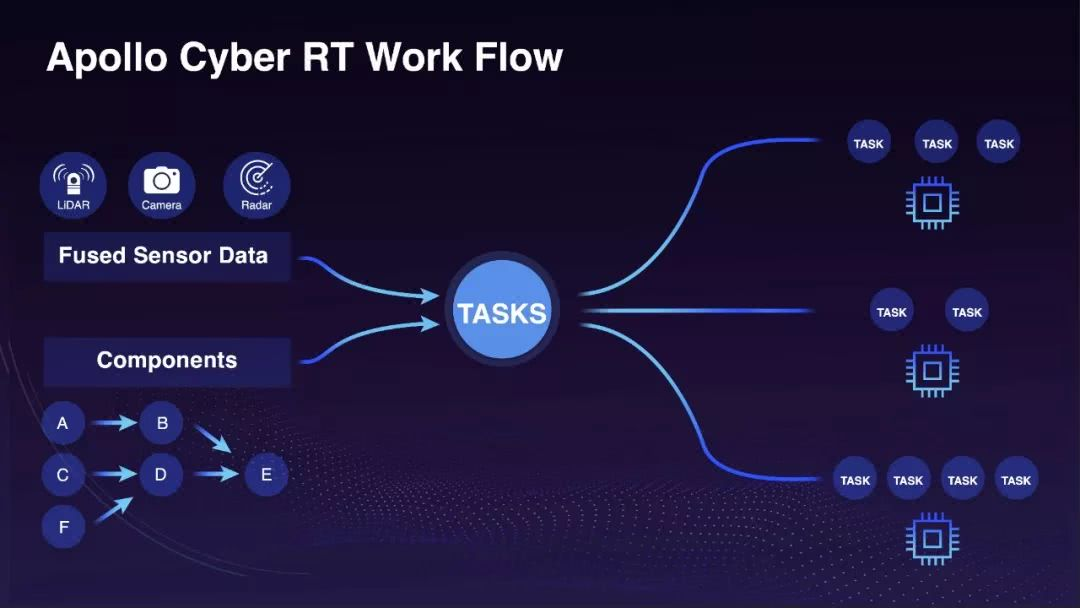

简单来说，在Apollo 3.5中，各个模块（这也包括了：Localization、Perception、Prediction、Planning、Control）的启动都是由Cyber RT这个运行时来处理的。

如果你浏览Routing模块的源码，你会发现一个dag文件，其内容如下：

In [ ]:
# Define all coms in DAG streaming.
module_config {
    module_library : "/apollo/bazel-bin/modules/routing/librouting_component.so"
    components {
        class_name : "RoutingComponent"
        config {
            name : "routing"
            config_file_path: "/apollo/modules/routing/conf/routing_config.pb.txt"
            flag_file_path: "/apollo/modules/routing/conf/routing.conf"
            readers: [
                {
                    channel: "/apollo/routing_request"
                    qos_profile: {
                        depth : 10
                    }
                }
            ]
        }
    }
}

Apollo Cyber RT 框架核心理念是基于的组件，组件有预先设定的输入输出。实际上，每个组件就代表一个专用得算法模块。框架可以根据所有预定义的组件生成有向无环图（DAG）。

在运行时刻，框架把融合好的传感器数据和预定义的组件打包在一起形成用户级轻量任务，之后，框架的调度器可以根据资源可用性和任务优先级来派发这些任务。

待研究资料：各功能模块的启动过程解析 https://blog.csdn.net/davidhopper/article/details/85248799  
https://blog.csdn.net/davidhopper/article/details/85989091  

# Map
todo:
- [Github Tsinghua-MARS-Lab](https://github.com/Tsinghua-MARS-Lab/HDMapNet)
- [OpenDRIVE](https://www.asam.net/standards/detail/opendrive/)
- [Python和VizViewer进行自动驾驶数据集可视化](https://cloud.tencent.com/developer/article/1752242)
- [30分钟学会shapely空间几何分析](https://cloud.tencent.com/developer/article/1803004)
- https://python-visualization.github.io/folium/plugins.html#folium-plugins
- https://wiki.openstreetmap.org/wiki/Forward_%26_backward,_left_%26_right#Identifying_the_direction_of_a_way
- https://wiki.openstreetmap.org/wiki/Key:tourist_bus

https://www.asam.net/index.php?eID=dumpFile&t=f&f=4422&token=e590561f3c39aa2260e5442e29e93f6693d1cccd  

OSM 与 OpenDrive的格式转换 https://zhuanlan.zhihu.com/p/393715053


OpenDrive格式地图数据解析 1)https://blog.csdn.net/lewif/article/details/78575840 2)https://www.freesion.com/article/8661725358/  
万字详解OpenDRIVE https://blog.51cto.com/lovebetterworld/5276361  

https://github.com/toby-King/MapFormat  
https://github.com/liuyf5231/opendriveparser  

OpenDRIVE格式地图数据——极简概述（一） https://zhuanlan.zhihu.com/p/360377363  
OpenDRIVE格式地图数据——极简概述（二） https://zhuanlan.zhihu.com/p/360540863  
OpenDRIVE格式地图数据——极简概述（三） https://zhuanlan.zhihu.com/p/361246912  
OpenDRIVE格式地图数据——极简概述（四） https://zhuanlan.zhihu.com/p/388825359  
无人驾驶算法学习（十五）：高精度地图数据存储框架Lanelet2 https://blog.csdn.net/orange_littlegirl/article/details/106542743  


https://baijiahao.baidu.com/s?id=1714747321689350734&wfr=spider&for=pc

* road 
    * road link (id,junction id)
        * predecessor, successor: 分别表示了连接这段road的前后路径信息
        * neighbor: 表示road与附近road或者junction的连接关系，连接road的可以是road或junction。

    * road objects (id, type $in$ {StopLines, Crosswalks, ClearAreas, SpeedBumps, ParkingSpaces, PNCJunctions} )
        * outline: 包含了定位objects的坐标信息

    * road lanes
        * laneSection
            * boundaries: 包括左边界与右边界，以及表示边界坐标的点的集合
            * Left/center/Right
                * lane
                    * centerline: 表示车道中心线
                    * sampleAssociates: 表示车道的宽度
                    * border, link, speed
                    * signaloverlapgroup, objectoverlapgroup, junctionoverlapgroup and laneoverlapgroup: 指lane与signal, objects, junction和其它lane的重合部分
                    
* junction
    * outline: 包含junction的坐标信息
    * connection
        * id
        * incomingRoad: ID of the incoming road
        * connectingRoad: ID of the connecting path
        * contactPoint: Contact point on the connecting road
    * objectoverlapgroup: 包括路口与object重合的内容

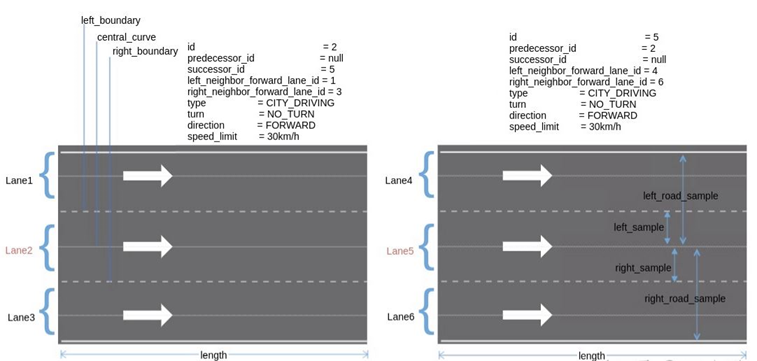
左子图对应的是road->road lanes->laneSection->left/center/right->lane ?

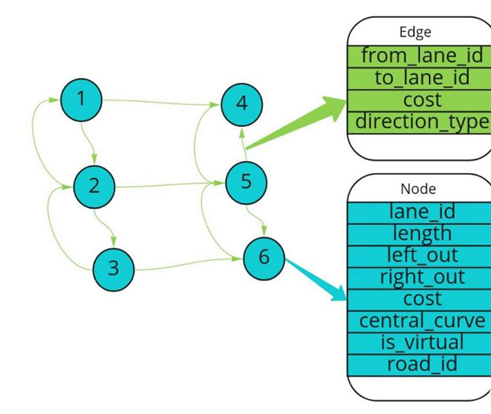

## 可视化工具
refer to: https://zhuanlan.zhihu.com/p/369780423

In [ ]:
# 安装
pip3 install imap_box
# 可视化
imap -m data/borregas_ave.txt
imap -m data/town.xodr
# OpenDrive格式 -> Apollo格式
imap -f -i data/town.xodr -o data/apollo_map.txt

## 坐标系
WGS84 : 世界坐标系，即经纬高坐标系【经度(longitude)，纬度(latitude)和高度(altitude)即LLA坐标系】  

UTM: 世界坐标系  
ENU: 世界坐标系，东北天  
ENU 和 UTM 的区别：

ENU局部坐标系采用三维直角坐标系来描述地球表面，实际应用较为困难，因此一般使用简化后的二维投影坐标系来描述。
UTM: 在众多二维投影坐标系中，统一横轴墨卡托（The Universal Transverse Mercator，UTM）坐标系是一种应用较为广泛的一种。 UTM坐标系使用基于网格的方法表示坐标，它将地球分为60个经度区，每个区包含6度的经度范围，每个区内的坐标均基于横轴墨卡托投影。  
FLU: 车身坐标系，前左上  
SL: SL坐标系：某点距离车子的横向和纵向距离，纵向距离为s,横向距离为l  

[【自动驾驶】19.自动驾驶各个坐标系](https://blog.csdn.net/u011754972/article/details/117122975)

# Planning

>Important reference: 
- Github
    - [Github openpilot](https://github.com/commaai/openpilot)
    - [Github AutowareAuto](https://github.com/autocore-ai/AutowareAuto)
    - [Github PythonRobotics](https://github.com/AtsushiSakai/PythonRobotics)
    - [Github Cheetah-Software](https://github.com/mit-biomimetics/Cheetah-Software) 四足机器人
    - [MIT Cheetah 完整开源代码与论文简介](https://zhuanlan.zhihu.com/p/79391139)
    - [Robotics Ecosystem](https://pythonrobotics.io/) 机械臂
    - [Github robotics-toolbox](https://github.com/petercorke/robotics-toolbox-python)
    - https://github.com/CHH3213/chhRobotics 自动驾驶规划控制python代码实现
    - https://github.com/google-research/robotics_transformer RT1
- Reading
    - [自动驾驶算法与仿真技术详解](https://www.zhihu.com/column/c_1495570544469102593)
        - [Apollo Planning决策规划代码详细解析 (8): PathLaneBorrowDecider](https://zhuanlan.zhihu.com/p/497503888)
        - [Apollo Planning决策规划代码详细解析 (9): PathBoundsDecider](https://zhuanlan.zhihu.com/p/497513085)
        - [Apollo Planning决策规划算法代码详解 (22):决策规划算法最完整介绍](https://zhuanlan.zhihu.com/p/516568314)
    - [如何上手 baidu 无人驾驶 Apollo 框架？](https://www.zhihu.com/question/505923561/answer/2277220145)
        - [Apollo规划模块详解（六）：算法实现-path lane borrow decider](https://zhuanlan.zhihu.com/p/441721310)
        - [Apollo规划模块详解（七）：算法实现-path bounds decider 上篇](https://zhuanlan.zhihu.com/p/444687011)
        - [Apollo规划模块详解：算法实现-9类交通规则（上）](https://zhuanlan.zhihu.com/p/433428958)
        - [Apollo规划模块详解：算法实现-9类交通规则（下）](https://zhuanlan.zhihu.com/p/436139193)
    - https://github.com/daohu527/dig-into-apollo
    - https://github.com/YannZyl/Apollo-Note
        - [车辆状态提供器: VehicleStateProvider](https://github.com/YannZyl/Apollo-Note/blob/master/docs/planning/vehicle_state_provider.md)
        - [障碍物&参考线&交通规则融合器：Frame类](https://github.com/YannZyl/Apollo-Note/blob/master/docs/planning/frame.md)
     - [**肥嘟嘟的左卫门**](https://blog.csdn.net/ChenGuiGan?type=blog)
     - [**Apollo星火计划PNC专项学习**](https://www.zhihu.com/column/c_1613493867323596800)
- [CSDN Apollo决策规划模块代码详解](https://blog.csdn.net/nn243823163/category_11685852.html?spm=1001.2014.3001.5482)
- https://github.com/daohu527/awesome-self-driving-car
- [pomdp-py](https://h2r.github.io/pomdp-py/html/installation.html)
-
- [一文看懂牛顿法（附Python实现）](https://zhuanlan.zhihu.com/p/105265432)
- [混合A\*算法研究](https://mp.weixin.qq.com/s?__biz=MzU1NjEwMTY0Mw==&mid=2247573889&idx=1&sn=4ce63d439ef186a119c5909021c49b06&chksm=fbc9d8e5ccbe51f3c8c49ef2fb7e9559c6eaf75778a69107b6f930f0ab3b8725cde90166bf1f&scene=27&vid=1688856167372393&deviceid=5ae84045-875b-4285-bfd9-131296ac5e6f&version=4.0.19.6020&platform=win)
- [Hybrid A\*路径规划器的代码注释](https://github.com/teddyluo/hybrid-a-star-annotation)

## 参考线:
- [Pnc Map](https://github.com/YannZyl/Apollo-Note/blob/master/docs/planning/pnc_map.md)
- [参考线平滑算法解析及实现|Apollo星火计划之PnC专项](https://zhuanlan.zhihu.com/p/611695289)
- [Apollo 6.0 参考线平滑算法解析](https://zhuanlan.zhihu.com/p/371585754)

## lane change:
- https://zhuanlan.zhihu.com/p/439010910
- https://zhuanlan.zhihu.com/p/496498679
- https://blog.csdn.net/qq_34310307/article/details/126025431

## QP:
- [规划控制之路径规划（QP篇）](https://zhuanlan.zhihu.com/p/404088222)
- [Apollo 6.0 QP（二次规划）算法解析](https://zhuanlan.zhihu.com/p/325645742)
- [Piecewise Jerk Path Optimizer](https://www.cnblogs.com/icathianrain/p/14407626.html)


## learning:  
- [Sequence-to-Sequence (seq2seq) Encoder-Decoder Neural Networks](https://www.youtube.com/watch?v=L8HKweZIOmg)
- [搞懂Transformer结构，看这篇PyTorch实现就够了（上）](https://zhuanlan.zhihu.com/p/48731949)
- https://www.nuscenes.org/nuplan
- [论文解读: | (NeurIPS2017)《Transformer: Attention Is All You Need》](https://blog.51cto.com/u_15351682/3772813)
- [Github wayveai mile](https://github.com/wayveai/mile) [基于模型的自动驾驶汽车端到端深度强化学习策略](https://zhuanlan.zhihu.com/p/644169659)

## 仿真
- [Nature封面罕见给了自动驾驶！仿真效率2000倍提升，清华自动化校友出品](https://mp.weixin.qq.com/s?__biz=MzkzOTE3Nzc5MA==&mid=2247507825&idx=1&sn=6892bd9073eb5e454dd4470dfa4bf7ca&chksm=c2f67d20f581f4367dacdbd0fdbe46bfbc40fc0f96640a608209c646d9a71f34a144f19fbfb4&exptype=unsubscribed_card_recommend_article_u2i_mainprocess_coarse_sort_tlfeeds&scene=169&subscene=200&sessionid=1686621272&flutter_pos=6&clicktime=1686621353&enterid=1686621353&ascene=56&fasttmpl_type=0&fasttmpl_fullversion=6720840-zh_CN-zip&fasttmpl_flag=0&realreporttime=1686621353315&devicetype=android-31&version=4.0.19.6020&nettype=ctnet&abtest_cookie=AAACAA%3D%3D&lang=zh_CN&session_us=gh_561ae9736fd6&countrycode=CN&exportkey=n_ChQIAhIQ628xNebVOF5DsxoHPzl7qhLgAQIE97dBBAEAAAAAAADSIRLCyR0AAAAOpnltbLcz9gKNyK89dVj0IDjj9t%2FiG%2BQ3DfUZ31xgPbymSrMl7KWT10mStZLci%2B5R0F%2BlCfQx8hcWZAbUXGQjbLtv7i5XzTf16eha%2Bp3wlTFKJ1a5Sh059YgE0%2FMN5irxqrxN%2FR1lIFdzJudouH0Gv1zj9dE7MlXItdZkC0WCvBRSZ6UX%2FS56OM%2F%2B8BIk5vdkIA%2F5cmRHora6MZ4MwZraxqq8fYULt2yORckcYLjNrFb4J7t7dhUwIiCrVbInLogJ%2FKDebOfEGTdI&pass_ticket=SjzjUJKKMPxD2oY4KZ8bebwq3g%2B0JbM%2BZcmWfJ4%2FfAj5yieBLjp2Iop31vCax1no&wx_header=3&platform=win)
- [Waymo最新最强自动驾驶模拟器，刚刚对外开源了](https://mp.weixin.qq.com/s?__biz=MzkzOTE3Nzc5MA%3D%3D&mid=2247517075&idx=1&sn=dfd11555cfa9ba51ddda5f713c241363&chksm=c2f621c2f581a8d4fb99f6ab35fcc37ba3fa8c24d46fc5855ba75d4a8e53d65991a3e119bb5a&mpshare=1&scene=1&srcid=1020wVoLoFTctImevMYM5fI5&sharer_shareinfo=0ba9855f37d9e44e3c53a9105686adbb&sharer_shareinfo_first=0ba9855f37d9e44e3c53a9105686adbb&from=industrynews&version=4.0.19.6020&platform=win#rd)

## todo:  
- [直播回顾丨Apollo自动驾驶论坛①规划模块算法解析](https://mp.weixin.qq.com/s/uB67QBw-epHBGkBEtj8mEw)
- [解析百度Apollo之决策规划模块](https://paul.pub/apollo-planning/#id-planning%E4%B8%8Eplanner)
- [直播回顾丨Apollo自动驾驶论坛①规划模块算法解析](https://zhuanlan.zhihu.com/p/266116528)
- 
- [Apollo 6.0 pnc_map解析](https://zhuanlan.zhihu.com/p/419350318)
- [Apollo规划模块-PncMap](https://zhuanlan.zhihu.com/p/489756011)
- [参考线 ReferenceLine 生成](https://blog.csdn.net/qq_23981335/article/details/122233589)
- [解析百度Apollo之参考线与轨迹](https://paul.pub/apollo-reference-line/)
- 
- [自动驾驶公开课 | Apollo 2.5自动驾驶规划控制](https://mp.weixin.qq.com/s/7ftd941pycD7h_R10cDecg)
- [社群分享内容 | Lattice Planner规划算法](https://mp.weixin.qq.com/s/YDIoVf20kybu8JEUY3GZWg)
- [分享回顾 | Apollo 轨迹规划技术分享](https://mp.weixin.qq.com/s/ao5hC_3A7fn8_L_PFw399A)
- 
- [开发者说 | Apollo控制算法之汽车动力学模型](https://mp.weixin.qq.com/s/G3Plo1Ogcx3s6nz_rdeKtA)
- [开发者说 | Apollo控制算法之LQR](https://mp.weixin.qq.com/s/WbTtBjeUmBeS3OQgaFG4eA)
- [开发者说丨Apollo代码学习—模型预测控制（MPC)](https://mp.weixin.qq.com/s/UAPbNq_KNWCFd7p8U8HnYQ)
- [开发者说 | Apollo代码学习—MPC与LQR比较](https://mp.weixin.qq.com/s/BFNaEBa8KwvRBK_mSunXjw)


名称 | 说明
:- | :-
EgoInfo类 | 包含了自车信息，例如：当前位置点，车辆状态，外围Box等。
Frame类 | 包含了一次Planning计算循环中的所有信息。例如：地图，车辆状态，参考线，障碍物信息等等。
FrameManager类 | Frame的管理器，每个Frame会有一个整数型id。
LocalView类 | Planning计算需要的输入，下文将看到其定义。
Obstacle类 | 描述一个特定的障碍物。障碍物会有一个唯一的id来区分。
PlanningContext类 | Planning全局相关的信息，例如：是否正在变道。这是一个单例。
ReferenceLineInfo类 | 车辆行驶的参考线，下文会专门讲解。
path文件夹 | 描述车辆路线信息。包含：PathData，DiscretizedPath，FrenetFramePath三个类。
speed文件夹 | 描述车辆速度信息。包含SpeedData，STPoint，StBoundary三个类。
trajectory文件夹 | 描述车辆轨迹信息。包含DiscretizedTrajectory，PublishableTrajectory，TrajectoryStitcher三个类。
planning_gflags.h | 定义了模块需要的许多常量，例如各个配置文件的路径。

1. 产生规划起点(Stitching)：

由于控制不能完美追踪上一个周期的轨迹，从主车当前位置开始规划会导致发给控制模块的轨迹不连续，所以需要将主车当前位置投影到上一个规划周期的轨迹中，将该投影点作为当前周期的规划起始位置。

2. 轨迹生成和优化(Planning & Decision):

    - Lattice Planner：针对结构化道路的轨迹规划，更多的使用基于Frenet Frame坐标系下的Lattice Planner轨迹规划方法，Lattice Planner是基于运动学的规划方法，同时产生轨迹形状和速度在Frenet Frame中按照指引线(s,l)方向进行规划。将纵向和横向分开独立规划，形状和速度在一维空间联合优化，保证控制模块能够执行,这种方法更适用于高速场景的应用，方法简单，容易调试，可以满足量产落地的需求。

    - Slt Planner：和Lattice Planner一样也是基于Frenet Frame坐标系下的轨迹规划方法，同样适用于结构化道路，整个规划算法分为四个部分，路径决策、路径优化、速度决策、速度优化。首先产生一个相对粗糙的路径，例如基于搜索的算法A-star等各种方法都可以应用在这条相对粗糙路径的生成，该路径中包含了静态障碍物信息、道路边界、车道线等信息，该路径中也包含了一定的决策信息，一旦该路径确定也就意味着主车已经做出了决策。路径的优化就是通过优化手段使轨迹能够满足车辆的运动学特性、静态障碍物的无碰撞和计算的高效性，通过将静态障碍物和道路边界等信息映射到Frenet Frame坐标系之下，将路径优化问题建模成为一个二次优化问题。速度的决策优化和路径的决策优化具备很强的相似性，路径的优化将问题转化成SL空间下的二次优化，速度的优化是将问题转化成ST空间下的二次优化问题。
    
refer to: https://www.zhihu.com/tardis/bd/art/436715599?source_id=1001

# 预测
- [一文详解Apollo7.0 预测模块及相关技术](https://zhuanlan.zhihu.com/p/499237095)
- [详解Transformer （Attention Is All You Need）](https://zhuanlan.zhihu.com/p/48508221)
- [Transformer模型详解（图解最完整版）](https://zhuanlan.zhihu.com/p/338817680)
- [Wayformer: 一个实现运动预测简单有效的注意网络](https://zhuanlan.zhihu.com/p/545376658)
- [AgentFormer论文阅读](https://zhuanlan.zhihu.com/p/512764984)
- [轨迹预测模型之——TNT](https://zhuanlan.zhihu.com/p/520485198)
- [轨迹预测模型之——denseTNT](https://zhuanlan.zhihu.com/p/520557197)
- [Multimodal Transformer for Unaligned Multimodal Language Sequences论文翻译](https://zhuanlan.zhihu.com/p/477717535)

# 资料


## 知乎  
https://www.zhihu.com/people/igear-ai  
https://www.zhihu.com/people/ge-ge-yao-xue-xi  
https://www.zhihu.com/people/daohu527  
https://paul.pub/


https://www.zhihu.com/people/gis-monkey  
【第三章 数据格式】.pbf空间数据详解 https://zhuanlan.zhihu.com/p/512934130  
【第三章 数据格式】OSM转为opendrive格式 https://zhuanlan.zhihu.com/p/511848559  
【第三章 数据格式】osm.pbf转mbtiles格式 https://zhuanlan.zhihu.com/p/514120689  
【第三章 数据格式】mbtiles数据格式详解 https://zhuanlan.zhihu.com/p/514118051  
【第三章 数据格式】Mapbox中的矢量瓦片详解 https://zhuanlan.zhihu.com/p/511459351  
【第三章 数据格式】geojson格式详解 https://zhuanlan.zhihu.com/p/510882183  
【第四章 软件工具】mapshaper神器推荐 https://zhuanlan.zhihu.com/p/514668021  
【第四章 软件工具】ArcGIS中的.mdb和.gdb数据库 https://zhuanlan.zhihu.com/p/512966925  
【第六章 WebGIS】tileserver-gl部署Mapbox本地化地图服务 https://zhuanlan.zhihu.com/p/514542422  
【第六章 WebGIS】maputnik自定义maobox本地样式 https://zhuanlan.zhihu.com/p/514539593  


## B站  
[麻省理工公开课 线性代数 MIT 18.06 Linear Algebra](https://www.bilibili.com/video/BV1zx411g7gq?from=search&seid=13286266376574249805)  
[斯坦福 凸优化 Stanford EE364, Convex Optimization](https://www.bilibili.com/video/BV1ct411i7j3?from=search&seid=17496771310747785039)  
[百度Apollo无人驾驶课程](https://www.bilibili.com/video/BV1KE411V79h?spm_id_from=333.1007.top_right_bar_window_default_collection.content.click)

求知讲堂python+人工智能 99天完整版 学完可就业 https://www.bilibili.com/video/BV1vA411b7Rn?spm_id_from=333.788.b_636f6d6d656e74.8  

## 工具
* ROS  
首推古月居《ROS机器人开发与实践》，深蓝学院有他的课    
http://wiki.ros.org/ROS/Tutorials  

* Cmake  
有一个叫做《Cmake Practice》的小册子写的不错

* C++  
bazel是用来做编译的，protobuf用来序列化文件，glog用来处理日志，gflag用来处理配置，ros操作系统消息发布和订阅机制
https://www.coursera.org/learn/cpp-chengxu-sheji  

* PCL  
《点云库PCL学习教程》  

* deep learning  
https://www.coursera.org/specializations/deep-learning   

* 驱动  
Apollo(百度自动驾驶):《安装 Nvidia 驱动》-问题收集篇 https://zhuanlan.zhihu.com/p/365609984  
Apollo(百度自动驾驶):《物理机安装 Nvidia 驱动》 https://zhuanlan.zhihu.com/p/369717118  
Apollo6.0安装教程 https://zhuanlan.zhihu.com/p/425483403 （未使用）

* 流程图在线绘制工具:   
https://miro.com/  
https://boardmix.cn/  

## draw.io
https://drawio-app.com/  
https://github.com/jgraph/drawio  
https://blog.csdn.net/qq_37541097/article/details/116024091  
https://zhuanlan.zhihu.com/p/140895359 (VScode版)  


### 自动调整流程框的大小
Ctrl+Shift+Y

### 图形替换
从左侧图形库选择需要的图形，拖拽到要替换的图形中央，直到出现了一个替换的褐色标志，松开即可实现替换
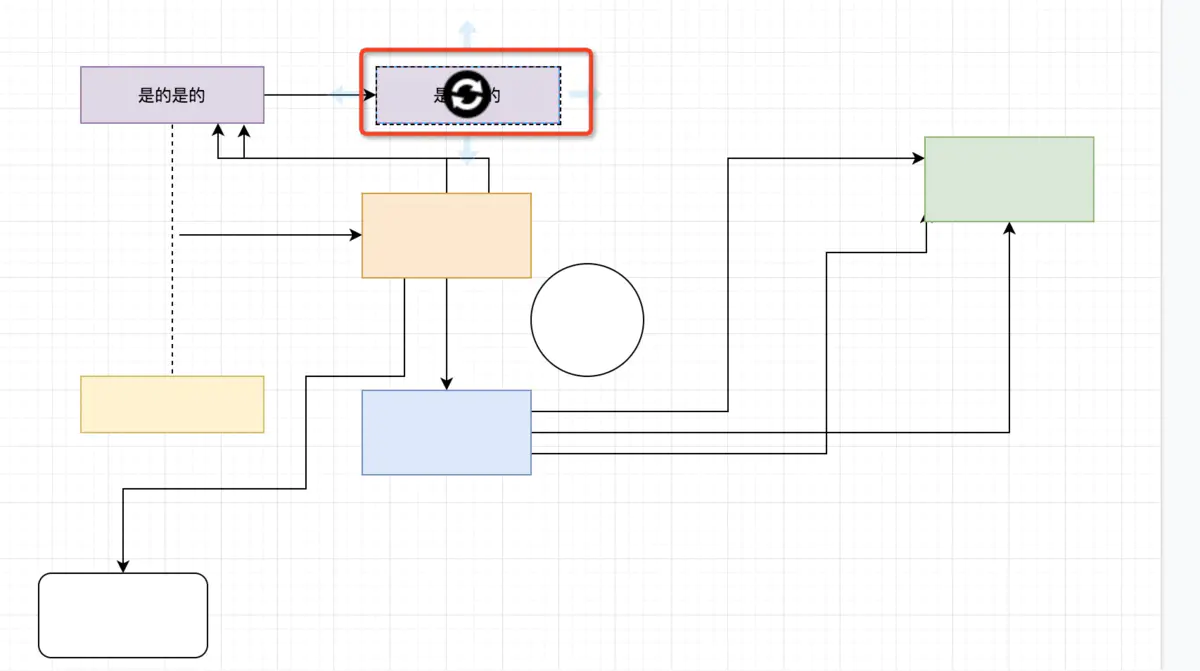

### 对齐
当要对齐多个元素时，选择多个元素（可通过ctrl+鼠标左键选择多个目标），然后点击 调整图形 -> 对齐 然后选择你想要的对齐方式
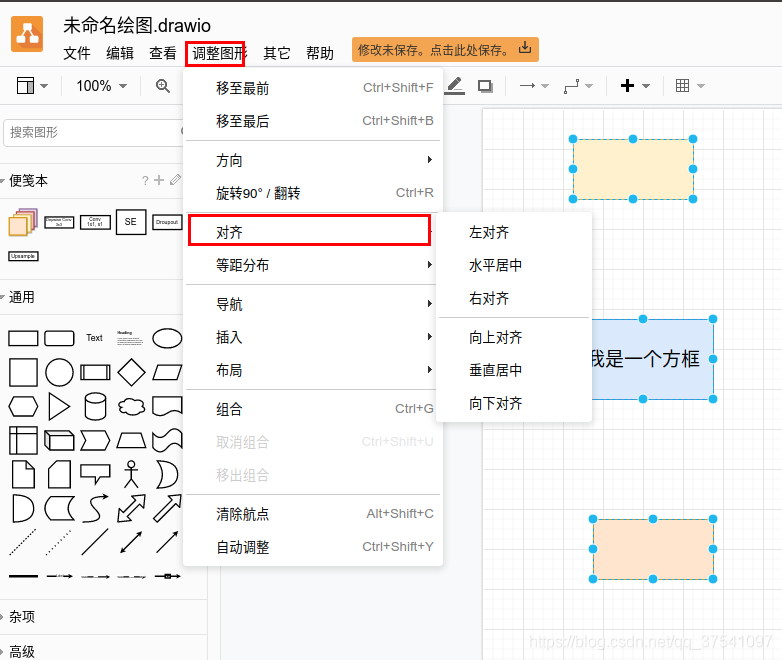

### 等距分布
当要等距摆放多个元素时，选择多个元素（可通过ctrl+鼠标左键选择多个目标），然后点击 调整图形 -> 等距分布 然后选择你想要的分布方式
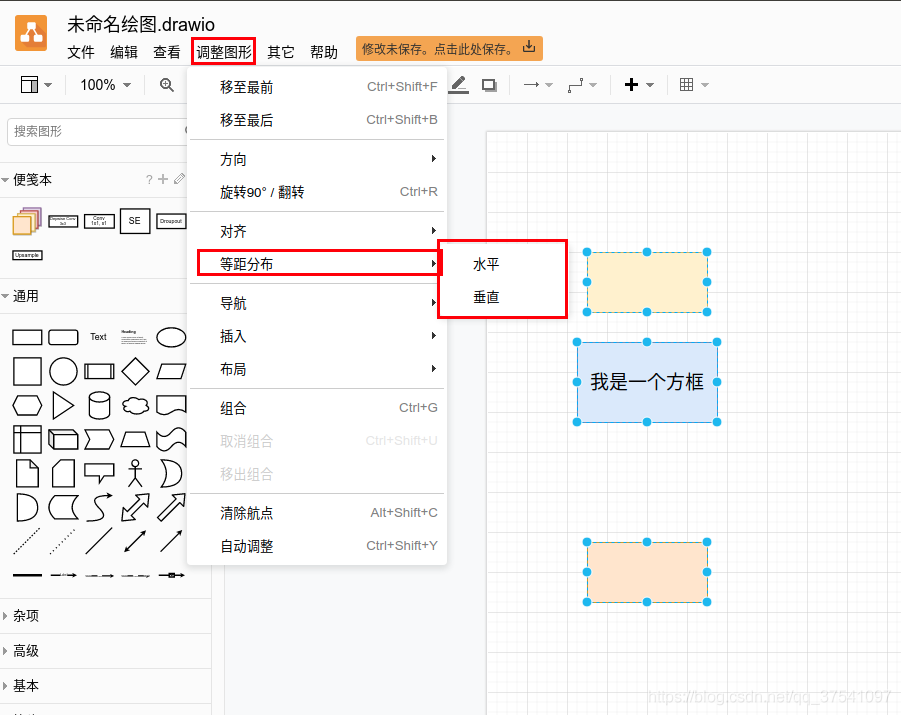

### 组合
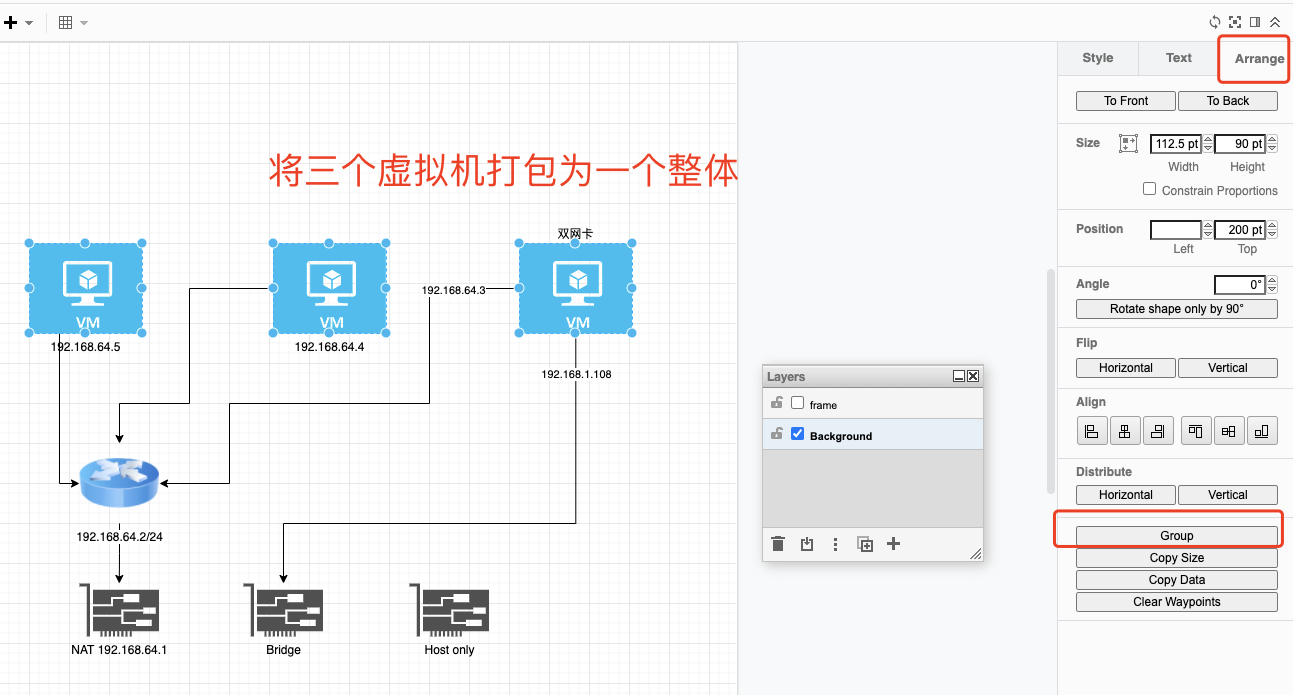

### 插入图片
refer to: https://blog.csdn.net/u012028275/article/details/114784387  
Arrange > Insert > Image

### 让流程框看起来更整齐
https://vdn1.vzuu.com/SD/e6b3d67c-23bb-11eb-b553-3aafc2088701.mp4?disable_local_cache=1&bu=078babd7&c=avc.0.0&f=mp4&expiration=1655224097&auth_key=1655224097-0-0-004d92c52d88b5bee566e06f61caebb7&v=hw&pu=078babd7

## 其他

https://webassembly.org/  
[Python和VizViewer进行自动驾驶数据集可视化](https://cloud.tencent.com/developer/article/1752242)